In [2]:
#Created for NISE
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from data_utils import FaceVAE, ClusterRandomSampler, gkern, gau_kl
import time
import os

%load_ext autoreload
%autoreload 2
%matplotlib inline
torch.cuda.empty_cache()
plt.ion()   # interactive mode

Data size: 478473
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)
(3, 128, 128)


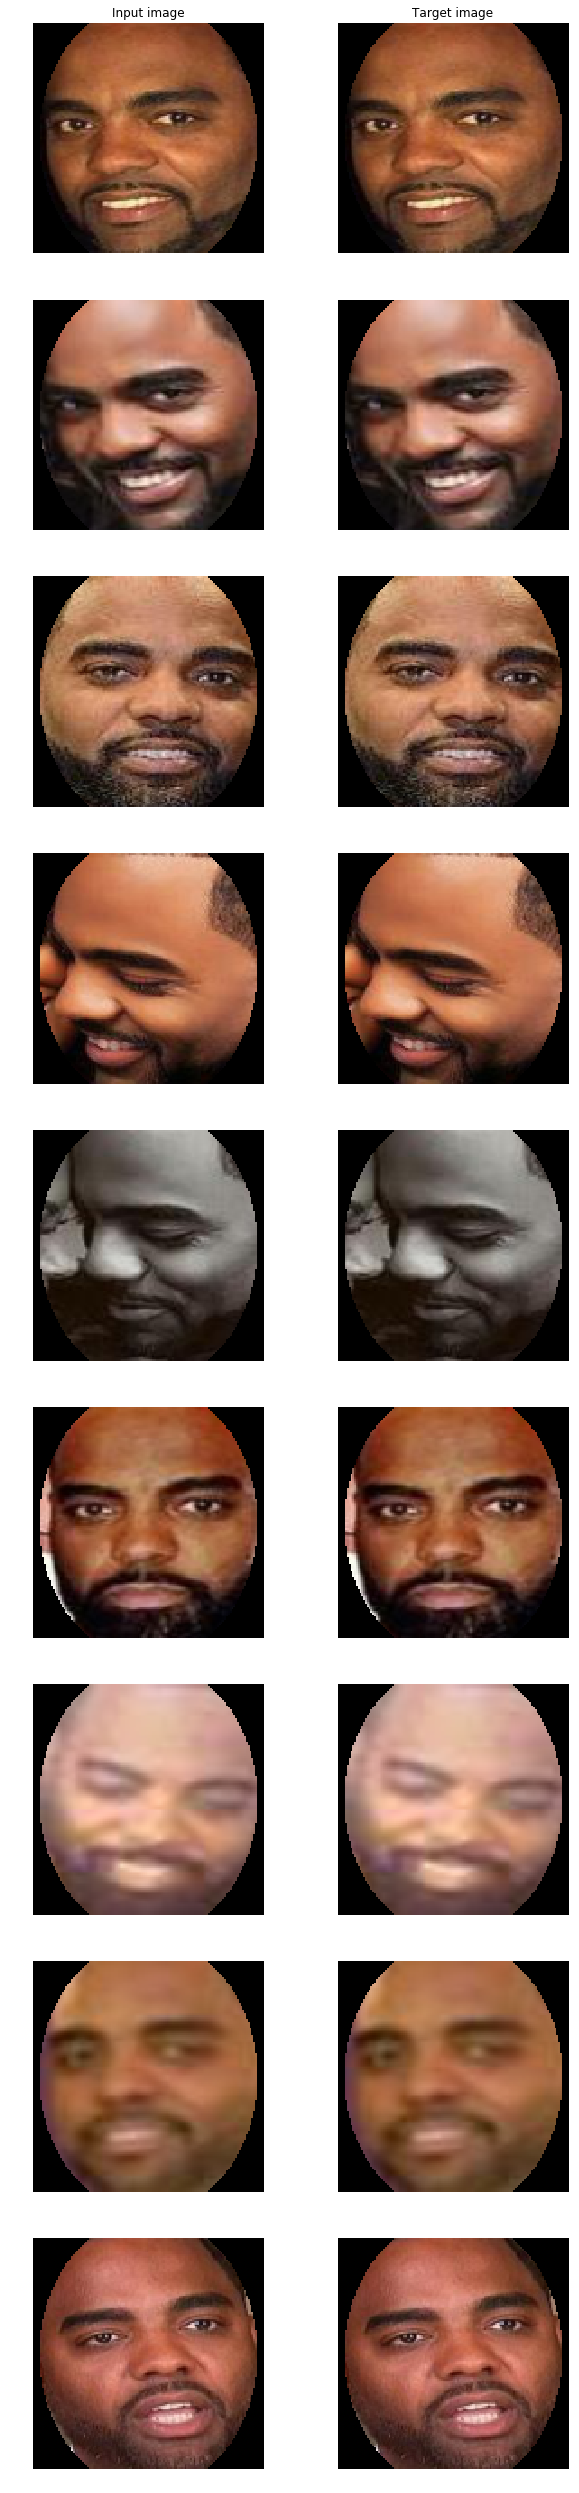

In [3]:
data = FaceVAE(image_paths_file='data/crop_list.txt')
print("Data size: %i" % len(data))
# print("Img size: ", data[0][0].size())
# print("Segmentation size: ", data[0][1].size())

num_example_imgs = 9
plt.figure(figsize=(10, 5 * num_example_imgs))
for i, (img, target) in enumerate(data[:num_example_imgs]):
    # img
    plt.subplot(num_example_imgs, 2, i * 2 + 1)
    plt.imshow(img.numpy().transpose(1,2,0))
#     plt.imshow(img)
    plt.axis('off')
    if i == 0:
        plt.title("Input image")
    
    # target
    plt.subplot(num_example_imgs, 2, i * 2 + 2)
    print(target.numpy().shape)
    plt.imshow(target.numpy().transpose(1,2,0), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Target image")
plt.show()

In [4]:
l = len(data)
print(int(0.8*l)+ 2*int(0.1*l), l)
# train_data, val_data, test_data = torch.utils.data.random_split(data, [int(len(data)*0.8)+1, int(len(data)*0.1), int(len(data)*0.1)])

train_data = torch.utils.data.Subset(data, np.arange(int(len(data)*0.8)+1))
val_data = torch.utils.data.Subset(data, np.arange(int(len(data)*0.8)+1, int(len(data)*0.8) + 1 +int(len(data)*0.1)))
test_data = torch.utils.data.Subset(data, np.arange(int(len(data)*0.8) + 1 +int(len(data)*0.1), len(data)))




print("Training data size: %i" % len(train_data))
print("Validation data size: %i" % len(val_data))
print("Test data size: %i" % len(test_data))

478472 478473
Training data size: 382779
Validation data size: 47847
Test data size: 47847


In [ ]:
from nets.face_vae_nn import FaceVAENN
from solver_vae import Solver
import torch.nn.functional as F
import torchvision.models as models
from mse_loss import Loss as Loss_mse
import pickle

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=8,
                                           shuffle=True,
                                           num_workers=2)
val_loader = torch.utils.data.DataLoader(val_data,
                                         batch_size=8,
                                         shuffle=False,
                                         num_workers=2)
model = FaceVAENN()
model.cuda()


# # Load pretrained model and set weights
# pt_model = torch.load('cpu_Epoch_28_Train_loss_25425.9503_Test_loss_25172.4120.pth')

# for i, k in enumerate(pt_model.keys()):
#     model.state_dict()[k].copy_(pt_model[k])
# #     print(i)


# model = torch.load('tempsave_VAE_model_epoch_.pth')
model = torch.load('train_VAE_model_epoch_6')

print(len(list(model.parameters())))
print(model.state_dict().keys())


#or param in list(model.parameters()):
#    param.requires_grad = False    

# solver = Solver(optim_args={"lr": 1e-3,
#                             "eps": 1e-8
#                             },
#                 loss_func = Loss_mse().cuda())

for i in range(7,10):
    if i == 0:
        solver.train(model, train_loader, val_loader, log_nth=1, num_epochs=1)
    else:
        solver.train(model, train_loader, val_loader, log_nth=1, num_epochs=1, reset_hist = False)
    print ("Out of solver")
    model.save('train_VAE_model_epoch_'+str(i))
    


    save_acc_loss_dic = {'train_loss_history': solver.train_loss_history,
                         'train_acc_history' : solver.train_acc_history ,
                         'val_acc_history'   : solver.val_acc_history   ,
                         'val_loss_history'  : solver.val_loss_history   }

    # print(save_acc_loss_dic)
    # # save_acc_loss = pd.DataFrame(data = save_acc_loss_dic)
    # # save_acc_loss.to_csv()
    with open('save_VAE_acc_loss.pkl', 'wb') as handle:
        pickle.dump(save_acc_loss_dic, handle)


FINISH.
44
odict_keys(['e1.weight', 'e1.bias', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'e2.weight', 'e2.bias', 'bn2.weight', 'bn2.bias', 'bn2.running_mean', 'bn2.running_var', 'bn2.num_batches_tracked', 'e3.weight', 'e3.bias', 'bn3.weight', 'bn3.bias', 'bn3.running_mean', 'bn3.running_var', 'bn3.num_batches_tracked', 'e4.weight', 'e4.bias', 'bn4.weight', 'bn4.bias', 'bn4.running_mean', 'bn4.running_var', 'bn4.num_batches_tracked', 'e5.weight', 'e5.bias', 'bn5.weight', 'bn5.bias', 'bn5.running_mean', 'bn5.running_var', 'bn5.num_batches_tracked', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'd1.weight', 'd1.bias', 'd2.weight', 'd2.bias', 'bn6.weight', 'bn6.bias', 'bn6.running_mean', 'bn6.running_var', 'bn6.num_batches_tracked', 'd3.weight', 'd3.bias', 'bn7.weight', 'bn7.bias', 'bn7.running_mean', 'bn7.running_var', 'bn7.num_batches_tracked', 'd4.weight', 'd4.bias', 'bn8.weight', 'bn8.bias', 'bn8.running_mean', 'bn8.running_var', 

[Iteration 156/47848] TRAIN loss: 2060119.385
[Iteration 157/47848] TRAIN loss: 3231973.633
[Iteration 158/47848] TRAIN loss: 2414701.172
[Iteration 159/47848] TRAIN loss: 2186962.402
[Iteration 160/47848] TRAIN loss: 1897796.875
[Iteration 161/47848] TRAIN loss: 1724316.895
[Iteration 162/47848] TRAIN loss: 2067753.418
[Iteration 163/47848] TRAIN loss: 2908702.637
[Iteration 164/47848] TRAIN loss: 2301604.980
[Iteration 165/47848] TRAIN loss: 1948450.439
[Iteration 166/47848] TRAIN loss: 2159323.242
[Iteration 167/47848] TRAIN loss: 2019442.383
[Iteration 168/47848] TRAIN loss: 2071540.039
[Iteration 169/47848] TRAIN loss: 2617604.004
[Iteration 170/47848] TRAIN loss: 2054032.715
[Iteration 171/47848] TRAIN loss: 2216067.139
[Iteration 172/47848] TRAIN loss: 2065992.676
[Iteration 173/47848] TRAIN loss: 2250095.215
[Iteration 174/47848] TRAIN loss: 2323745.117
[Iteration 175/47848] TRAIN loss: 2288032.227
[Iteration 176/47848] TRAIN loss: 2277487.793
[Iteration 177/47848] TRAIN loss: 

[Iteration 335/47848] TRAIN loss: 2240183.105
[Iteration 336/47848] TRAIN loss: 2219662.354
[Iteration 337/47848] TRAIN loss: 2460344.238
[Iteration 338/47848] TRAIN loss: 2079480.713
[Iteration 339/47848] TRAIN loss: 2658411.133
[Iteration 340/47848] TRAIN loss: 2597999.512
[Iteration 341/47848] TRAIN loss: 2460901.611
[Iteration 342/47848] TRAIN loss: 2682308.838
[Iteration 343/47848] TRAIN loss: 2771740.234
[Iteration 344/47848] TRAIN loss: 2715975.830
[Iteration 345/47848] TRAIN loss: 2406302.002
[Iteration 346/47848] TRAIN loss: 2716915.039
[Iteration 347/47848] TRAIN loss: 2704408.447
[Iteration 348/47848] TRAIN loss: 2752910.645
[Iteration 349/47848] TRAIN loss: 1704905.029
[Iteration 350/47848] TRAIN loss: 2971931.396
[Iteration 351/47848] TRAIN loss: 1746823.242
[Iteration 352/47848] TRAIN loss: 2302765.625
[Iteration 353/47848] TRAIN loss: 2364380.615
[Iteration 354/47848] TRAIN loss: 2531564.941
[Iteration 355/47848] TRAIN loss: 2410394.287
[Iteration 356/47848] TRAIN loss: 

[Iteration 514/47848] TRAIN loss: 2380112.305
[Iteration 515/47848] TRAIN loss: 2775215.820
[Iteration 516/47848] TRAIN loss: 1853665.039
[Iteration 517/47848] TRAIN loss: 2022079.102
[Iteration 518/47848] TRAIN loss: 2538397.217
[Iteration 519/47848] TRAIN loss: 2028826.416
[Iteration 520/47848] TRAIN loss: 2187390.137
[Iteration 521/47848] TRAIN loss: 2134029.785
[Iteration 522/47848] TRAIN loss: 2433098.877
[Iteration 523/47848] TRAIN loss: 2160736.328
[Iteration 524/47848] TRAIN loss: 1813877.075
[Iteration 525/47848] TRAIN loss: 2423791.016
[Iteration 526/47848] TRAIN loss: 1952851.440
[Iteration 527/47848] TRAIN loss: 2191991.211
[Iteration 528/47848] TRAIN loss: 1793532.715
[Iteration 529/47848] TRAIN loss: 1911953.125
[Iteration 530/47848] TRAIN loss: 2133158.691
[Iteration 531/47848] TRAIN loss: 2338652.832
[Iteration 532/47848] TRAIN loss: 2456369.385
[Iteration 533/47848] TRAIN loss: 2278590.332
[Iteration 534/47848] TRAIN loss: 2302100.586
[Iteration 535/47848] TRAIN loss: 

[Iteration 693/47848] TRAIN loss: 2339666.748
[Iteration 694/47848] TRAIN loss: 2339270.996
[Iteration 695/47848] TRAIN loss: 2145888.672
[Iteration 696/47848] TRAIN loss: 2367422.852
[Iteration 697/47848] TRAIN loss: 2656934.570
[Iteration 698/47848] TRAIN loss: 2408357.910
[Iteration 699/47848] TRAIN loss: 2489421.143
[Iteration 700/47848] TRAIN loss: 2455089.355
[Iteration 701/47848] TRAIN loss: 2190959.961
[Iteration 702/47848] TRAIN loss: 2564883.057
[Iteration 703/47848] TRAIN loss: 1858863.525
[Iteration 704/47848] TRAIN loss: 2821144.043
[Iteration 705/47848] TRAIN loss: 2470656.250
[Iteration 706/47848] TRAIN loss: 2202834.473
[Iteration 707/47848] TRAIN loss: 1982750.610
[Iteration 708/47848] TRAIN loss: 2226804.688
[Iteration 709/47848] TRAIN loss: 2010293.091
[Iteration 710/47848] TRAIN loss: 2026760.742
[Iteration 711/47848] TRAIN loss: 1987500.244
[Iteration 712/47848] TRAIN loss: 2177140.137
[Iteration 713/47848] TRAIN loss: 2194927.734
[Iteration 714/47848] TRAIN loss: 

[Iteration 872/47848] TRAIN loss: 2046654.297
[Iteration 873/47848] TRAIN loss: 2214376.709
[Iteration 874/47848] TRAIN loss: 1760465.820
[Iteration 875/47848] TRAIN loss: 2233935.791
[Iteration 876/47848] TRAIN loss: 1809957.031
[Iteration 877/47848] TRAIN loss: 1925500.732
[Iteration 878/47848] TRAIN loss: 2192317.627
[Iteration 879/47848] TRAIN loss: 2101393.066
[Iteration 880/47848] TRAIN loss: 1857099.976
[Iteration 881/47848] TRAIN loss: 3024638.916
[Iteration 882/47848] TRAIN loss: 2045653.564
[Iteration 883/47848] TRAIN loss: 2047469.727
[Iteration 884/47848] TRAIN loss: 2142410.400
[Iteration 885/47848] TRAIN loss: 2530096.191
[Iteration 886/47848] TRAIN loss: 2199653.076
[Iteration 887/47848] TRAIN loss: 2118540.771
[Iteration 888/47848] TRAIN loss: 2115017.090
[Iteration 889/47848] TRAIN loss: 1959971.680
[Iteration 890/47848] TRAIN loss: 2109943.359
[Iteration 891/47848] TRAIN loss: 1944195.801
[Iteration 892/47848] TRAIN loss: 1930298.218
[Iteration 893/47848] TRAIN loss: 

[Iteration 1050/47848] TRAIN loss: 2009367.310
[Iteration 1051/47848] TRAIN loss: 2371704.590
[Iteration 1052/47848] TRAIN loss: 2667290.527
[Iteration 1053/47848] TRAIN loss: 1842485.596
[Iteration 1054/47848] TRAIN loss: 2644952.881
[Iteration 1055/47848] TRAIN loss: 1751086.426
[Iteration 1056/47848] TRAIN loss: 1966867.798
[Iteration 1057/47848] TRAIN loss: 2442174.805
[Iteration 1058/47848] TRAIN loss: 2173696.777
[Iteration 1059/47848] TRAIN loss: 2057771.973
[Iteration 1060/47848] TRAIN loss: 2849369.141
[Iteration 1061/47848] TRAIN loss: 1956705.322
[Iteration 1062/47848] TRAIN loss: 2319404.297
[Iteration 1063/47848] TRAIN loss: 2051569.824
[Iteration 1064/47848] TRAIN loss: 1991523.193
[Iteration 1065/47848] TRAIN loss: 2580626.465
[Iteration 1066/47848] TRAIN loss: 2366670.654
[Iteration 1067/47848] TRAIN loss: 1922230.591
[Iteration 1068/47848] TRAIN loss: 2505507.324
[Iteration 1069/47848] TRAIN loss: 2291875.488
[Iteration 1070/47848] TRAIN loss: 2000941.772
[Iteration 10

[Iteration 1225/47848] TRAIN loss: 2183716.797
[Iteration 1226/47848] TRAIN loss: 2229625.488
[Iteration 1227/47848] TRAIN loss: 2432394.043
[Iteration 1228/47848] TRAIN loss: 2152348.633
[Iteration 1229/47848] TRAIN loss: 2445635.254
[Iteration 1230/47848] TRAIN loss: 2521833.984
[Iteration 1231/47848] TRAIN loss: 1928951.172
[Iteration 1232/47848] TRAIN loss: 2427606.689
[Iteration 1233/47848] TRAIN loss: 2242375.732
[Iteration 1234/47848] TRAIN loss: 2267102.783
[Iteration 1235/47848] TRAIN loss: 2482382.812
[Iteration 1236/47848] TRAIN loss: 2305181.641
[Iteration 1237/47848] TRAIN loss: 2136241.211
[Iteration 1238/47848] TRAIN loss: 2374717.285
[Iteration 1239/47848] TRAIN loss: 2191580.566
[Iteration 1240/47848] TRAIN loss: 2141548.828
[Iteration 1241/47848] TRAIN loss: 2458362.305
[Iteration 1242/47848] TRAIN loss: 2302100.586
[Iteration 1243/47848] TRAIN loss: 2269187.500
[Iteration 1244/47848] TRAIN loss: 2087971.191
[Iteration 1245/47848] TRAIN loss: 2934023.926
[Iteration 12

[Iteration 1400/47848] TRAIN loss: 1975023.193
[Iteration 1401/47848] TRAIN loss: 2090847.900
[Iteration 1402/47848] TRAIN loss: 3002895.752
[Iteration 1403/47848] TRAIN loss: 2282475.586
[Iteration 1404/47848] TRAIN loss: 2600445.312
[Iteration 1405/47848] TRAIN loss: 2196326.416
[Iteration 1406/47848] TRAIN loss: 1873243.164
[Iteration 1407/47848] TRAIN loss: 2260868.164
[Iteration 1408/47848] TRAIN loss: 2156560.303
[Iteration 1409/47848] TRAIN loss: 2714765.137
[Iteration 1410/47848] TRAIN loss: 2340626.465
[Iteration 1411/47848] TRAIN loss: 2560856.689
[Iteration 1412/47848] TRAIN loss: 2017326.782
[Iteration 1413/47848] TRAIN loss: 3000911.865
[Iteration 1414/47848] TRAIN loss: 2288507.812
[Iteration 1415/47848] TRAIN loss: 2189916.504
[Iteration 1416/47848] TRAIN loss: 2339726.562
[Iteration 1417/47848] TRAIN loss: 2406602.539
[Iteration 1418/47848] TRAIN loss: 3198969.482
[Iteration 1419/47848] TRAIN loss: 1839354.004
[Iteration 1420/47848] TRAIN loss: 2339385.742
[Iteration 14

[Iteration 1575/47848] TRAIN loss: 1993448.364
[Iteration 1576/47848] TRAIN loss: 2054702.148
[Iteration 1577/47848] TRAIN loss: 2341812.500
[Iteration 1578/47848] TRAIN loss: 2446777.588
[Iteration 1579/47848] TRAIN loss: 2125241.699
[Iteration 1580/47848] TRAIN loss: 1904772.583
[Iteration 1581/47848] TRAIN loss: 2109320.068
[Iteration 1582/47848] TRAIN loss: 2435147.461
[Iteration 1583/47848] TRAIN loss: 2191935.547
[Iteration 1584/47848] TRAIN loss: 1862144.775
[Iteration 1585/47848] TRAIN loss: 2006624.756
[Iteration 1586/47848] TRAIN loss: 2424630.371
[Iteration 1587/47848] TRAIN loss: 2104250.000
[Iteration 1588/47848] TRAIN loss: 2450264.648
[Iteration 1589/47848] TRAIN loss: 2092925.781
[Iteration 1590/47848] TRAIN loss: 2510907.471
[Iteration 1591/47848] TRAIN loss: 2027935.669
[Iteration 1592/47848] TRAIN loss: 2269937.012
[Iteration 1593/47848] TRAIN loss: 2277097.900
[Iteration 1594/47848] TRAIN loss: 2688153.076
[Iteration 1595/47848] TRAIN loss: 2086301.514
[Iteration 15

[Iteration 1750/47848] TRAIN loss: 2250345.703
[Iteration 1751/47848] TRAIN loss: 2409453.857
[Iteration 1752/47848] TRAIN loss: 2092189.941
[Iteration 1753/47848] TRAIN loss: 2230297.607
[Iteration 1754/47848] TRAIN loss: 2429063.232
[Iteration 1755/47848] TRAIN loss: 2423070.801
[Iteration 1756/47848] TRAIN loss: 1960010.742
[Iteration 1757/47848] TRAIN loss: 2746125.977
[Iteration 1758/47848] TRAIN loss: 2804136.230
[Iteration 1759/47848] TRAIN loss: 2113335.205
[Iteration 1760/47848] TRAIN loss: 2160573.975
[Iteration 1761/47848] TRAIN loss: 2041797.729
[Iteration 1762/47848] TRAIN loss: 2643935.547
[Iteration 1763/47848] TRAIN loss: 2333530.273
[Iteration 1764/47848] TRAIN loss: 2640492.676
[Iteration 1765/47848] TRAIN loss: 2171747.803
[Iteration 1766/47848] TRAIN loss: 2105630.859
[Iteration 1767/47848] TRAIN loss: 2143489.990
[Iteration 1768/47848] TRAIN loss: 2288692.627
[Iteration 1769/47848] TRAIN loss: 1927031.006
[Iteration 1770/47848] TRAIN loss: 2413842.529
[Iteration 17

[Iteration 1925/47848] TRAIN loss: 1852530.396
[Iteration 1926/47848] TRAIN loss: 2038954.590
[Iteration 1927/47848] TRAIN loss: 1908461.548
[Iteration 1928/47848] TRAIN loss: 2168315.186
[Iteration 1929/47848] TRAIN loss: 2280791.504
[Iteration 1930/47848] TRAIN loss: 1639469.482
[Iteration 1931/47848] TRAIN loss: 2451460.693
[Iteration 1932/47848] TRAIN loss: 2436678.467
[Iteration 1933/47848] TRAIN loss: 1661268.311
[Iteration 1934/47848] TRAIN loss: 2648718.262
[Iteration 1935/47848] TRAIN loss: 2191669.434
[Iteration 1936/47848] TRAIN loss: 2275970.215
[Iteration 1937/47848] TRAIN loss: 2561333.008
[Iteration 1938/47848] TRAIN loss: 2530591.797
[Iteration 1939/47848] TRAIN loss: 2523674.805
[Iteration 1940/47848] TRAIN loss: 2490952.637
[Iteration 1941/47848] TRAIN loss: 3091277.344
[Iteration 1942/47848] TRAIN loss: 2705845.703
[Iteration 1943/47848] TRAIN loss: 2223418.457
[Iteration 1944/47848] TRAIN loss: 2516977.539
[Iteration 1945/47848] TRAIN loss: 2267771.484
[Iteration 19

[Iteration 2100/47848] TRAIN loss: 2513006.348
[Iteration 2101/47848] TRAIN loss: 2277976.318
[Iteration 2102/47848] TRAIN loss: 2554593.262
[Iteration 2103/47848] TRAIN loss: 1789170.410
[Iteration 2104/47848] TRAIN loss: 2454889.648
[Iteration 2105/47848] TRAIN loss: 1932139.648
[Iteration 2106/47848] TRAIN loss: 3145734.375
[Iteration 2107/47848] TRAIN loss: 2306314.209
[Iteration 2108/47848] TRAIN loss: 2135947.510
[Iteration 2109/47848] TRAIN loss: 2241570.801
[Iteration 2110/47848] TRAIN loss: 2226806.152
[Iteration 2111/47848] TRAIN loss: 2053688.477
[Iteration 2112/47848] TRAIN loss: 2375307.129
[Iteration 2113/47848] TRAIN loss: 2154058.350
[Iteration 2114/47848] TRAIN loss: 2222114.746
[Iteration 2115/47848] TRAIN loss: 1986111.328
[Iteration 2116/47848] TRAIN loss: 2283313.232
[Iteration 2117/47848] TRAIN loss: 1950563.843
[Iteration 2118/47848] TRAIN loss: 2132348.389
[Iteration 2119/47848] TRAIN loss: 2501685.547
[Iteration 2120/47848] TRAIN loss: 1927852.661
[Iteration 21

[Iteration 2275/47848] TRAIN loss: 2789229.492
[Iteration 2276/47848] TRAIN loss: 1962347.290
[Iteration 2277/47848] TRAIN loss: 2212338.379
[Iteration 2278/47848] TRAIN loss: 2165810.059
[Iteration 2279/47848] TRAIN loss: 2314602.783
[Iteration 2280/47848] TRAIN loss: 2822257.568
[Iteration 2281/47848] TRAIN loss: 2104582.520
[Iteration 2282/47848] TRAIN loss: 2273017.822
[Iteration 2283/47848] TRAIN loss: 2418802.490
[Iteration 2284/47848] TRAIN loss: 2229932.129
[Iteration 2285/47848] TRAIN loss: 2641434.082
[Iteration 2286/47848] TRAIN loss: 2106507.324
[Iteration 2287/47848] TRAIN loss: 2119014.648
[Iteration 2288/47848] TRAIN loss: 1909716.919
[Iteration 2289/47848] TRAIN loss: 1997464.111
[Iteration 2290/47848] TRAIN loss: 2469289.551
[Iteration 2291/47848] TRAIN loss: 2402085.938
[Iteration 2292/47848] TRAIN loss: 2176537.598
[Iteration 2293/47848] TRAIN loss: 2553530.762
[Iteration 2294/47848] TRAIN loss: 1936990.967
[Iteration 2295/47848] TRAIN loss: 1745465.088
[Iteration 22

[Iteration 2450/47848] TRAIN loss: 2062317.383
[Iteration 2451/47848] TRAIN loss: 1981763.550
[Iteration 2452/47848] TRAIN loss: 2411198.730
[Iteration 2453/47848] TRAIN loss: 1962189.087
[Iteration 2454/47848] TRAIN loss: 2015521.851
[Iteration 2455/47848] TRAIN loss: 2375129.150
[Iteration 2456/47848] TRAIN loss: 1942895.752
[Iteration 2457/47848] TRAIN loss: 1927369.629
[Iteration 2458/47848] TRAIN loss: 2057862.793
[Iteration 2459/47848] TRAIN loss: 1950814.331
[Iteration 2460/47848] TRAIN loss: 2797333.252
[Iteration 2461/47848] TRAIN loss: 2460684.082
[Iteration 2462/47848] TRAIN loss: 2273157.715
[Iteration 2463/47848] TRAIN loss: 2060475.586
[Iteration 2464/47848] TRAIN loss: 2400898.682
[Iteration 2465/47848] TRAIN loss: 2118299.805
[Iteration 2466/47848] TRAIN loss: 2362929.932
[Iteration 2467/47848] TRAIN loss: 2399967.285
[Iteration 2468/47848] TRAIN loss: 2160676.025
[Iteration 2469/47848] TRAIN loss: 2586772.949
[Iteration 2470/47848] TRAIN loss: 2305709.473
[Iteration 24

[Iteration 2625/47848] TRAIN loss: 2396073.730
[Iteration 2626/47848] TRAIN loss: 2367646.484
[Iteration 2627/47848] TRAIN loss: 2539968.750
[Iteration 2628/47848] TRAIN loss: 2056377.930
[Iteration 2629/47848] TRAIN loss: 2874107.666
[Iteration 2630/47848] TRAIN loss: 2025105.591
[Iteration 2631/47848] TRAIN loss: 1991640.869
[Iteration 2632/47848] TRAIN loss: 1925248.657
[Iteration 2633/47848] TRAIN loss: 2087172.363
[Iteration 2634/47848] TRAIN loss: 2548464.111
[Iteration 2635/47848] TRAIN loss: 2364020.020
[Iteration 2636/47848] TRAIN loss: 2034375.122
[Iteration 2637/47848] TRAIN loss: 2333650.635
[Iteration 2638/47848] TRAIN loss: 2031283.203
[Iteration 2639/47848] TRAIN loss: 1860878.906
[Iteration 2640/47848] TRAIN loss: 2204434.082
[Iteration 2641/47848] TRAIN loss: 2744255.615
[Iteration 2642/47848] TRAIN loss: 2062620.117
[Iteration 2643/47848] TRAIN loss: 1961113.281
[Iteration 2644/47848] TRAIN loss: 2085979.248
[Iteration 2645/47848] TRAIN loss: 1989623.779
[Iteration 26

[Iteration 2800/47848] TRAIN loss: 2383037.598
[Iteration 2801/47848] TRAIN loss: 2426615.723
[Iteration 2802/47848] TRAIN loss: 2189383.545
[Iteration 2803/47848] TRAIN loss: 2388826.904
[Iteration 2804/47848] TRAIN loss: 2408112.793
[Iteration 2805/47848] TRAIN loss: 2205748.535
[Iteration 2806/47848] TRAIN loss: 2402619.629
[Iteration 2807/47848] TRAIN loss: 2050888.184
[Iteration 2808/47848] TRAIN loss: 2276014.648
[Iteration 2809/47848] TRAIN loss: 2076875.488
[Iteration 2810/47848] TRAIN loss: 2338452.881
[Iteration 2811/47848] TRAIN loss: 2502972.656
[Iteration 2812/47848] TRAIN loss: 1808062.622
[Iteration 2813/47848] TRAIN loss: 2504003.418
[Iteration 2814/47848] TRAIN loss: 2344215.332
[Iteration 2815/47848] TRAIN loss: 2401520.752
[Iteration 2816/47848] TRAIN loss: 2267052.002
[Iteration 2817/47848] TRAIN loss: 2494339.111
[Iteration 2818/47848] TRAIN loss: 2143950.439
[Iteration 2819/47848] TRAIN loss: 2307836.914
[Iteration 2820/47848] TRAIN loss: 2533726.562
[Iteration 28

[Iteration 2975/47848] TRAIN loss: 2020165.039
[Iteration 2976/47848] TRAIN loss: 2250266.602
[Iteration 2977/47848] TRAIN loss: 2067265.137
[Iteration 2978/47848] TRAIN loss: 2206241.943
[Iteration 2979/47848] TRAIN loss: 2103254.150
[Iteration 2980/47848] TRAIN loss: 2193677.246
[Iteration 2981/47848] TRAIN loss: 2243378.418
[Iteration 2982/47848] TRAIN loss: 2294470.459
[Iteration 2983/47848] TRAIN loss: 2080536.133
[Iteration 2984/47848] TRAIN loss: 2054959.473
[Iteration 2985/47848] TRAIN loss: 2265550.781
[Iteration 2986/47848] TRAIN loss: 2257687.988
[Iteration 2987/47848] TRAIN loss: 2087133.301
[Iteration 2988/47848] TRAIN loss: 2555246.826
[Iteration 2989/47848] TRAIN loss: 2026744.141
[Iteration 2990/47848] TRAIN loss: 2449918.457
[Iteration 2991/47848] TRAIN loss: 2423591.309
[Iteration 2992/47848] TRAIN loss: 2048845.215
[Iteration 2993/47848] TRAIN loss: 2511011.475
[Iteration 2994/47848] TRAIN loss: 2464906.738
[Iteration 2995/47848] TRAIN loss: 1913050.171
[Iteration 29

[Iteration 3150/47848] TRAIN loss: 2885090.576
[Iteration 3151/47848] TRAIN loss: 2514312.012
[Iteration 3152/47848] TRAIN loss: 2276314.941
[Iteration 3153/47848] TRAIN loss: 2500434.082
[Iteration 3154/47848] TRAIN loss: 2371819.336
[Iteration 3155/47848] TRAIN loss: 2563513.672
[Iteration 3156/47848] TRAIN loss: 1900834.717
[Iteration 3157/47848] TRAIN loss: 1998627.441
[Iteration 3158/47848] TRAIN loss: 2792790.039
[Iteration 3159/47848] TRAIN loss: 1917644.043
[Iteration 3160/47848] TRAIN loss: 2379445.312
[Iteration 3161/47848] TRAIN loss: 1998908.203
[Iteration 3162/47848] TRAIN loss: 2844220.215
[Iteration 3163/47848] TRAIN loss: 2203206.055
[Iteration 3164/47848] TRAIN loss: 2167110.352
[Iteration 3165/47848] TRAIN loss: 2167470.215
[Iteration 3166/47848] TRAIN loss: 2294500.244
[Iteration 3167/47848] TRAIN loss: 2288477.539
[Iteration 3168/47848] TRAIN loss: 2069720.215
[Iteration 3169/47848] TRAIN loss: 2300990.234
[Iteration 3170/47848] TRAIN loss: 2326479.004
[Iteration 31

[Iteration 3325/47848] TRAIN loss: 2805173.828
[Iteration 3326/47848] TRAIN loss: 2002017.700
[Iteration 3327/47848] TRAIN loss: 2302486.084
[Iteration 3328/47848] TRAIN loss: 1855406.494
[Iteration 3329/47848] TRAIN loss: 2192452.881
[Iteration 3330/47848] TRAIN loss: 2224830.078
[Iteration 3331/47848] TRAIN loss: 2599373.535
[Iteration 3332/47848] TRAIN loss: 2290451.904
[Iteration 3333/47848] TRAIN loss: 2370206.543
[Iteration 3334/47848] TRAIN loss: 2078658.936
[Iteration 3335/47848] TRAIN loss: 2038382.568
[Iteration 3336/47848] TRAIN loss: 2212947.754
[Iteration 3337/47848] TRAIN loss: 2976910.645
[Iteration 3338/47848] TRAIN loss: 2006298.584
[Iteration 3339/47848] TRAIN loss: 2212927.002
[Iteration 3340/47848] TRAIN loss: 2190501.953
[Iteration 3341/47848] TRAIN loss: 2165574.951
[Iteration 3342/47848] TRAIN loss: 2789351.562
[Iteration 3343/47848] TRAIN loss: 2253914.551
[Iteration 3344/47848] TRAIN loss: 2397073.730
[Iteration 3345/47848] TRAIN loss: 2163842.285
[Iteration 33

[Iteration 3500/47848] TRAIN loss: 2144708.496
[Iteration 3501/47848] TRAIN loss: 2253943.115
[Iteration 3502/47848] TRAIN loss: 2236139.648
[Iteration 3503/47848] TRAIN loss: 1999381.348
[Iteration 3504/47848] TRAIN loss: 2201545.898
[Iteration 3505/47848] TRAIN loss: 2273634.766
[Iteration 3506/47848] TRAIN loss: 2473585.205
[Iteration 3507/47848] TRAIN loss: 2545460.205
[Iteration 3508/47848] TRAIN loss: 2243121.582
[Iteration 3509/47848] TRAIN loss: 1825470.459
[Iteration 3510/47848] TRAIN loss: 2187134.033
[Iteration 3511/47848] TRAIN loss: 2202598.145
[Iteration 3512/47848] TRAIN loss: 2711341.064
[Iteration 3513/47848] TRAIN loss: 2484920.166
[Iteration 3514/47848] TRAIN loss: 2130339.355
[Iteration 3515/47848] TRAIN loss: 2565093.750
[Iteration 3516/47848] TRAIN loss: 1790750.122
[Iteration 3517/47848] TRAIN loss: 2441541.016
[Iteration 3518/47848] TRAIN loss: 2234961.914
[Iteration 3519/47848] TRAIN loss: 2429198.730
[Iteration 3520/47848] TRAIN loss: 2245377.930
[Iteration 35

[Iteration 3675/47848] TRAIN loss: 2401778.320
[Iteration 3676/47848] TRAIN loss: 2154081.787
[Iteration 3677/47848] TRAIN loss: 2795754.883
[Iteration 3678/47848] TRAIN loss: 2466993.164
[Iteration 3679/47848] TRAIN loss: 3201321.289
[Iteration 3680/47848] TRAIN loss: 2404816.650
[Iteration 3681/47848] TRAIN loss: 2279158.691
[Iteration 3682/47848] TRAIN loss: 2020421.875
[Iteration 3683/47848] TRAIN loss: 1745424.805
[Iteration 3684/47848] TRAIN loss: 1835514.771
[Iteration 3685/47848] TRAIN loss: 2385665.527
[Iteration 3686/47848] TRAIN loss: 1999492.798
[Iteration 3687/47848] TRAIN loss: 1928155.762
[Iteration 3688/47848] TRAIN loss: 1893999.268
[Iteration 3689/47848] TRAIN loss: 2459295.410
[Iteration 3690/47848] TRAIN loss: 2248777.588
[Iteration 3691/47848] TRAIN loss: 2970491.699
[Iteration 3692/47848] TRAIN loss: 2180655.029
[Iteration 3693/47848] TRAIN loss: 1888124.878
[Iteration 3694/47848] TRAIN loss: 2212535.156
[Iteration 3695/47848] TRAIN loss: 2202338.623
[Iteration 36

[Iteration 3850/47848] TRAIN loss: 2435609.375
[Iteration 3851/47848] TRAIN loss: 2339362.549
[Iteration 3852/47848] TRAIN loss: 2123000.000
[Iteration 3853/47848] TRAIN loss: 2148452.148
[Iteration 3854/47848] TRAIN loss: 1554261.719
[Iteration 3855/47848] TRAIN loss: 2149600.098
[Iteration 3856/47848] TRAIN loss: 2447705.566
[Iteration 3857/47848] TRAIN loss: 2338674.316
[Iteration 3858/47848] TRAIN loss: 1938668.823
[Iteration 3859/47848] TRAIN loss: 2675157.227
[Iteration 3860/47848] TRAIN loss: 2539001.953
[Iteration 3861/47848] TRAIN loss: 2463811.035
[Iteration 3862/47848] TRAIN loss: 2902149.658
[Iteration 3863/47848] TRAIN loss: 2207374.512
[Iteration 3864/47848] TRAIN loss: 2067023.926
[Iteration 3865/47848] TRAIN loss: 1877182.617
[Iteration 3866/47848] TRAIN loss: 2331236.084
[Iteration 3867/47848] TRAIN loss: 2282438.965
[Iteration 3868/47848] TRAIN loss: 2296727.051
[Iteration 3869/47848] TRAIN loss: 2485187.256
[Iteration 3870/47848] TRAIN loss: 2027606.201
[Iteration 38

[Iteration 4025/47848] TRAIN loss: 2446081.543
[Iteration 4026/47848] TRAIN loss: 1940943.604
[Iteration 4027/47848] TRAIN loss: 1998566.650
[Iteration 4028/47848] TRAIN loss: 2093631.592
[Iteration 4029/47848] TRAIN loss: 2123445.801
[Iteration 4030/47848] TRAIN loss: 2084775.879
[Iteration 4031/47848] TRAIN loss: 2709782.715
[Iteration 4032/47848] TRAIN loss: 2155159.180
[Iteration 4033/47848] TRAIN loss: 2933793.457
[Iteration 4034/47848] TRAIN loss: 2047301.880
[Iteration 4035/47848] TRAIN loss: 2310148.438
[Iteration 4036/47848] TRAIN loss: 2663759.521
[Iteration 4037/47848] TRAIN loss: 2680243.896
[Iteration 4038/47848] TRAIN loss: 2328645.020
[Iteration 4039/47848] TRAIN loss: 1674563.110
[Iteration 4040/47848] TRAIN loss: 2523458.008
[Iteration 4041/47848] TRAIN loss: 2213905.029
[Iteration 4042/47848] TRAIN loss: 2542290.039
[Iteration 4043/47848] TRAIN loss: 2327607.178
[Iteration 4044/47848] TRAIN loss: 2245903.809
[Iteration 4045/47848] TRAIN loss: 2452687.012
[Iteration 40

[Iteration 4200/47848] TRAIN loss: 2714524.414
[Iteration 4201/47848] TRAIN loss: 1993510.498
[Iteration 4202/47848] TRAIN loss: 2076656.738
[Iteration 4203/47848] TRAIN loss: 2103380.859
[Iteration 4204/47848] TRAIN loss: 2022383.789
[Iteration 4205/47848] TRAIN loss: 2479775.879
[Iteration 4206/47848] TRAIN loss: 2179243.408
[Iteration 4207/47848] TRAIN loss: 2283046.875
[Iteration 4208/47848] TRAIN loss: 2213565.430
[Iteration 4209/47848] TRAIN loss: 2160826.172
[Iteration 4210/47848] TRAIN loss: 2123448.242
[Iteration 4211/47848] TRAIN loss: 2314459.473
[Iteration 4212/47848] TRAIN loss: 2019648.438
[Iteration 4213/47848] TRAIN loss: 1976849.609
[Iteration 4214/47848] TRAIN loss: 1743895.264
[Iteration 4215/47848] TRAIN loss: 2042172.363
[Iteration 4216/47848] TRAIN loss: 2682124.268
[Iteration 4217/47848] TRAIN loss: 2375775.879
[Iteration 4218/47848] TRAIN loss: 2583568.848
[Iteration 4219/47848] TRAIN loss: 2666247.314
[Iteration 4220/47848] TRAIN loss: 2652249.756
[Iteration 42

[Iteration 4375/47848] TRAIN loss: 2090372.070
[Iteration 4376/47848] TRAIN loss: 2049057.617
[Iteration 4377/47848] TRAIN loss: 2386022.217
[Iteration 4378/47848] TRAIN loss: 2281302.979
[Iteration 4379/47848] TRAIN loss: 2914936.035
[Iteration 4380/47848] TRAIN loss: 2332294.678
[Iteration 4381/47848] TRAIN loss: 2618891.113
[Iteration 4382/47848] TRAIN loss: 2624382.324
[Iteration 4383/47848] TRAIN loss: 2482514.160
[Iteration 4384/47848] TRAIN loss: 3087358.398
[Iteration 4385/47848] TRAIN loss: 2056158.447
[Iteration 4386/47848] TRAIN loss: 2030520.752
[Iteration 4387/47848] TRAIN loss: 2609917.969
[Iteration 4388/47848] TRAIN loss: 2900750.488
[Iteration 4389/47848] TRAIN loss: 2070695.801
[Iteration 4390/47848] TRAIN loss: 1916203.491
[Iteration 4391/47848] TRAIN loss: 2387904.297
[Iteration 4392/47848] TRAIN loss: 2064701.660
[Iteration 4393/47848] TRAIN loss: 1843523.438
[Iteration 4394/47848] TRAIN loss: 2203364.258
[Iteration 4395/47848] TRAIN loss: 2648641.846
[Iteration 43

[Iteration 4550/47848] TRAIN loss: 2095799.316
[Iteration 4551/47848] TRAIN loss: 2203078.613
[Iteration 4552/47848] TRAIN loss: 2268838.135
[Iteration 4553/47848] TRAIN loss: 2354125.244
[Iteration 4554/47848] TRAIN loss: 2343578.125
[Iteration 4555/47848] TRAIN loss: 2057404.541
[Iteration 4556/47848] TRAIN loss: 2863249.023
[Iteration 4557/47848] TRAIN loss: 2325979.736
[Iteration 4558/47848] TRAIN loss: 2604676.270
[Iteration 4559/47848] TRAIN loss: 2361649.414
[Iteration 4560/47848] TRAIN loss: 1793011.963
[Iteration 4561/47848] TRAIN loss: 2379772.705
[Iteration 4562/47848] TRAIN loss: 2343521.484
[Iteration 4563/47848] TRAIN loss: 2058437.012
[Iteration 4564/47848] TRAIN loss: 1796869.629
[Iteration 4565/47848] TRAIN loss: 2398054.688
[Iteration 4566/47848] TRAIN loss: 2324884.766
[Iteration 4567/47848] TRAIN loss: 2261912.598
[Iteration 4568/47848] TRAIN loss: 2195533.691
[Iteration 4569/47848] TRAIN loss: 2111309.082
[Iteration 4570/47848] TRAIN loss: 2065868.652
[Iteration 45

[Iteration 4725/47848] TRAIN loss: 2016873.291
[Iteration 4726/47848] TRAIN loss: 2250417.725
[Iteration 4727/47848] TRAIN loss: 2945854.004
[Iteration 4728/47848] TRAIN loss: 2375066.895
[Iteration 4729/47848] TRAIN loss: 2533864.746
[Iteration 4730/47848] TRAIN loss: 2338684.814
[Iteration 4731/47848] TRAIN loss: 1817497.803
[Iteration 4732/47848] TRAIN loss: 2202649.170
[Iteration 4733/47848] TRAIN loss: 2564701.660
[Iteration 4734/47848] TRAIN loss: 2482922.852
[Iteration 4735/47848] TRAIN loss: 2353873.291
[Iteration 4736/47848] TRAIN loss: 2162780.273
[Iteration 4737/47848] TRAIN loss: 2807273.926
[Iteration 4738/47848] TRAIN loss: 1750572.998
[Iteration 4739/47848] TRAIN loss: 2150826.660
[Iteration 4740/47848] TRAIN loss: 2250183.350
[Iteration 4741/47848] TRAIN loss: 2449393.555
[Iteration 4742/47848] TRAIN loss: 2201277.832
[Iteration 4743/47848] TRAIN loss: 2450928.467
[Iteration 4744/47848] TRAIN loss: 2458037.598
[Iteration 4745/47848] TRAIN loss: 1952963.867
[Iteration 47

[Iteration 4900/47848] TRAIN loss: 1782289.307
[Iteration 4901/47848] TRAIN loss: 2140981.445
[Iteration 4902/47848] TRAIN loss: 2623838.867
[Iteration 4903/47848] TRAIN loss: 2423191.895
[Iteration 4904/47848] TRAIN loss: 2087064.697
[Iteration 4905/47848] TRAIN loss: 1996216.431
[Iteration 4906/47848] TRAIN loss: 2117594.971
[Iteration 4907/47848] TRAIN loss: 2670690.186
[Iteration 4908/47848] TRAIN loss: 2025744.751
[Iteration 4909/47848] TRAIN loss: 1992992.554
[Iteration 4910/47848] TRAIN loss: 2352492.676
[Iteration 4911/47848] TRAIN loss: 2538083.740
[Iteration 4912/47848] TRAIN loss: 2743769.043
[Iteration 4913/47848] TRAIN loss: 2565349.609
[Iteration 4914/47848] TRAIN loss: 2094833.008
[Iteration 4915/47848] TRAIN loss: 2295554.688
[Iteration 4916/47848] TRAIN loss: 2248230.469
[Iteration 4917/47848] TRAIN loss: 1842915.039
[Iteration 4918/47848] TRAIN loss: 2344955.078
[Iteration 4919/47848] TRAIN loss: 2425635.742
[Iteration 4920/47848] TRAIN loss: 3045501.465
[Iteration 49

[Iteration 5073/47848] TRAIN loss: 2351846.436
[Iteration 5074/47848] TRAIN loss: 2182160.645
[Iteration 5075/47848] TRAIN loss: 2215446.777
[Iteration 5076/47848] TRAIN loss: 2200102.539
[Iteration 5077/47848] TRAIN loss: 2003770.752
[Iteration 5078/47848] TRAIN loss: 2405325.195
[Iteration 5079/47848] TRAIN loss: 2463843.750
[Iteration 5080/47848] TRAIN loss: 2758195.312
[Iteration 5081/47848] TRAIN loss: 2219479.980
[Iteration 5082/47848] TRAIN loss: 2043827.881
[Iteration 5083/47848] TRAIN loss: 1912067.993
[Iteration 5084/47848] TRAIN loss: 2355726.318
[Iteration 5085/47848] TRAIN loss: 1862622.925
[Iteration 5086/47848] TRAIN loss: 2246182.129
[Iteration 5087/47848] TRAIN loss: 1958055.786
[Iteration 5088/47848] TRAIN loss: 2089693.359
[Iteration 5089/47848] TRAIN loss: 2486802.734
[Iteration 5090/47848] TRAIN loss: 2427617.432
[Iteration 5091/47848] TRAIN loss: 1889820.435
[Iteration 5092/47848] TRAIN loss: 2776461.426
[Iteration 5093/47848] TRAIN loss: 2633874.512
[Iteration 50

[Iteration 5248/47848] TRAIN loss: 1530889.160
[Iteration 5249/47848] TRAIN loss: 2157904.785
[Iteration 5250/47848] TRAIN loss: 2482816.406
[Iteration 5251/47848] TRAIN loss: 2920420.898
[Iteration 5252/47848] TRAIN loss: 2473834.473
[Iteration 5253/47848] TRAIN loss: 3040480.225
[Iteration 5254/47848] TRAIN loss: 2804357.666
[Iteration 5255/47848] TRAIN loss: 2163800.781
[Iteration 5256/47848] TRAIN loss: 2210709.961
[Iteration 5257/47848] TRAIN loss: 2511307.373
[Iteration 5258/47848] TRAIN loss: 2408914.795
[Iteration 5259/47848] TRAIN loss: 2041465.088
[Iteration 5260/47848] TRAIN loss: 2174675.537
[Iteration 5261/47848] TRAIN loss: 2866105.957
[Iteration 5262/47848] TRAIN loss: 1942385.864
[Iteration 5263/47848] TRAIN loss: 2140717.285
[Iteration 5264/47848] TRAIN loss: 2154316.162
[Iteration 5265/47848] TRAIN loss: 2987742.676
[Iteration 5266/47848] TRAIN loss: 2277355.469
[Iteration 5267/47848] TRAIN loss: 2360946.777
[Iteration 5268/47848] TRAIN loss: 2102331.055
[Iteration 52

[Iteration 5423/47848] TRAIN loss: 2046852.783
[Iteration 5424/47848] TRAIN loss: 2440465.088
[Iteration 5425/47848] TRAIN loss: 1842696.045
[Iteration 5426/47848] TRAIN loss: 2108414.551
[Iteration 5427/47848] TRAIN loss: 2822930.176
[Iteration 5428/47848] TRAIN loss: 1943540.771
[Iteration 5429/47848] TRAIN loss: 1974185.791
[Iteration 5430/47848] TRAIN loss: 1552889.648
[Iteration 5431/47848] TRAIN loss: 2465197.510
[Iteration 5432/47848] TRAIN loss: 2332007.812
[Iteration 5433/47848] TRAIN loss: 2385282.471
[Iteration 5434/47848] TRAIN loss: 2515348.633
[Iteration 5435/47848] TRAIN loss: 2011469.971
[Iteration 5436/47848] TRAIN loss: 2660503.418
[Iteration 5437/47848] TRAIN loss: 2433405.518
[Iteration 5438/47848] TRAIN loss: 2020262.695
[Iteration 5439/47848] TRAIN loss: 2562989.990
[Iteration 5440/47848] TRAIN loss: 1998640.137
[Iteration 5441/47848] TRAIN loss: 2209940.430
[Iteration 5442/47848] TRAIN loss: 2037079.224
[Iteration 5443/47848] TRAIN loss: 2109581.543
[Iteration 54

[Iteration 5598/47848] TRAIN loss: 2338141.113
[Iteration 5599/47848] TRAIN loss: 2040640.747
[Iteration 5600/47848] TRAIN loss: 2347312.988
[Iteration 5601/47848] TRAIN loss: 2922944.336
[Iteration 5602/47848] TRAIN loss: 2193851.318
[Iteration 5603/47848] TRAIN loss: 2648840.820
[Iteration 5604/47848] TRAIN loss: 2150115.723
[Iteration 5605/47848] TRAIN loss: 2066532.715
[Iteration 5606/47848] TRAIN loss: 2586913.818
[Iteration 5607/47848] TRAIN loss: 2263403.809
[Iteration 5608/47848] TRAIN loss: 1717071.045
[Iteration 5609/47848] TRAIN loss: 1948300.049
[Iteration 5610/47848] TRAIN loss: 2490984.863
[Iteration 5611/47848] TRAIN loss: 3215672.363
[Iteration 5612/47848] TRAIN loss: 2352377.930
[Iteration 5613/47848] TRAIN loss: 2245803.223
[Iteration 5614/47848] TRAIN loss: 1822492.188
[Iteration 5615/47848] TRAIN loss: 2134147.949
[Iteration 5616/47848] TRAIN loss: 1832930.298
[Iteration 5617/47848] TRAIN loss: 2030236.084
[Iteration 5618/47848] TRAIN loss: 2221721.924
[Iteration 56

[Iteration 5773/47848] TRAIN loss: 2417644.531
[Iteration 5774/47848] TRAIN loss: 1967089.844
[Iteration 5775/47848] TRAIN loss: 2414163.330
[Iteration 5776/47848] TRAIN loss: 2503741.455
[Iteration 5777/47848] TRAIN loss: 2514635.742
[Iteration 5778/47848] TRAIN loss: 2649948.730
[Iteration 5779/47848] TRAIN loss: 2064034.668
[Iteration 5780/47848] TRAIN loss: 2221999.756
[Iteration 5781/47848] TRAIN loss: 2389567.627
[Iteration 5782/47848] TRAIN loss: 3319128.906
[Iteration 5783/47848] TRAIN loss: 2256945.312
[Iteration 5784/47848] TRAIN loss: 2377411.377
[Iteration 5785/47848] TRAIN loss: 2392346.191
[Iteration 5786/47848] TRAIN loss: 2005292.480
[Iteration 5787/47848] TRAIN loss: 2589544.434
[Iteration 5788/47848] TRAIN loss: 2002316.650
[Iteration 5789/47848] TRAIN loss: 2285372.559
[Iteration 5790/47848] TRAIN loss: 2260510.254
[Iteration 5791/47848] TRAIN loss: 2076647.461
[Iteration 5792/47848] TRAIN loss: 2275432.861
[Iteration 5793/47848] TRAIN loss: 2302598.389
[Iteration 57

[Iteration 5948/47848] TRAIN loss: 1906558.350
[Iteration 5949/47848] TRAIN loss: 2069469.238
[Iteration 5950/47848] TRAIN loss: 2405230.469
[Iteration 5951/47848] TRAIN loss: 2292773.926
[Iteration 5952/47848] TRAIN loss: 2271589.355
[Iteration 5953/47848] TRAIN loss: 2597196.533
[Iteration 5954/47848] TRAIN loss: 2225657.227
[Iteration 5955/47848] TRAIN loss: 2368187.744
[Iteration 5956/47848] TRAIN loss: 2042380.615
[Iteration 5957/47848] TRAIN loss: 2755622.803
[Iteration 5958/47848] TRAIN loss: 1965988.037
[Iteration 5959/47848] TRAIN loss: 1773133.057
[Iteration 5960/47848] TRAIN loss: 1837908.203
[Iteration 5961/47848] TRAIN loss: 2044048.584
[Iteration 5962/47848] TRAIN loss: 2689234.375
[Iteration 5963/47848] TRAIN loss: 2165393.311
[Iteration 5964/47848] TRAIN loss: 2227620.117
[Iteration 5965/47848] TRAIN loss: 1759896.851
[Iteration 5966/47848] TRAIN loss: 2617543.945
[Iteration 5967/47848] TRAIN loss: 1857750.244
[Iteration 5968/47848] TRAIN loss: 2464240.967
[Iteration 59

[Iteration 6123/47848] TRAIN loss: 2304914.307
[Iteration 6124/47848] TRAIN loss: 2375242.432
[Iteration 6125/47848] TRAIN loss: 2458649.170
[Iteration 6126/47848] TRAIN loss: 2042433.105
[Iteration 6127/47848] TRAIN loss: 1882853.394
[Iteration 6128/47848] TRAIN loss: 2350607.422
[Iteration 6129/47848] TRAIN loss: 1914494.141
[Iteration 6130/47848] TRAIN loss: 2114929.443
[Iteration 6131/47848] TRAIN loss: 1987676.270
[Iteration 6132/47848] TRAIN loss: 2015252.319
[Iteration 6133/47848] TRAIN loss: 2837788.818
[Iteration 6134/47848] TRAIN loss: 2217594.238
[Iteration 6135/47848] TRAIN loss: 2511313.965
[Iteration 6136/47848] TRAIN loss: 2125298.096
[Iteration 6137/47848] TRAIN loss: 2526640.625
[Iteration 6138/47848] TRAIN loss: 1982320.679
[Iteration 6139/47848] TRAIN loss: 2196868.164
[Iteration 6140/47848] TRAIN loss: 2286298.096
[Iteration 6141/47848] TRAIN loss: 2376867.676
[Iteration 6142/47848] TRAIN loss: 2146439.941
[Iteration 6143/47848] TRAIN loss: 2668374.268
[Iteration 61

[Iteration 6298/47848] TRAIN loss: 1772176.758
[Iteration 6299/47848] TRAIN loss: 2264549.072
[Iteration 6300/47848] TRAIN loss: 2148232.422
[Iteration 6301/47848] TRAIN loss: 2228768.555
[Iteration 6302/47848] TRAIN loss: 2266033.447
[Iteration 6303/47848] TRAIN loss: 2663444.824
[Iteration 6304/47848] TRAIN loss: 2227309.570
[Iteration 6305/47848] TRAIN loss: 2551124.756
[Iteration 6306/47848] TRAIN loss: 2711043.945
[Iteration 6307/47848] TRAIN loss: 2565359.619
[Iteration 6308/47848] TRAIN loss: 2681311.279
[Iteration 6309/47848] TRAIN loss: 2144054.932
[Iteration 6310/47848] TRAIN loss: 2536415.283
[Iteration 6311/47848] TRAIN loss: 2112610.107
[Iteration 6312/47848] TRAIN loss: 2844553.467
[Iteration 6313/47848] TRAIN loss: 2151922.852
[Iteration 6314/47848] TRAIN loss: 2855067.627
[Iteration 6315/47848] TRAIN loss: 2029871.826
[Iteration 6316/47848] TRAIN loss: 2553842.285
[Iteration 6317/47848] TRAIN loss: 2658666.260
[Iteration 6318/47848] TRAIN loss: 2509030.762
[Iteration 63

[Iteration 6473/47848] TRAIN loss: 2379161.865
[Iteration 6474/47848] TRAIN loss: 2645604.980
[Iteration 6475/47848] TRAIN loss: 2360399.902
[Iteration 6476/47848] TRAIN loss: 2003726.807
[Iteration 6477/47848] TRAIN loss: 2299395.508
[Iteration 6478/47848] TRAIN loss: 2074689.941
[Iteration 6479/47848] TRAIN loss: 1977390.869
[Iteration 6480/47848] TRAIN loss: 2116987.305
[Iteration 6481/47848] TRAIN loss: 2109243.164
[Iteration 6482/47848] TRAIN loss: 2489270.264
[Iteration 6483/47848] TRAIN loss: 2540947.021
[Iteration 6484/47848] TRAIN loss: 2022311.523
[Iteration 6485/47848] TRAIN loss: 2151340.820
[Iteration 6486/47848] TRAIN loss: 2288403.320
[Iteration 6487/47848] TRAIN loss: 2179214.600
[Iteration 6488/47848] TRAIN loss: 2379742.920
[Iteration 6489/47848] TRAIN loss: 2418031.006
[Iteration 6490/47848] TRAIN loss: 2537276.367
[Iteration 6491/47848] TRAIN loss: 2865565.674
[Iteration 6492/47848] TRAIN loss: 1680672.974
[Iteration 6493/47848] TRAIN loss: 2497158.691
[Iteration 64

[Iteration 6648/47848] TRAIN loss: 2549673.828
[Iteration 6649/47848] TRAIN loss: 2193435.059
[Iteration 6650/47848] TRAIN loss: 2579304.932
[Iteration 6651/47848] TRAIN loss: 2007639.404
[Iteration 6652/47848] TRAIN loss: 2436203.613
[Iteration 6653/47848] TRAIN loss: 2442701.172
[Iteration 6654/47848] TRAIN loss: 2421541.504
[Iteration 6655/47848] TRAIN loss: 2032025.269
[Iteration 6656/47848] TRAIN loss: 2246805.176
[Iteration 6657/47848] TRAIN loss: 1950773.071
[Iteration 6658/47848] TRAIN loss: 2659500.732
[Iteration 6659/47848] TRAIN loss: 1910790.283
[Iteration 6660/47848] TRAIN loss: 2348919.678
[Iteration 6661/47848] TRAIN loss: 2280867.188
[Iteration 6662/47848] TRAIN loss: 2525668.213
[Iteration 6663/47848] TRAIN loss: 2369312.744
[Iteration 6664/47848] TRAIN loss: 1798524.536
[Iteration 6665/47848] TRAIN loss: 1888754.639
[Iteration 6666/47848] TRAIN loss: 1732615.234
[Iteration 6667/47848] TRAIN loss: 1624950.073
[Iteration 6668/47848] TRAIN loss: 2284274.902
[Iteration 66

[Iteration 6823/47848] TRAIN loss: 2333347.656
[Iteration 6824/47848] TRAIN loss: 2542711.670
[Iteration 6825/47848] TRAIN loss: 1893578.003
[Iteration 6826/47848] TRAIN loss: 2302278.320
[Iteration 6827/47848] TRAIN loss: 2066795.898
[Iteration 6828/47848] TRAIN loss: 2331377.686
[Iteration 6829/47848] TRAIN loss: 2004409.424
[Iteration 6830/47848] TRAIN loss: 2272309.814
[Iteration 6831/47848] TRAIN loss: 2336149.902
[Iteration 6832/47848] TRAIN loss: 2428103.027
[Iteration 6833/47848] TRAIN loss: 1987168.579
[Iteration 6834/47848] TRAIN loss: 2177947.754
[Iteration 6835/47848] TRAIN loss: 2538941.406
[Iteration 6836/47848] TRAIN loss: 2300742.188
[Iteration 6837/47848] TRAIN loss: 1949777.344
[Iteration 6838/47848] TRAIN loss: 1774207.886
[Iteration 6839/47848] TRAIN loss: 1887325.073
[Iteration 6840/47848] TRAIN loss: 2244002.441
[Iteration 6841/47848] TRAIN loss: 2519331.055
[Iteration 6842/47848] TRAIN loss: 2017788.574
[Iteration 6843/47848] TRAIN loss: 2210477.051
[Iteration 68

[Iteration 6998/47848] TRAIN loss: 2357882.812
[Iteration 6999/47848] TRAIN loss: 2573200.684
[Iteration 7000/47848] TRAIN loss: 2005743.652
[Iteration 7001/47848] TRAIN loss: 1957692.505
[Iteration 7002/47848] TRAIN loss: 2203716.797
[Iteration 7003/47848] TRAIN loss: 2435200.684
[Iteration 7004/47848] TRAIN loss: 2238934.082
[Iteration 7005/47848] TRAIN loss: 1948520.020
[Iteration 7006/47848] TRAIN loss: 2567545.898
[Iteration 7007/47848] TRAIN loss: 2433050.293
[Iteration 7008/47848] TRAIN loss: 2471595.215
[Iteration 7009/47848] TRAIN loss: 1891002.686
[Iteration 7010/47848] TRAIN loss: 2100538.086
[Iteration 7011/47848] TRAIN loss: 1843531.250
[Iteration 7012/47848] TRAIN loss: 2000021.240
[Iteration 7013/47848] TRAIN loss: 2286868.164
[Iteration 7014/47848] TRAIN loss: 2458648.438
[Iteration 7015/47848] TRAIN loss: 2465189.941
[Iteration 7016/47848] TRAIN loss: 2346351.807
[Iteration 7017/47848] TRAIN loss: 2749032.471
[Iteration 7018/47848] TRAIN loss: 2545757.812
[Iteration 70

[Iteration 7173/47848] TRAIN loss: 2273097.656
[Iteration 7174/47848] TRAIN loss: 2328017.090
[Iteration 7175/47848] TRAIN loss: 2241983.887
[Iteration 7176/47848] TRAIN loss: 2350372.070
[Iteration 7177/47848] TRAIN loss: 1669964.111
[Iteration 7178/47848] TRAIN loss: 2679908.447
[Iteration 7179/47848] TRAIN loss: 1738253.906
[Iteration 7180/47848] TRAIN loss: 3412828.125
[Iteration 7181/47848] TRAIN loss: 1902982.666
[Iteration 7182/47848] TRAIN loss: 2660301.758
[Iteration 7183/47848] TRAIN loss: 1970392.334
[Iteration 7184/47848] TRAIN loss: 2028066.406
[Iteration 7185/47848] TRAIN loss: 2219586.426
[Iteration 7186/47848] TRAIN loss: 2080621.338
[Iteration 7187/47848] TRAIN loss: 2498625.488
[Iteration 7188/47848] TRAIN loss: 2111012.451
[Iteration 7189/47848] TRAIN loss: 2024680.664
[Iteration 7190/47848] TRAIN loss: 2264778.564
[Iteration 7191/47848] TRAIN loss: 2009239.502
[Iteration 7192/47848] TRAIN loss: 2565759.277
[Iteration 7193/47848] TRAIN loss: 2246876.709
[Iteration 71

[Iteration 7348/47848] TRAIN loss: 1960983.887
[Iteration 7349/47848] TRAIN loss: 2735996.094
[Iteration 7350/47848] TRAIN loss: 1939484.619
[Iteration 7351/47848] TRAIN loss: 2426405.762
[Iteration 7352/47848] TRAIN loss: 2752768.555
[Iteration 7353/47848] TRAIN loss: 2718542.969
[Iteration 7354/47848] TRAIN loss: 2049839.844
[Iteration 7355/47848] TRAIN loss: 2037703.857
[Iteration 7356/47848] TRAIN loss: 2177429.688
[Iteration 7357/47848] TRAIN loss: 2096115.234
[Iteration 7358/47848] TRAIN loss: 3003332.031
[Iteration 7359/47848] TRAIN loss: 2822389.160
[Iteration 7360/47848] TRAIN loss: 2025077.393
[Iteration 7361/47848] TRAIN loss: 2287535.645
[Iteration 7362/47848] TRAIN loss: 2162098.877
[Iteration 7363/47848] TRAIN loss: 2099463.623
[Iteration 7364/47848] TRAIN loss: 1850503.906
[Iteration 7365/47848] TRAIN loss: 2026125.854
[Iteration 7366/47848] TRAIN loss: 1755227.783
[Iteration 7367/47848] TRAIN loss: 2519153.320
[Iteration 7368/47848] TRAIN loss: 1776797.119
[Iteration 73

[Iteration 7523/47848] TRAIN loss: 1939056.396
[Iteration 7524/47848] TRAIN loss: 2329272.949
[Iteration 7525/47848] TRAIN loss: 2756396.729
[Iteration 7526/47848] TRAIN loss: 2181674.316
[Iteration 7527/47848] TRAIN loss: 2066715.820
[Iteration 7528/47848] TRAIN loss: 2251807.129
[Iteration 7529/47848] TRAIN loss: 2485845.703
[Iteration 7530/47848] TRAIN loss: 1481552.368
[Iteration 7531/47848] TRAIN loss: 1843190.552
[Iteration 7532/47848] TRAIN loss: 2461590.088
[Iteration 7533/47848] TRAIN loss: 2285986.816
[Iteration 7534/47848] TRAIN loss: 1881388.672
[Iteration 7535/47848] TRAIN loss: 1717609.131
[Iteration 7536/47848] TRAIN loss: 2193129.150
[Iteration 7537/47848] TRAIN loss: 2783824.707
[Iteration 7538/47848] TRAIN loss: 2440991.943
[Iteration 7539/47848] TRAIN loss: 2403826.172
[Iteration 7540/47848] TRAIN loss: 2108064.941
[Iteration 7541/47848] TRAIN loss: 2658661.865
[Iteration 7542/47848] TRAIN loss: 1955067.505
[Iteration 7543/47848] TRAIN loss: 2427659.180
[Iteration 75

[Iteration 7698/47848] TRAIN loss: 2522812.500
[Iteration 7699/47848] TRAIN loss: 2317878.662
[Iteration 7700/47848] TRAIN loss: 2007530.518
[Iteration 7701/47848] TRAIN loss: 2252369.629
[Iteration 7702/47848] TRAIN loss: 1896819.214
[Iteration 7703/47848] TRAIN loss: 2628972.900
[Iteration 7704/47848] TRAIN loss: 2021679.932
[Iteration 7705/47848] TRAIN loss: 2579050.293
[Iteration 7706/47848] TRAIN loss: 2269238.037
[Iteration 7707/47848] TRAIN loss: 1727825.317
[Iteration 7708/47848] TRAIN loss: 1852267.090
[Iteration 7709/47848] TRAIN loss: 1905304.810
[Iteration 7710/47848] TRAIN loss: 1897238.037
[Iteration 7711/47848] TRAIN loss: 2226066.406
[Iteration 7712/47848] TRAIN loss: 2713755.127
[Iteration 7713/47848] TRAIN loss: 2185514.893
[Iteration 7714/47848] TRAIN loss: 2509027.832
[Iteration 7715/47848] TRAIN loss: 1770118.530
[Iteration 7716/47848] TRAIN loss: 2026146.484
[Iteration 7717/47848] TRAIN loss: 2558040.527
[Iteration 7718/47848] TRAIN loss: 2802180.176
[Iteration 77

[Iteration 7873/47848] TRAIN loss: 1904093.628
[Iteration 7874/47848] TRAIN loss: 2558996.582
[Iteration 7875/47848] TRAIN loss: 1755363.037
[Iteration 7876/47848] TRAIN loss: 2546583.252
[Iteration 7877/47848] TRAIN loss: 2254755.371
[Iteration 7878/47848] TRAIN loss: 2631412.598
[Iteration 7879/47848] TRAIN loss: 2671737.305
[Iteration 7880/47848] TRAIN loss: 2547784.180
[Iteration 7881/47848] TRAIN loss: 2180228.027
[Iteration 7882/47848] TRAIN loss: 2286168.213
[Iteration 7883/47848] TRAIN loss: 2659626.465
[Iteration 7884/47848] TRAIN loss: 2462267.578
[Iteration 7885/47848] TRAIN loss: 1891778.442
[Iteration 7886/47848] TRAIN loss: 2594414.062
[Iteration 7887/47848] TRAIN loss: 2111538.818
[Iteration 7888/47848] TRAIN loss: 2515659.668
[Iteration 7889/47848] TRAIN loss: 2558941.895
[Iteration 7890/47848] TRAIN loss: 2288637.695
[Iteration 7891/47848] TRAIN loss: 2366765.625
[Iteration 7892/47848] TRAIN loss: 2810322.510
[Iteration 7893/47848] TRAIN loss: 1865365.479
[Iteration 78

[Iteration 8048/47848] TRAIN loss: 1864693.115
[Iteration 8049/47848] TRAIN loss: 2680715.332
[Iteration 8050/47848] TRAIN loss: 1835783.813
[Iteration 8051/47848] TRAIN loss: 2407994.141
[Iteration 8052/47848] TRAIN loss: 2261729.736
[Iteration 8053/47848] TRAIN loss: 2098690.918
[Iteration 8054/47848] TRAIN loss: 2043135.498
[Iteration 8055/47848] TRAIN loss: 1996837.280
[Iteration 8056/47848] TRAIN loss: 1792203.857
[Iteration 8057/47848] TRAIN loss: 2152327.393
[Iteration 8058/47848] TRAIN loss: 2328040.039
[Iteration 8059/47848] TRAIN loss: 2122783.203
[Iteration 8060/47848] TRAIN loss: 2338439.941
[Iteration 8061/47848] TRAIN loss: 2207921.631
[Iteration 8062/47848] TRAIN loss: 1796797.852
[Iteration 8063/47848] TRAIN loss: 2063148.926
[Iteration 8064/47848] TRAIN loss: 2175341.309
[Iteration 8065/47848] TRAIN loss: 2115339.355
[Iteration 8066/47848] TRAIN loss: 2005286.621
[Iteration 8067/47848] TRAIN loss: 2168111.816
[Iteration 8068/47848] TRAIN loss: 2216341.064
[Iteration 80

[Iteration 8223/47848] TRAIN loss: 2020750.977
[Iteration 8224/47848] TRAIN loss: 2182976.318
[Iteration 8225/47848] TRAIN loss: 2396520.996
[Iteration 8226/47848] TRAIN loss: 2932439.941
[Iteration 8227/47848] TRAIN loss: 2041681.030
[Iteration 8228/47848] TRAIN loss: 2223356.445
[Iteration 8229/47848] TRAIN loss: 2643824.463
[Iteration 8230/47848] TRAIN loss: 2176262.695
[Iteration 8231/47848] TRAIN loss: 2288578.125
[Iteration 8232/47848] TRAIN loss: 2162021.484
[Iteration 8233/47848] TRAIN loss: 2982085.449
[Iteration 8234/47848] TRAIN loss: 2326879.395
[Iteration 8235/47848] TRAIN loss: 3047865.234
[Iteration 8236/47848] TRAIN loss: 2364478.027
[Iteration 8237/47848] TRAIN loss: 2404335.449
[Iteration 8238/47848] TRAIN loss: 2314199.707
[Iteration 8239/47848] TRAIN loss: 1715140.747
[Iteration 8240/47848] TRAIN loss: 2147558.838
[Iteration 8241/47848] TRAIN loss: 2281422.363
[Iteration 8242/47848] TRAIN loss: 2123361.816
[Iteration 8243/47848] TRAIN loss: 1934242.920
[Iteration 82

[Iteration 8398/47848] TRAIN loss: 2819181.152
[Iteration 8399/47848] TRAIN loss: 2516686.523
[Iteration 8400/47848] TRAIN loss: 2475557.617
[Iteration 8401/47848] TRAIN loss: 2010699.951
[Iteration 8402/47848] TRAIN loss: 2385016.602
[Iteration 8403/47848] TRAIN loss: 2367069.580
[Iteration 8404/47848] TRAIN loss: 2136630.615
[Iteration 8405/47848] TRAIN loss: 1946717.285
[Iteration 8406/47848] TRAIN loss: 2140074.463
[Iteration 8407/47848] TRAIN loss: 1931918.823
[Iteration 8408/47848] TRAIN loss: 2177907.227
[Iteration 8409/47848] TRAIN loss: 2157505.127
[Iteration 8410/47848] TRAIN loss: 2065520.508
[Iteration 8411/47848] TRAIN loss: 1863779.541
[Iteration 8412/47848] TRAIN loss: 3154672.852
[Iteration 8413/47848] TRAIN loss: 2645602.539
[Iteration 8414/47848] TRAIN loss: 2168769.531
[Iteration 8415/47848] TRAIN loss: 2539354.004
[Iteration 8416/47848] TRAIN loss: 2706421.631
[Iteration 8417/47848] TRAIN loss: 2258052.246
[Iteration 8418/47848] TRAIN loss: 2211645.020
[Iteration 84

[Iteration 8573/47848] TRAIN loss: 1941147.949
[Iteration 8574/47848] TRAIN loss: 1853558.105
[Iteration 8575/47848] TRAIN loss: 1949916.504
[Iteration 8576/47848] TRAIN loss: 2096507.812
[Iteration 8577/47848] TRAIN loss: 2102513.916
[Iteration 8578/47848] TRAIN loss: 2530446.045
[Iteration 8579/47848] TRAIN loss: 2454916.992
[Iteration 8580/47848] TRAIN loss: 2762724.121
[Iteration 8581/47848] TRAIN loss: 2246771.484
[Iteration 8582/47848] TRAIN loss: 2661409.180
[Iteration 8583/47848] TRAIN loss: 3137553.711
[Iteration 8584/47848] TRAIN loss: 2406849.854
[Iteration 8585/47848] TRAIN loss: 2172149.902
[Iteration 8586/47848] TRAIN loss: 2007578.613
[Iteration 8587/47848] TRAIN loss: 2221408.203
[Iteration 8588/47848] TRAIN loss: 2121563.477
[Iteration 8589/47848] TRAIN loss: 2897941.895
[Iteration 8590/47848] TRAIN loss: 2169027.832
[Iteration 8591/47848] TRAIN loss: 2335465.576
[Iteration 8592/47848] TRAIN loss: 2083205.566
[Iteration 8593/47848] TRAIN loss: 2629071.045
[Iteration 85

[Iteration 8748/47848] TRAIN loss: 2406176.758
[Iteration 8749/47848] TRAIN loss: 2102470.947
[Iteration 8750/47848] TRAIN loss: 1979444.580
[Iteration 8751/47848] TRAIN loss: 1905658.203
[Iteration 8752/47848] TRAIN loss: 2696064.453
[Iteration 8753/47848] TRAIN loss: 2412707.520
[Iteration 8754/47848] TRAIN loss: 2207309.570
[Iteration 8755/47848] TRAIN loss: 2243390.381
[Iteration 8756/47848] TRAIN loss: 2475093.262
[Iteration 8757/47848] TRAIN loss: 2210305.420
[Iteration 8758/47848] TRAIN loss: 2430975.098
[Iteration 8759/47848] TRAIN loss: 2381736.328
[Iteration 8760/47848] TRAIN loss: 2230466.797
[Iteration 8761/47848] TRAIN loss: 1865303.101
[Iteration 8762/47848] TRAIN loss: 1790596.558
[Iteration 8763/47848] TRAIN loss: 2367408.447
[Iteration 8764/47848] TRAIN loss: 2232085.693
[Iteration 8765/47848] TRAIN loss: 2411661.133
[Iteration 8766/47848] TRAIN loss: 2029520.508
[Iteration 8767/47848] TRAIN loss: 2303280.273
[Iteration 8768/47848] TRAIN loss: 2175496.582
[Iteration 87

[Iteration 8923/47848] TRAIN loss: 2477132.324
[Iteration 8924/47848] TRAIN loss: 1720053.589
[Iteration 8925/47848] TRAIN loss: 2175763.672
[Iteration 8926/47848] TRAIN loss: 2172783.691
[Iteration 8927/47848] TRAIN loss: 2571952.148
[Iteration 8928/47848] TRAIN loss: 1943795.654
[Iteration 8929/47848] TRAIN loss: 2410733.398
[Iteration 8930/47848] TRAIN loss: 1730155.029
[Iteration 8931/47848] TRAIN loss: 2526798.096
[Iteration 8932/47848] TRAIN loss: 2482133.301
[Iteration 8933/47848] TRAIN loss: 2005872.437
[Iteration 8934/47848] TRAIN loss: 2084979.492
[Iteration 8935/47848] TRAIN loss: 2258698.242
[Iteration 8936/47848] TRAIN loss: 1889834.351
[Iteration 8937/47848] TRAIN loss: 2262059.326
[Iteration 8938/47848] TRAIN loss: 2047837.280
[Iteration 8939/47848] TRAIN loss: 2127071.777
[Iteration 8940/47848] TRAIN loss: 2473937.744
[Iteration 8941/47848] TRAIN loss: 2399258.301
[Iteration 8942/47848] TRAIN loss: 2981414.551
[Iteration 8943/47848] TRAIN loss: 1786606.201
[Iteration 89

[Iteration 9098/47848] TRAIN loss: 2330154.541
[Iteration 9099/47848] TRAIN loss: 2262001.953
[Iteration 9100/47848] TRAIN loss: 2327539.795
[Iteration 9101/47848] TRAIN loss: 2380798.340
[Iteration 9102/47848] TRAIN loss: 2181359.375
[Iteration 9103/47848] TRAIN loss: 2060995.605
[Iteration 9104/47848] TRAIN loss: 2318395.752
[Iteration 9105/47848] TRAIN loss: 2447702.637
[Iteration 9106/47848] TRAIN loss: 2292840.088
[Iteration 9107/47848] TRAIN loss: 2224188.965
[Iteration 9108/47848] TRAIN loss: 2158858.154
[Iteration 9109/47848] TRAIN loss: 2180027.588
[Iteration 9110/47848] TRAIN loss: 2266935.059
[Iteration 9111/47848] TRAIN loss: 1951568.726
[Iteration 9112/47848] TRAIN loss: 1889624.390
[Iteration 9113/47848] TRAIN loss: 1604367.920
[Iteration 9114/47848] TRAIN loss: 2539504.150
[Iteration 9115/47848] TRAIN loss: 2144070.801
[Iteration 9116/47848] TRAIN loss: 2441111.816
[Iteration 9117/47848] TRAIN loss: 2551692.871
[Iteration 9118/47848] TRAIN loss: 2611416.016
[Iteration 91

[Iteration 9273/47848] TRAIN loss: 2597478.027
[Iteration 9274/47848] TRAIN loss: 2388282.959
[Iteration 9275/47848] TRAIN loss: 2468819.336
[Iteration 9276/47848] TRAIN loss: 2271656.006
[Iteration 9277/47848] TRAIN loss: 2277974.609
[Iteration 9278/47848] TRAIN loss: 1713644.287
[Iteration 9279/47848] TRAIN loss: 2521396.484
[Iteration 9280/47848] TRAIN loss: 2383503.418
[Iteration 9281/47848] TRAIN loss: 2251894.043
[Iteration 9282/47848] TRAIN loss: 2256555.908
[Iteration 9283/47848] TRAIN loss: 2755543.213
[Iteration 9284/47848] TRAIN loss: 2090807.373
[Iteration 9285/47848] TRAIN loss: 1954807.373
[Iteration 9286/47848] TRAIN loss: 2679605.469
[Iteration 9287/47848] TRAIN loss: 2596453.857
[Iteration 9288/47848] TRAIN loss: 2776881.348
[Iteration 9289/47848] TRAIN loss: 2113229.736
[Iteration 9290/47848] TRAIN loss: 2606692.383
[Iteration 9291/47848] TRAIN loss: 2517280.518
[Iteration 9292/47848] TRAIN loss: 2290664.551
[Iteration 9293/47848] TRAIN loss: 2073946.533
[Iteration 92

[Iteration 9448/47848] TRAIN loss: 2021953.003
[Iteration 9449/47848] TRAIN loss: 2104026.611
[Iteration 9450/47848] TRAIN loss: 2325149.658
[Iteration 9451/47848] TRAIN loss: 2019739.014
[Iteration 9452/47848] TRAIN loss: 2820258.545
[Iteration 9453/47848] TRAIN loss: 2291304.199
[Iteration 9454/47848] TRAIN loss: 2338229.004
[Iteration 9455/47848] TRAIN loss: 2420526.367
[Iteration 9456/47848] TRAIN loss: 2058235.596
[Iteration 9457/47848] TRAIN loss: 1807601.196
[Iteration 9458/47848] TRAIN loss: 2440884.521
[Iteration 9459/47848] TRAIN loss: 2484002.441
[Iteration 9460/47848] TRAIN loss: 1964060.425
[Iteration 9461/47848] TRAIN loss: 2406212.402
[Iteration 9462/47848] TRAIN loss: 2024780.640
[Iteration 9463/47848] TRAIN loss: 1986144.409
[Iteration 9464/47848] TRAIN loss: 2651999.756
[Iteration 9465/47848] TRAIN loss: 2375459.961
[Iteration 9466/47848] TRAIN loss: 2188549.316
[Iteration 9467/47848] TRAIN loss: 2259399.170
[Iteration 9468/47848] TRAIN loss: 2716343.018
[Iteration 94

[Iteration 9623/47848] TRAIN loss: 2276337.402
[Iteration 9624/47848] TRAIN loss: 1929604.004
[Iteration 9625/47848] TRAIN loss: 1893391.357
[Iteration 9626/47848] TRAIN loss: 2148459.473
[Iteration 9627/47848] TRAIN loss: 2439658.691
[Iteration 9628/47848] TRAIN loss: 2325616.699
[Iteration 9629/47848] TRAIN loss: 1969233.032
[Iteration 9630/47848] TRAIN loss: 2103853.516
[Iteration 9631/47848] TRAIN loss: 2205373.535
[Iteration 9632/47848] TRAIN loss: 2443230.957
[Iteration 9633/47848] TRAIN loss: 2180463.623
[Iteration 9634/47848] TRAIN loss: 3041989.746
[Iteration 9635/47848] TRAIN loss: 2517313.477
[Iteration 9636/47848] TRAIN loss: 2115118.652
[Iteration 9637/47848] TRAIN loss: 1870726.807
[Iteration 9638/47848] TRAIN loss: 2534437.012
[Iteration 9639/47848] TRAIN loss: 2514428.711
[Iteration 9640/47848] TRAIN loss: 1792670.044
[Iteration 9641/47848] TRAIN loss: 2342261.963
[Iteration 9642/47848] TRAIN loss: 2560807.617
[Iteration 9643/47848] TRAIN loss: 2378858.398
[Iteration 96

[Iteration 9798/47848] TRAIN loss: 2306373.047
[Iteration 9799/47848] TRAIN loss: 2237543.701
[Iteration 9800/47848] TRAIN loss: 2706479.004
[Iteration 9801/47848] TRAIN loss: 2591064.453
[Iteration 9802/47848] TRAIN loss: 2190997.559
[Iteration 9803/47848] TRAIN loss: 2477199.707
[Iteration 9804/47848] TRAIN loss: 3013669.189
[Iteration 9805/47848] TRAIN loss: 2638680.176
[Iteration 9806/47848] TRAIN loss: 2427682.129
[Iteration 9807/47848] TRAIN loss: 2536608.643
[Iteration 9808/47848] TRAIN loss: 2185973.145
[Iteration 9809/47848] TRAIN loss: 2130316.895
[Iteration 9810/47848] TRAIN loss: 2380681.152
[Iteration 9811/47848] TRAIN loss: 2111383.057
[Iteration 9812/47848] TRAIN loss: 1943740.479
[Iteration 9813/47848] TRAIN loss: 3291879.639
[Iteration 9814/47848] TRAIN loss: 1722012.695
[Iteration 9815/47848] TRAIN loss: 2133914.307
[Iteration 9816/47848] TRAIN loss: 2743918.945
[Iteration 9817/47848] TRAIN loss: 2214563.721
[Iteration 9818/47848] TRAIN loss: 2484145.020
[Iteration 98

[Iteration 9973/47848] TRAIN loss: 2955631.836
[Iteration 9974/47848] TRAIN loss: 2113953.613
[Iteration 9975/47848] TRAIN loss: 2147501.953
[Iteration 9976/47848] TRAIN loss: 2153018.555
[Iteration 9977/47848] TRAIN loss: 2040317.871
[Iteration 9978/47848] TRAIN loss: 2311822.510
[Iteration 9979/47848] TRAIN loss: 2223516.846
[Iteration 9980/47848] TRAIN loss: 2654183.105
[Iteration 9981/47848] TRAIN loss: 2161590.332
[Iteration 9982/47848] TRAIN loss: 1750816.650
[Iteration 9983/47848] TRAIN loss: 2084888.672
[Iteration 9984/47848] TRAIN loss: 2062058.350
[Iteration 9985/47848] TRAIN loss: 2696673.340
[Iteration 9986/47848] TRAIN loss: 1815797.852
[Iteration 9987/47848] TRAIN loss: 2586542.236
[Iteration 9988/47848] TRAIN loss: 2345131.592
[Iteration 9989/47848] TRAIN loss: 2912334.961
[Iteration 9990/47848] TRAIN loss: 1443431.885
[Iteration 9991/47848] TRAIN loss: 2892945.801
[Iteration 9992/47848] TRAIN loss: 2499889.893
[Iteration 9993/47848] TRAIN loss: 2797101.562
[Iteration 99

[Iteration 10143/47848] TRAIN loss: 1934241.577
[Iteration 10144/47848] TRAIN loss: 2940801.270
[Iteration 10145/47848] TRAIN loss: 2111620.117
[Iteration 10146/47848] TRAIN loss: 2299604.980
[Iteration 10147/47848] TRAIN loss: 2657405.762
[Iteration 10148/47848] TRAIN loss: 2196895.020
[Iteration 10149/47848] TRAIN loss: 2438930.176
[Iteration 10150/47848] TRAIN loss: 2086910.156
[Iteration 10151/47848] TRAIN loss: 2387053.467
[Iteration 10152/47848] TRAIN loss: 1954973.022
[Iteration 10153/47848] TRAIN loss: 2972469.238
[Iteration 10154/47848] TRAIN loss: 2799449.951
[Iteration 10155/47848] TRAIN loss: 2132442.139
[Iteration 10156/47848] TRAIN loss: 1981545.532
[Iteration 10157/47848] TRAIN loss: 2311388.916
[Iteration 10158/47848] TRAIN loss: 2156960.938
[Iteration 10159/47848] TRAIN loss: 2153043.701
[Iteration 10160/47848] TRAIN loss: 2444621.094
[Iteration 10161/47848] TRAIN loss: 2151746.826
[Iteration 10162/47848] TRAIN loss: 2469070.312
[Iteration 10163/47848] TRAIN loss: 2310

[Iteration 10314/47848] TRAIN loss: 1897165.894
[Iteration 10315/47848] TRAIN loss: 2570616.211
[Iteration 10316/47848] TRAIN loss: 2543824.219
[Iteration 10317/47848] TRAIN loss: 3011048.584
[Iteration 10318/47848] TRAIN loss: 2432696.289
[Iteration 10319/47848] TRAIN loss: 2721988.770
[Iteration 10320/47848] TRAIN loss: 2116231.934
[Iteration 10321/47848] TRAIN loss: 2403433.838
[Iteration 10322/47848] TRAIN loss: 2272421.875
[Iteration 10323/47848] TRAIN loss: 2123054.932
[Iteration 10324/47848] TRAIN loss: 2590832.275
[Iteration 10325/47848] TRAIN loss: 2203157.227
[Iteration 10326/47848] TRAIN loss: 2261164.062
[Iteration 10327/47848] TRAIN loss: 1698675.171
[Iteration 10328/47848] TRAIN loss: 2413734.863
[Iteration 10329/47848] TRAIN loss: 2538092.773
[Iteration 10330/47848] TRAIN loss: 1990686.279
[Iteration 10331/47848] TRAIN loss: 2484383.301
[Iteration 10332/47848] TRAIN loss: 2005018.188
[Iteration 10333/47848] TRAIN loss: 2069019.043
[Iteration 10334/47848] TRAIN loss: 1983

[Iteration 10485/47848] TRAIN loss: 2522590.332
[Iteration 10486/47848] TRAIN loss: 2723638.916
[Iteration 10487/47848] TRAIN loss: 2195495.605
[Iteration 10488/47848] TRAIN loss: 2337201.904
[Iteration 10489/47848] TRAIN loss: 2525813.721
[Iteration 10490/47848] TRAIN loss: 1787178.101
[Iteration 10491/47848] TRAIN loss: 2252205.322
[Iteration 10492/47848] TRAIN loss: 2075437.012
[Iteration 10493/47848] TRAIN loss: 2797215.820
[Iteration 10494/47848] TRAIN loss: 1991864.624
[Iteration 10495/47848] TRAIN loss: 2415664.795
[Iteration 10496/47848] TRAIN loss: 1836946.899
[Iteration 10497/47848] TRAIN loss: 2491574.219
[Iteration 10498/47848] TRAIN loss: 2008516.113
[Iteration 10499/47848] TRAIN loss: 2167982.666
[Iteration 10500/47848] TRAIN loss: 1877375.732
[Iteration 10501/47848] TRAIN loss: 2617211.182
[Iteration 10502/47848] TRAIN loss: 1633541.626
[Iteration 10503/47848] TRAIN loss: 1956721.191
[Iteration 10504/47848] TRAIN loss: 2509493.164
[Iteration 10505/47848] TRAIN loss: 1593

[Iteration 10656/47848] TRAIN loss: 2860267.090
[Iteration 10657/47848] TRAIN loss: 2022880.981
[Iteration 10658/47848] TRAIN loss: 2882676.758
[Iteration 10659/47848] TRAIN loss: 3173856.201
[Iteration 10660/47848] TRAIN loss: 1772534.180
[Iteration 10661/47848] TRAIN loss: 2131833.252
[Iteration 10662/47848] TRAIN loss: 2602531.006
[Iteration 10663/47848] TRAIN loss: 2135728.516
[Iteration 10664/47848] TRAIN loss: 2469135.742
[Iteration 10665/47848] TRAIN loss: 2255918.945
[Iteration 10666/47848] TRAIN loss: 2046556.396
[Iteration 10667/47848] TRAIN loss: 1939919.434
[Iteration 10668/47848] TRAIN loss: 2228762.451
[Iteration 10669/47848] TRAIN loss: 2591027.344
[Iteration 10670/47848] TRAIN loss: 3434922.852
[Iteration 10671/47848] TRAIN loss: 1468306.152
[Iteration 10672/47848] TRAIN loss: 1656409.668
[Iteration 10673/47848] TRAIN loss: 2190309.570
[Iteration 10674/47848] TRAIN loss: 2179220.947
[Iteration 10675/47848] TRAIN loss: 1951015.015
[Iteration 10676/47848] TRAIN loss: 1874

[Iteration 10827/47848] TRAIN loss: 2344041.504
[Iteration 10828/47848] TRAIN loss: 2165348.633
[Iteration 10829/47848] TRAIN loss: 2071958.984
[Iteration 10830/47848] TRAIN loss: 2319730.469
[Iteration 10831/47848] TRAIN loss: 2556641.113
[Iteration 10832/47848] TRAIN loss: 2655984.375
[Iteration 10833/47848] TRAIN loss: 2146803.711
[Iteration 10834/47848] TRAIN loss: 2369613.770
[Iteration 10835/47848] TRAIN loss: 2108764.404
[Iteration 10836/47848] TRAIN loss: 1776924.194
[Iteration 10837/47848] TRAIN loss: 2726743.896
[Iteration 10838/47848] TRAIN loss: 2665513.672
[Iteration 10839/47848] TRAIN loss: 2425905.029
[Iteration 10840/47848] TRAIN loss: 2278035.156
[Iteration 10841/47848] TRAIN loss: 2178218.262
[Iteration 10842/47848] TRAIN loss: 2067164.307
[Iteration 10843/47848] TRAIN loss: 2160280.273
[Iteration 10844/47848] TRAIN loss: 2283590.332
[Iteration 10845/47848] TRAIN loss: 2332051.758
[Iteration 10846/47848] TRAIN loss: 2052190.918
[Iteration 10847/47848] TRAIN loss: 2179

[Iteration 10998/47848] TRAIN loss: 1774536.987
[Iteration 10999/47848] TRAIN loss: 2170225.098
[Iteration 11000/47848] TRAIN loss: 2231250.000
[Iteration 11001/47848] TRAIN loss: 2236156.250
[Iteration 11002/47848] TRAIN loss: 2089163.574
[Iteration 11003/47848] TRAIN loss: 1723128.418
[Iteration 11004/47848] TRAIN loss: 2708785.156
[Iteration 11005/47848] TRAIN loss: 2546473.145
[Iteration 11006/47848] TRAIN loss: 2179081.055
[Iteration 11007/47848] TRAIN loss: 2037607.910
[Iteration 11008/47848] TRAIN loss: 2373407.715
[Iteration 11009/47848] TRAIN loss: 2024509.399
[Iteration 11010/47848] TRAIN loss: 1753969.482
[Iteration 11011/47848] TRAIN loss: 2288088.867
[Iteration 11012/47848] TRAIN loss: 2983231.445
[Iteration 11013/47848] TRAIN loss: 2644968.506
[Iteration 11014/47848] TRAIN loss: 2558383.301
[Iteration 11015/47848] TRAIN loss: 2226933.594
[Iteration 11016/47848] TRAIN loss: 2031054.688
[Iteration 11017/47848] TRAIN loss: 1933934.692
[Iteration 11018/47848] TRAIN loss: 2545

[Iteration 11169/47848] TRAIN loss: 2135800.293
[Iteration 11170/47848] TRAIN loss: 2632078.125
[Iteration 11171/47848] TRAIN loss: 1749616.211
[Iteration 11172/47848] TRAIN loss: 2287873.047
[Iteration 11173/47848] TRAIN loss: 1998202.637
[Iteration 11174/47848] TRAIN loss: 2470631.836
[Iteration 11175/47848] TRAIN loss: 2632962.891
[Iteration 11176/47848] TRAIN loss: 2509160.400
[Iteration 11177/47848] TRAIN loss: 1690988.770
[Iteration 11178/47848] TRAIN loss: 1811271.484
[Iteration 11179/47848] TRAIN loss: 2661336.914
[Iteration 11180/47848] TRAIN loss: 2328464.600
[Iteration 11181/47848] TRAIN loss: 1814073.608
[Iteration 11182/47848] TRAIN loss: 2319332.764
[Iteration 11183/47848] TRAIN loss: 2640277.100
[Iteration 11184/47848] TRAIN loss: 1442938.477
[Iteration 11185/47848] TRAIN loss: 2219677.246
[Iteration 11186/47848] TRAIN loss: 1793331.055
[Iteration 11187/47848] TRAIN loss: 2384093.262
[Iteration 11188/47848] TRAIN loss: 2341283.691
[Iteration 11189/47848] TRAIN loss: 1986

[Iteration 11340/47848] TRAIN loss: 2396657.471
[Iteration 11341/47848] TRAIN loss: 2625974.854
[Iteration 11342/47848] TRAIN loss: 2336740.234
[Iteration 11343/47848] TRAIN loss: 2459329.590
[Iteration 11344/47848] TRAIN loss: 2044514.893
[Iteration 11345/47848] TRAIN loss: 2098801.758
[Iteration 11346/47848] TRAIN loss: 2240619.141
[Iteration 11347/47848] TRAIN loss: 1823810.303
[Iteration 11348/47848] TRAIN loss: 2446309.082
[Iteration 11349/47848] TRAIN loss: 2039814.941
[Iteration 11350/47848] TRAIN loss: 1890229.370
[Iteration 11351/47848] TRAIN loss: 2750189.697
[Iteration 11352/47848] TRAIN loss: 2044035.278
[Iteration 11353/47848] TRAIN loss: 2165901.611
[Iteration 11354/47848] TRAIN loss: 2222615.723
[Iteration 11355/47848] TRAIN loss: 2529850.586
[Iteration 11356/47848] TRAIN loss: 1996276.123
[Iteration 11357/47848] TRAIN loss: 2728847.168
[Iteration 11358/47848] TRAIN loss: 2386404.297
[Iteration 11359/47848] TRAIN loss: 2385691.895
[Iteration 11360/47848] TRAIN loss: 2948

[Iteration 11511/47848] TRAIN loss: 2466870.605
[Iteration 11512/47848] TRAIN loss: 2574862.305
[Iteration 11513/47848] TRAIN loss: 2577402.832
[Iteration 11514/47848] TRAIN loss: 2692196.045
[Iteration 11515/47848] TRAIN loss: 2876998.535
[Iteration 11516/47848] TRAIN loss: 1725050.781
[Iteration 11517/47848] TRAIN loss: 2661225.830
[Iteration 11518/47848] TRAIN loss: 2784223.633
[Iteration 11519/47848] TRAIN loss: 2118013.672
[Iteration 11520/47848] TRAIN loss: 2146926.514
[Iteration 11521/47848] TRAIN loss: 2591023.438
[Iteration 11522/47848] TRAIN loss: 2053216.309
[Iteration 11523/47848] TRAIN loss: 2124208.008
[Iteration 11524/47848] TRAIN loss: 2922362.549
[Iteration 11525/47848] TRAIN loss: 2159404.297
[Iteration 11526/47848] TRAIN loss: 2364308.594
[Iteration 11527/47848] TRAIN loss: 2527053.955
[Iteration 11528/47848] TRAIN loss: 1601290.527
[Iteration 11529/47848] TRAIN loss: 1653318.604
[Iteration 11530/47848] TRAIN loss: 2679665.771
[Iteration 11531/47848] TRAIN loss: 2134

[Iteration 11682/47848] TRAIN loss: 2264038.330
[Iteration 11683/47848] TRAIN loss: 2380831.543
[Iteration 11684/47848] TRAIN loss: 2176211.670
[Iteration 11685/47848] TRAIN loss: 2154106.934
[Iteration 11686/47848] TRAIN loss: 2362463.623
[Iteration 11687/47848] TRAIN loss: 2707346.436
[Iteration 11688/47848] TRAIN loss: 2038802.246
[Iteration 11689/47848] TRAIN loss: 2117264.893
[Iteration 11690/47848] TRAIN loss: 2714041.504
[Iteration 11691/47848] TRAIN loss: 2248040.771
[Iteration 11692/47848] TRAIN loss: 2186707.520
[Iteration 11693/47848] TRAIN loss: 1936928.467
[Iteration 11694/47848] TRAIN loss: 2022707.275
[Iteration 11695/47848] TRAIN loss: 2042192.505
[Iteration 11696/47848] TRAIN loss: 2036866.943
[Iteration 11697/47848] TRAIN loss: 2723025.879
[Iteration 11698/47848] TRAIN loss: 2000267.212
[Iteration 11699/47848] TRAIN loss: 2154999.512
[Iteration 11700/47848] TRAIN loss: 1583088.623
[Iteration 11701/47848] TRAIN loss: 2366385.498
[Iteration 11702/47848] TRAIN loss: 2254

[Iteration 11853/47848] TRAIN loss: 2283998.535
[Iteration 11854/47848] TRAIN loss: 1863618.652
[Iteration 11855/47848] TRAIN loss: 2391043.945
[Iteration 11856/47848] TRAIN loss: 2177564.209
[Iteration 11857/47848] TRAIN loss: 2060107.910
[Iteration 11858/47848] TRAIN loss: 3014095.703
[Iteration 11859/47848] TRAIN loss: 2376722.168
[Iteration 11860/47848] TRAIN loss: 2235572.510
[Iteration 11861/47848] TRAIN loss: 1810863.403
[Iteration 11862/47848] TRAIN loss: 2092711.914
[Iteration 11863/47848] TRAIN loss: 2556997.803
[Iteration 11864/47848] TRAIN loss: 2387823.730
[Iteration 11865/47848] TRAIN loss: 2097276.611
[Iteration 11866/47848] TRAIN loss: 2429985.840
[Iteration 11867/47848] TRAIN loss: 2345469.727
[Iteration 11868/47848] TRAIN loss: 2508724.121
[Iteration 11869/47848] TRAIN loss: 2033257.202
[Iteration 11870/47848] TRAIN loss: 1661948.975
[Iteration 11871/47848] TRAIN loss: 1876735.229
[Iteration 11872/47848] TRAIN loss: 2426358.154
[Iteration 11873/47848] TRAIN loss: 2122

[Iteration 12024/47848] TRAIN loss: 1975484.863
[Iteration 12025/47848] TRAIN loss: 2309552.246
[Iteration 12026/47848] TRAIN loss: 2447070.068
[Iteration 12027/47848] TRAIN loss: 2241270.996
[Iteration 12028/47848] TRAIN loss: 1708026.489
[Iteration 12029/47848] TRAIN loss: 1998993.896
[Iteration 12030/47848] TRAIN loss: 2219001.465
[Iteration 12031/47848] TRAIN loss: 1988191.895
[Iteration 12032/47848] TRAIN loss: 2333915.771
[Iteration 12033/47848] TRAIN loss: 2188833.496
[Iteration 12034/47848] TRAIN loss: 2116675.049
[Iteration 12035/47848] TRAIN loss: 2333951.660
[Iteration 12036/47848] TRAIN loss: 2577994.385
[Iteration 12037/47848] TRAIN loss: 1961027.710
[Iteration 12038/47848] TRAIN loss: 2150293.457
[Iteration 12039/47848] TRAIN loss: 2181505.127
[Iteration 12040/47848] TRAIN loss: 2292308.594
[Iteration 12041/47848] TRAIN loss: 2324623.047
[Iteration 12042/47848] TRAIN loss: 2076860.840
[Iteration 12043/47848] TRAIN loss: 2067795.898
[Iteration 12044/47848] TRAIN loss: 2187

[Iteration 12195/47848] TRAIN loss: 1908916.016
[Iteration 12196/47848] TRAIN loss: 2847950.195
[Iteration 12197/47848] TRAIN loss: 2510439.697
[Iteration 12198/47848] TRAIN loss: 2617504.150
[Iteration 12199/47848] TRAIN loss: 2175036.377
[Iteration 12200/47848] TRAIN loss: 2286862.305
[Iteration 12201/47848] TRAIN loss: 1801623.413
[Iteration 12202/47848] TRAIN loss: 2041654.419
[Iteration 12203/47848] TRAIN loss: 2719188.477
[Iteration 12204/47848] TRAIN loss: 2333500.244
[Iteration 12205/47848] TRAIN loss: 2287416.016
[Iteration 12206/47848] TRAIN loss: 2168181.396
[Iteration 12207/47848] TRAIN loss: 2034177.124
[Iteration 12208/47848] TRAIN loss: 2623727.051
[Iteration 12209/47848] TRAIN loss: 1781658.325
[Iteration 12210/47848] TRAIN loss: 1949280.762
[Iteration 12211/47848] TRAIN loss: 2462141.113
[Iteration 12212/47848] TRAIN loss: 2257832.031
[Iteration 12213/47848] TRAIN loss: 1865151.855
[Iteration 12214/47848] TRAIN loss: 2395932.617
[Iteration 12215/47848] TRAIN loss: 2525

[Iteration 12366/47848] TRAIN loss: 2366987.305
[Iteration 12367/47848] TRAIN loss: 2083510.498
[Iteration 12368/47848] TRAIN loss: 1803928.101
[Iteration 12369/47848] TRAIN loss: 1918957.275
[Iteration 12370/47848] TRAIN loss: 1961014.038
[Iteration 12371/47848] TRAIN loss: 2698885.742
[Iteration 12372/47848] TRAIN loss: 2183274.414
[Iteration 12373/47848] TRAIN loss: 2414250.244
[Iteration 12374/47848] TRAIN loss: 1991764.160
[Iteration 12375/47848] TRAIN loss: 2097347.656
[Iteration 12376/47848] TRAIN loss: 2284065.674
[Iteration 12377/47848] TRAIN loss: 2412031.738
[Iteration 12378/47848] TRAIN loss: 1652077.881
[Iteration 12379/47848] TRAIN loss: 2397001.953
[Iteration 12380/47848] TRAIN loss: 2018915.527
[Iteration 12381/47848] TRAIN loss: 2506256.836
[Iteration 12382/47848] TRAIN loss: 2832451.904
[Iteration 12383/47848] TRAIN loss: 2356764.648
[Iteration 12384/47848] TRAIN loss: 1826895.264
[Iteration 12385/47848] TRAIN loss: 1565252.563
[Iteration 12386/47848] TRAIN loss: 2121

[Iteration 12537/47848] TRAIN loss: 2115439.941
[Iteration 12538/47848] TRAIN loss: 2104552.734
[Iteration 12539/47848] TRAIN loss: 2871218.750
[Iteration 12540/47848] TRAIN loss: 2407036.133
[Iteration 12541/47848] TRAIN loss: 2349226.562
[Iteration 12542/47848] TRAIN loss: 2174899.658
[Iteration 12543/47848] TRAIN loss: 2629456.299
[Iteration 12544/47848] TRAIN loss: 2244751.221
[Iteration 12545/47848] TRAIN loss: 1978485.962
[Iteration 12546/47848] TRAIN loss: 1916142.212
[Iteration 12547/47848] TRAIN loss: 2243405.029
[Iteration 12548/47848] TRAIN loss: 2457272.217
[Iteration 12549/47848] TRAIN loss: 1985115.845
[Iteration 12550/47848] TRAIN loss: 2227587.891
[Iteration 12551/47848] TRAIN loss: 2447743.652
[Iteration 12552/47848] TRAIN loss: 2459486.328
[Iteration 12553/47848] TRAIN loss: 2088490.723
[Iteration 12554/47848] TRAIN loss: 2555429.688
[Iteration 12555/47848] TRAIN loss: 2518129.150
[Iteration 12556/47848] TRAIN loss: 2319579.590
[Iteration 12557/47848] TRAIN loss: 2512

[Iteration 12708/47848] TRAIN loss: 2296655.762
[Iteration 12709/47848] TRAIN loss: 1988878.906
[Iteration 12710/47848] TRAIN loss: 1793114.258
[Iteration 12711/47848] TRAIN loss: 1944631.958
[Iteration 12712/47848] TRAIN loss: 2268145.996
[Iteration 12713/47848] TRAIN loss: 2552119.873
[Iteration 12714/47848] TRAIN loss: 2424760.742
[Iteration 12715/47848] TRAIN loss: 2785975.098
[Iteration 12716/47848] TRAIN loss: 2093460.449
[Iteration 12717/47848] TRAIN loss: 2712525.879
[Iteration 12718/47848] TRAIN loss: 2191668.213
[Iteration 12719/47848] TRAIN loss: 1947544.678
[Iteration 12720/47848] TRAIN loss: 2171032.471
[Iteration 12721/47848] TRAIN loss: 2074006.836
[Iteration 12722/47848] TRAIN loss: 2698624.512
[Iteration 12723/47848] TRAIN loss: 2595075.684
[Iteration 12724/47848] TRAIN loss: 2451166.992
[Iteration 12725/47848] TRAIN loss: 1963723.267
[Iteration 12726/47848] TRAIN loss: 2004986.206
[Iteration 12727/47848] TRAIN loss: 2547256.104
[Iteration 12728/47848] TRAIN loss: 2170

[Iteration 12879/47848] TRAIN loss: 2899852.539
[Iteration 12880/47848] TRAIN loss: 2140568.115
[Iteration 12881/47848] TRAIN loss: 2522407.715
[Iteration 12882/47848] TRAIN loss: 2002004.395
[Iteration 12883/47848] TRAIN loss: 2277309.570
[Iteration 12884/47848] TRAIN loss: 1912211.670
[Iteration 12885/47848] TRAIN loss: 2388638.672
[Iteration 12886/47848] TRAIN loss: 2159177.979
[Iteration 12887/47848] TRAIN loss: 2620455.078
[Iteration 12888/47848] TRAIN loss: 1938348.877
[Iteration 12889/47848] TRAIN loss: 1856900.635
[Iteration 12890/47848] TRAIN loss: 2235958.008
[Iteration 12891/47848] TRAIN loss: 2078643.555
[Iteration 12892/47848] TRAIN loss: 2124861.328
[Iteration 12893/47848] TRAIN loss: 2482966.797
[Iteration 12894/47848] TRAIN loss: 2246020.996
[Iteration 12895/47848] TRAIN loss: 2039073.730
[Iteration 12896/47848] TRAIN loss: 2304521.973
[Iteration 12897/47848] TRAIN loss: 2643434.570
[Iteration 12898/47848] TRAIN loss: 1844869.873
[Iteration 12899/47848] TRAIN loss: 2600

[Iteration 13050/47848] TRAIN loss: 2643840.820
[Iteration 13051/47848] TRAIN loss: 1978557.617
[Iteration 13052/47848] TRAIN loss: 2434248.535
[Iteration 13053/47848] TRAIN loss: 1887424.316
[Iteration 13054/47848] TRAIN loss: 2042918.091
[Iteration 13055/47848] TRAIN loss: 2089804.688
[Iteration 13056/47848] TRAIN loss: 1946511.230
[Iteration 13057/47848] TRAIN loss: 2174086.914
[Iteration 13058/47848] TRAIN loss: 1964347.656
[Iteration 13059/47848] TRAIN loss: 2602579.590
[Iteration 13060/47848] TRAIN loss: 2243735.840
[Iteration 13061/47848] TRAIN loss: 1944277.222
[Iteration 13062/47848] TRAIN loss: 2505394.531
[Iteration 13063/47848] TRAIN loss: 2621785.400
[Iteration 13064/47848] TRAIN loss: 2684431.641
[Iteration 13065/47848] TRAIN loss: 2542225.586
[Iteration 13066/47848] TRAIN loss: 1852679.199
[Iteration 13067/47848] TRAIN loss: 2280542.969
[Iteration 13068/47848] TRAIN loss: 2196182.617
[Iteration 13069/47848] TRAIN loss: 2830551.270
[Iteration 13070/47848] TRAIN loss: 2118

[Iteration 13221/47848] TRAIN loss: 2329008.301
[Iteration 13222/47848] TRAIN loss: 2400638.916
[Iteration 13223/47848] TRAIN loss: 2340746.582
[Iteration 13224/47848] TRAIN loss: 2075039.062
[Iteration 13225/47848] TRAIN loss: 2443062.012
[Iteration 13226/47848] TRAIN loss: 2620364.990
[Iteration 13227/47848] TRAIN loss: 2123033.936
[Iteration 13228/47848] TRAIN loss: 2253695.312
[Iteration 13229/47848] TRAIN loss: 2188920.410
[Iteration 13230/47848] TRAIN loss: 2804948.730
[Iteration 13231/47848] TRAIN loss: 2898241.699
[Iteration 13232/47848] TRAIN loss: 2286110.840
[Iteration 13233/47848] TRAIN loss: 2031607.666
[Iteration 13234/47848] TRAIN loss: 1954339.844
[Iteration 13235/47848] TRAIN loss: 3002407.715
[Iteration 13236/47848] TRAIN loss: 2137801.270
[Iteration 13237/47848] TRAIN loss: 2473145.020
[Iteration 13238/47848] TRAIN loss: 2312434.326
[Iteration 13239/47848] TRAIN loss: 2251645.020
[Iteration 13240/47848] TRAIN loss: 2119339.844
[Iteration 13241/47848] TRAIN loss: 2176

[Iteration 13392/47848] TRAIN loss: 1885132.690
[Iteration 13393/47848] TRAIN loss: 2458340.576
[Iteration 13394/47848] TRAIN loss: 1994425.903
[Iteration 13395/47848] TRAIN loss: 2648382.324
[Iteration 13396/47848] TRAIN loss: 2337356.934
[Iteration 13397/47848] TRAIN loss: 1624358.521
[Iteration 13398/47848] TRAIN loss: 2551279.297
[Iteration 13399/47848] TRAIN loss: 2229628.418
[Iteration 13400/47848] TRAIN loss: 2194490.234
[Iteration 13401/47848] TRAIN loss: 1929804.932
[Iteration 13402/47848] TRAIN loss: 2197031.006
[Iteration 13403/47848] TRAIN loss: 2353372.559
[Iteration 13404/47848] TRAIN loss: 1931852.539
[Iteration 13405/47848] TRAIN loss: 2884251.465
[Iteration 13406/47848] TRAIN loss: 2226362.793
[Iteration 13407/47848] TRAIN loss: 1913451.538
[Iteration 13408/47848] TRAIN loss: 2855784.668
[Iteration 13409/47848] TRAIN loss: 2292273.438
[Iteration 13410/47848] TRAIN loss: 1964398.193
[Iteration 13411/47848] TRAIN loss: 2024400.513
[Iteration 13412/47848] TRAIN loss: 2061

[Iteration 13563/47848] TRAIN loss: 1681301.392
[Iteration 13564/47848] TRAIN loss: 2541273.438
[Iteration 13565/47848] TRAIN loss: 1860680.054
[Iteration 13566/47848] TRAIN loss: 2418541.504
[Iteration 13567/47848] TRAIN loss: 2478910.156
[Iteration 13568/47848] TRAIN loss: 1902688.354
[Iteration 13569/47848] TRAIN loss: 2353354.980
[Iteration 13570/47848] TRAIN loss: 2285663.086
[Iteration 13571/47848] TRAIN loss: 1758502.441
[Iteration 13572/47848] TRAIN loss: 3015186.523
[Iteration 13573/47848] TRAIN loss: 2155170.898
[Iteration 13574/47848] TRAIN loss: 2687876.953
[Iteration 13575/47848] TRAIN loss: 2209011.230
[Iteration 13576/47848] TRAIN loss: 1809912.354
[Iteration 13577/47848] TRAIN loss: 2167700.195
[Iteration 13578/47848] TRAIN loss: 2754751.953
[Iteration 13579/47848] TRAIN loss: 2087605.225
[Iteration 13580/47848] TRAIN loss: 2820947.021
[Iteration 13581/47848] TRAIN loss: 1555224.121
[Iteration 13582/47848] TRAIN loss: 2224681.885
[Iteration 13583/47848] TRAIN loss: 1914

[Iteration 20043/47848] TRAIN loss: 2110777.344
[Iteration 20044/47848] TRAIN loss: 2046447.998
[Iteration 20045/47848] TRAIN loss: 2315870.605
[Iteration 20046/47848] TRAIN loss: 1951292.725
[Iteration 20047/47848] TRAIN loss: 2503752.930
[Iteration 20048/47848] TRAIN loss: 2166954.346
[Iteration 20049/47848] TRAIN loss: 1927326.416
[Iteration 20050/47848] TRAIN loss: 2128658.936
[Iteration 20051/47848] TRAIN loss: 2557145.996
[Iteration 20052/47848] TRAIN loss: 2326562.012
[Iteration 20053/47848] TRAIN loss: 2049431.396
[Iteration 20054/47848] TRAIN loss: 2341600.342
[Iteration 20055/47848] TRAIN loss: 2253078.613
[Iteration 20056/47848] TRAIN loss: 2214671.387
[Iteration 20057/47848] TRAIN loss: 2033722.900
[Iteration 20058/47848] TRAIN loss: 2129408.691
[Iteration 20059/47848] TRAIN loss: 2202794.434
[Iteration 20060/47848] TRAIN loss: 2001497.314
[Iteration 20061/47848] TRAIN loss: 2002637.939
[Iteration 20062/47848] TRAIN loss: 1709970.703
[Iteration 20063/47848] TRAIN loss: 2492

[Iteration 20214/47848] TRAIN loss: 2706795.410
[Iteration 20215/47848] TRAIN loss: 2450415.283
[Iteration 20216/47848] TRAIN loss: 2221739.502
[Iteration 20217/47848] TRAIN loss: 2273668.213
[Iteration 20218/47848] TRAIN loss: 2102695.312
[Iteration 20219/47848] TRAIN loss: 2331312.012
[Iteration 20220/47848] TRAIN loss: 2475082.031
[Iteration 20221/47848] TRAIN loss: 2211846.680
[Iteration 20222/47848] TRAIN loss: 2003262.085
[Iteration 20223/47848] TRAIN loss: 2081125.732
[Iteration 20224/47848] TRAIN loss: 1988201.416
[Iteration 20225/47848] TRAIN loss: 2149058.838
[Iteration 20226/47848] TRAIN loss: 1992699.097
[Iteration 20227/47848] TRAIN loss: 2075826.172
[Iteration 20228/47848] TRAIN loss: 2346196.777
[Iteration 20229/47848] TRAIN loss: 1992127.930
[Iteration 20230/47848] TRAIN loss: 1802882.202
[Iteration 20231/47848] TRAIN loss: 1710516.724
[Iteration 20232/47848] TRAIN loss: 1775193.115
[Iteration 20233/47848] TRAIN loss: 2514525.879
[Iteration 20234/47848] TRAIN loss: 2170

[Iteration 20385/47848] TRAIN loss: 2089845.459
[Iteration 20386/47848] TRAIN loss: 2438214.111
[Iteration 20387/47848] TRAIN loss: 2098899.902
[Iteration 20388/47848] TRAIN loss: 2235056.641
[Iteration 20389/47848] TRAIN loss: 2565790.039
[Iteration 20390/47848] TRAIN loss: 1940012.329
[Iteration 20391/47848] TRAIN loss: 2465402.100
[Iteration 20392/47848] TRAIN loss: 2073382.568
[Iteration 20393/47848] TRAIN loss: 2193083.496
[Iteration 20394/47848] TRAIN loss: 2565566.895
[Iteration 20395/47848] TRAIN loss: 2375920.654
[Iteration 20396/47848] TRAIN loss: 2069082.275
[Iteration 20397/47848] TRAIN loss: 2496157.715
[Iteration 20398/47848] TRAIN loss: 2352654.785
[Iteration 20399/47848] TRAIN loss: 2130220.703
[Iteration 20400/47848] TRAIN loss: 2266767.090
[Iteration 20401/47848] TRAIN loss: 2159010.254
[Iteration 20402/47848] TRAIN loss: 2627980.225
[Iteration 20403/47848] TRAIN loss: 2321322.266
[Iteration 20404/47848] TRAIN loss: 1969790.771
[Iteration 20405/47848] TRAIN loss: 2285

[Iteration 20556/47848] TRAIN loss: 2024385.498
[Iteration 20557/47848] TRAIN loss: 1987217.773
[Iteration 20558/47848] TRAIN loss: 2041362.549
[Iteration 20559/47848] TRAIN loss: 1752191.528
[Iteration 20560/47848] TRAIN loss: 2205809.082
[Iteration 20561/47848] TRAIN loss: 2125507.568
[Iteration 20562/47848] TRAIN loss: 2793634.033
[Iteration 20563/47848] TRAIN loss: 2354220.947
[Iteration 20564/47848] TRAIN loss: 2673255.615
[Iteration 20565/47848] TRAIN loss: 2517270.508
[Iteration 20566/47848] TRAIN loss: 2307304.199
[Iteration 20567/47848] TRAIN loss: 2296513.916
[Iteration 20568/47848] TRAIN loss: 2278277.832
[Iteration 20569/47848] TRAIN loss: 2384593.994
[Iteration 20570/47848] TRAIN loss: 2397821.777
[Iteration 20571/47848] TRAIN loss: 2229426.514
[Iteration 20572/47848] TRAIN loss: 2172024.414
[Iteration 20573/47848] TRAIN loss: 2398759.033
[Iteration 20574/47848] TRAIN loss: 2111807.129
[Iteration 20575/47848] TRAIN loss: 2228395.996
[Iteration 20576/47848] TRAIN loss: 1977

[Iteration 20727/47848] TRAIN loss: 1823393.066
[Iteration 20728/47848] TRAIN loss: 2373557.617
[Iteration 20729/47848] TRAIN loss: 2569975.830
[Iteration 20730/47848] TRAIN loss: 1908940.674
[Iteration 20731/47848] TRAIN loss: 2184018.311
[Iteration 20732/47848] TRAIN loss: 2171834.717
[Iteration 20733/47848] TRAIN loss: 2141352.783
[Iteration 20734/47848] TRAIN loss: 1797531.982
[Iteration 20735/47848] TRAIN loss: 2321062.500
[Iteration 20736/47848] TRAIN loss: 1861491.333
[Iteration 20737/47848] TRAIN loss: 1762434.692
[Iteration 20738/47848] TRAIN loss: 2200583.984
[Iteration 20739/47848] TRAIN loss: 2212647.461
[Iteration 20740/47848] TRAIN loss: 2178795.410
[Iteration 20741/47848] TRAIN loss: 1841027.954
[Iteration 20742/47848] TRAIN loss: 2051330.322
[Iteration 20743/47848] TRAIN loss: 2327459.717
[Iteration 20744/47848] TRAIN loss: 2062465.820
[Iteration 20745/47848] TRAIN loss: 2097933.594
[Iteration 20746/47848] TRAIN loss: 1660496.216
[Iteration 20747/47848] TRAIN loss: 1934

[Iteration 20898/47848] TRAIN loss: 2183620.605
[Iteration 20899/47848] TRAIN loss: 2238447.754
[Iteration 20900/47848] TRAIN loss: 2185050.781
[Iteration 20901/47848] TRAIN loss: 2577791.992
[Iteration 20902/47848] TRAIN loss: 2233861.816
[Iteration 20903/47848] TRAIN loss: 2544728.760
[Iteration 20904/47848] TRAIN loss: 2229213.867
[Iteration 20905/47848] TRAIN loss: 2217410.400
[Iteration 20906/47848] TRAIN loss: 2760237.305
[Iteration 20907/47848] TRAIN loss: 2358269.775
[Iteration 20908/47848] TRAIN loss: 1835963.135
[Iteration 20909/47848] TRAIN loss: 1865712.402
[Iteration 20910/47848] TRAIN loss: 1921937.500
[Iteration 20911/47848] TRAIN loss: 2337043.945
[Iteration 20912/47848] TRAIN loss: 2469198.242
[Iteration 20913/47848] TRAIN loss: 2462356.689
[Iteration 20914/47848] TRAIN loss: 2185860.840
[Iteration 20915/47848] TRAIN loss: 1937233.643
[Iteration 20916/47848] TRAIN loss: 2146817.383
[Iteration 20917/47848] TRAIN loss: 2593206.543
[Iteration 20918/47848] TRAIN loss: 2228

[Iteration 21069/47848] TRAIN loss: 2620772.949
[Iteration 21070/47848] TRAIN loss: 2569615.723
[Iteration 21071/47848] TRAIN loss: 2144795.410
[Iteration 21072/47848] TRAIN loss: 3122815.918
[Iteration 21073/47848] TRAIN loss: 2156298.828
[Iteration 21074/47848] TRAIN loss: 1932576.904
[Iteration 21075/47848] TRAIN loss: 1770856.445
[Iteration 21076/47848] TRAIN loss: 1984119.629
[Iteration 21077/47848] TRAIN loss: 2331604.004
[Iteration 21078/47848] TRAIN loss: 2633230.713
[Iteration 21079/47848] TRAIN loss: 1970288.330
[Iteration 21080/47848] TRAIN loss: 2043732.544
[Iteration 21081/47848] TRAIN loss: 2119955.566
[Iteration 21082/47848] TRAIN loss: 2312126.953
[Iteration 21083/47848] TRAIN loss: 2264975.098
[Iteration 21084/47848] TRAIN loss: 2252710.449
[Iteration 21085/47848] TRAIN loss: 2399039.062
[Iteration 21086/47848] TRAIN loss: 2034385.742
[Iteration 21087/47848] TRAIN loss: 1929583.374
[Iteration 21088/47848] TRAIN loss: 2002624.756
[Iteration 21089/47848] TRAIN loss: 1978

[Iteration 21240/47848] TRAIN loss: 2457339.111
[Iteration 21241/47848] TRAIN loss: 2184429.932
[Iteration 21242/47848] TRAIN loss: 2104598.633
[Iteration 21243/47848] TRAIN loss: 2165781.738
[Iteration 21244/47848] TRAIN loss: 1919048.828
[Iteration 21245/47848] TRAIN loss: 2027445.435
[Iteration 21246/47848] TRAIN loss: 1951234.375
[Iteration 21247/47848] TRAIN loss: 2016669.189
[Iteration 21248/47848] TRAIN loss: 2074270.264
[Iteration 21249/47848] TRAIN loss: 1679518.311
[Iteration 21250/47848] TRAIN loss: 2342107.178
[Iteration 21251/47848] TRAIN loss: 2342861.816
[Iteration 21252/47848] TRAIN loss: 2396615.234
[Iteration 21253/47848] TRAIN loss: 2876791.016
[Iteration 21254/47848] TRAIN loss: 1875564.941
[Iteration 21255/47848] TRAIN loss: 2092534.912
[Iteration 21256/47848] TRAIN loss: 2680051.270
[Iteration 21257/47848] TRAIN loss: 1541822.632
[Iteration 21258/47848] TRAIN loss: 1888212.646
[Iteration 21259/47848] TRAIN loss: 2133066.895
[Iteration 21260/47848] TRAIN loss: 2316

[Iteration 21411/47848] TRAIN loss: 1942046.509
[Iteration 21412/47848] TRAIN loss: 2509813.965
[Iteration 21413/47848] TRAIN loss: 2489985.352
[Iteration 21414/47848] TRAIN loss: 2288841.553
[Iteration 21415/47848] TRAIN loss: 2189706.543
[Iteration 21416/47848] TRAIN loss: 2217444.580
[Iteration 21417/47848] TRAIN loss: 1627554.443
[Iteration 21418/47848] TRAIN loss: 1741054.810
[Iteration 21419/47848] TRAIN loss: 1698686.890
[Iteration 21420/47848] TRAIN loss: 2284361.572
[Iteration 21421/47848] TRAIN loss: 2503463.379
[Iteration 21422/47848] TRAIN loss: 2898485.352
[Iteration 21423/47848] TRAIN loss: 2255138.672
[Iteration 21424/47848] TRAIN loss: 1522678.467
[Iteration 21425/47848] TRAIN loss: 1930348.389
[Iteration 21426/47848] TRAIN loss: 1922712.891
[Iteration 21427/47848] TRAIN loss: 1804838.867
[Iteration 21428/47848] TRAIN loss: 2592740.723
[Iteration 21429/47848] TRAIN loss: 2755447.754
[Iteration 21430/47848] TRAIN loss: 2447811.035
[Iteration 21431/47848] TRAIN loss: 2686

[Iteration 21582/47848] TRAIN loss: 2038618.042
[Iteration 21583/47848] TRAIN loss: 2115781.982
[Iteration 21584/47848] TRAIN loss: 2044994.019
[Iteration 21585/47848] TRAIN loss: 2406044.434
[Iteration 21586/47848] TRAIN loss: 2123449.707
[Iteration 21587/47848] TRAIN loss: 2059339.111
[Iteration 21588/47848] TRAIN loss: 2186604.004
[Iteration 21589/47848] TRAIN loss: 1826150.391
[Iteration 21590/47848] TRAIN loss: 1718435.059
[Iteration 21591/47848] TRAIN loss: 2271178.711
[Iteration 21592/47848] TRAIN loss: 2895003.418
[Iteration 21593/47848] TRAIN loss: 2421017.334
[Iteration 21594/47848] TRAIN loss: 1897275.635
[Iteration 21595/47848] TRAIN loss: 1940189.697
[Iteration 21596/47848] TRAIN loss: 2027450.195
[Iteration 21597/47848] TRAIN loss: 2099945.801
[Iteration 21598/47848] TRAIN loss: 1962984.863
[Iteration 21599/47848] TRAIN loss: 2510634.277
[Iteration 21600/47848] TRAIN loss: 1786242.310
[Iteration 21601/47848] TRAIN loss: 2382362.305
[Iteration 21602/47848] TRAIN loss: 1888

[Iteration 21753/47848] TRAIN loss: 2510283.936
[Iteration 21754/47848] TRAIN loss: 1821782.715
[Iteration 21755/47848] TRAIN loss: 2592403.564
[Iteration 21756/47848] TRAIN loss: 2145500.000
[Iteration 21757/47848] TRAIN loss: 2434972.900
[Iteration 21758/47848] TRAIN loss: 1850961.304
[Iteration 21759/47848] TRAIN loss: 2319064.697
[Iteration 21760/47848] TRAIN loss: 1813338.135
[Iteration 21761/47848] TRAIN loss: 1956231.812
[Iteration 21762/47848] TRAIN loss: 1940537.354
[Iteration 21763/47848] TRAIN loss: 1863376.709
[Iteration 21764/47848] TRAIN loss: 2362688.232
[Iteration 21765/47848] TRAIN loss: 2152803.711
[Iteration 21766/47848] TRAIN loss: 2528393.555
[Iteration 21767/47848] TRAIN loss: 2844118.896
[Iteration 21768/47848] TRAIN loss: 2588565.674
[Iteration 21769/47848] TRAIN loss: 2636505.859
[Iteration 21770/47848] TRAIN loss: 2241975.098
[Iteration 21771/47848] TRAIN loss: 2257461.182
[Iteration 21772/47848] TRAIN loss: 2334467.041
[Iteration 21773/47848] TRAIN loss: 2123

[Iteration 21924/47848] TRAIN loss: 1949511.475
[Iteration 21925/47848] TRAIN loss: 1958117.920
[Iteration 21926/47848] TRAIN loss: 1933120.117
[Iteration 21927/47848] TRAIN loss: 2342921.387
[Iteration 21928/47848] TRAIN loss: 1868270.142
[Iteration 21929/47848] TRAIN loss: 1978480.957
[Iteration 21930/47848] TRAIN loss: 2529488.770
[Iteration 21931/47848] TRAIN loss: 1700008.667
[Iteration 21932/47848] TRAIN loss: 2031521.484
[Iteration 21933/47848] TRAIN loss: 2475703.857
[Iteration 21934/47848] TRAIN loss: 2147009.277
[Iteration 21935/47848] TRAIN loss: 2247615.234
[Iteration 21936/47848] TRAIN loss: 2281338.867
[Iteration 21937/47848] TRAIN loss: 2317137.939
[Iteration 21938/47848] TRAIN loss: 2264550.537
[Iteration 21939/47848] TRAIN loss: 1960648.315
[Iteration 21940/47848] TRAIN loss: 2493521.729
[Iteration 21941/47848] TRAIN loss: 2659927.979
[Iteration 21942/47848] TRAIN loss: 1951310.303
[Iteration 21943/47848] TRAIN loss: 2057274.414
[Iteration 21944/47848] TRAIN loss: 2138

[Iteration 22095/47848] TRAIN loss: 2256755.127
[Iteration 22096/47848] TRAIN loss: 1807180.420
[Iteration 22097/47848] TRAIN loss: 2401082.031
[Iteration 22098/47848] TRAIN loss: 1867884.766
[Iteration 22099/47848] TRAIN loss: 1943420.654
[Iteration 22100/47848] TRAIN loss: 2273191.162
[Iteration 22101/47848] TRAIN loss: 2320823.730
[Iteration 22102/47848] TRAIN loss: 2010425.049
[Iteration 22103/47848] TRAIN loss: 2182134.766
[Iteration 22104/47848] TRAIN loss: 3045385.254
[Iteration 22105/47848] TRAIN loss: 1873513.428
[Iteration 22106/47848] TRAIN loss: 2094250.000
[Iteration 22107/47848] TRAIN loss: 2069001.465
[Iteration 22108/47848] TRAIN loss: 2124545.898
[Iteration 22109/47848] TRAIN loss: 2140075.928
[Iteration 22110/47848] TRAIN loss: 2698576.660
[Iteration 22111/47848] TRAIN loss: 2675456.543
[Iteration 22112/47848] TRAIN loss: 2269203.125
[Iteration 22113/47848] TRAIN loss: 2072548.096
[Iteration 22114/47848] TRAIN loss: 2500448.730
[Iteration 22115/47848] TRAIN loss: 2285

[Iteration 30284/47848] TRAIN loss: 2691562.988
[Iteration 30285/47848] TRAIN loss: 2052369.141
[Iteration 30286/47848] TRAIN loss: 1864039.917
[Iteration 30287/47848] TRAIN loss: 2423131.104
[Iteration 30288/47848] TRAIN loss: 3615968.750
[Iteration 30289/47848] TRAIN loss: 2559642.090
[Iteration 30290/47848] TRAIN loss: 2566561.035
[Iteration 30291/47848] TRAIN loss: 1918629.639
[Iteration 30292/47848] TRAIN loss: 2072628.174
[Iteration 30293/47848] TRAIN loss: 2538768.799
[Iteration 30294/47848] TRAIN loss: 2326112.305
[Iteration 30295/47848] TRAIN loss: 2090122.070
[Iteration 30296/47848] TRAIN loss: 2395170.898
[Iteration 30297/47848] TRAIN loss: 1801620.361
[Iteration 30298/47848] TRAIN loss: 2011209.473
[Iteration 30299/47848] TRAIN loss: 2281454.834
[Iteration 30300/47848] TRAIN loss: 1904325.684
[Iteration 30301/47848] TRAIN loss: 2070846.924
[Iteration 30302/47848] TRAIN loss: 2044051.758
[Iteration 30303/47848] TRAIN loss: 2065255.371
[Iteration 30304/47848] TRAIN loss: 2061

[Iteration 30455/47848] TRAIN loss: 2264117.920
[Iteration 30456/47848] TRAIN loss: 2131155.029
[Iteration 30457/47848] TRAIN loss: 1820721.191
[Iteration 30458/47848] TRAIN loss: 1970224.121
[Iteration 30459/47848] TRAIN loss: 2529338.135
[Iteration 30460/47848] TRAIN loss: 2090198.242
[Iteration 30461/47848] TRAIN loss: 2016651.733
[Iteration 30462/47848] TRAIN loss: 2132053.467
[Iteration 30463/47848] TRAIN loss: 2593047.119
[Iteration 30464/47848] TRAIN loss: 2119638.184
[Iteration 30465/47848] TRAIN loss: 2015629.395
[Iteration 30466/47848] TRAIN loss: 2314433.594
[Iteration 30467/47848] TRAIN loss: 2787274.902
[Iteration 30468/47848] TRAIN loss: 2428941.650
[Iteration 30469/47848] TRAIN loss: 2021610.596
[Iteration 30470/47848] TRAIN loss: 2157566.650
[Iteration 30471/47848] TRAIN loss: 2062332.031
[Iteration 30472/47848] TRAIN loss: 2128542.969
[Iteration 30473/47848] TRAIN loss: 2457165.527
[Iteration 30474/47848] TRAIN loss: 2434333.496
[Iteration 30475/47848] TRAIN loss: 2254

[Iteration 30626/47848] TRAIN loss: 2322285.645
[Iteration 30627/47848] TRAIN loss: 2383425.293
[Iteration 30628/47848] TRAIN loss: 2611482.422
[Iteration 30629/47848] TRAIN loss: 2071961.670
[Iteration 30630/47848] TRAIN loss: 2351383.789
[Iteration 30631/47848] TRAIN loss: 2525477.539
[Iteration 30632/47848] TRAIN loss: 2088441.406
[Iteration 30633/47848] TRAIN loss: 1625051.392
[Iteration 30634/47848] TRAIN loss: 2142027.344
[Iteration 30635/47848] TRAIN loss: 2488608.398
[Iteration 30636/47848] TRAIN loss: 2023003.662
[Iteration 30637/47848] TRAIN loss: 2484693.848
[Iteration 30638/47848] TRAIN loss: 2082176.514
[Iteration 30639/47848] TRAIN loss: 1824731.201
[Iteration 30640/47848] TRAIN loss: 2723894.287
[Iteration 30641/47848] TRAIN loss: 2462257.080
[Iteration 30642/47848] TRAIN loss: 2696392.578
[Iteration 30643/47848] TRAIN loss: 2515709.473
[Iteration 30644/47848] TRAIN loss: 1959603.882
[Iteration 30645/47848] TRAIN loss: 2210849.121
[Iteration 30646/47848] TRAIN loss: 2041

[Iteration 30797/47848] TRAIN loss: 1867061.401
[Iteration 30798/47848] TRAIN loss: 1929937.500
[Iteration 30799/47848] TRAIN loss: 2685582.520
[Iteration 30800/47848] TRAIN loss: 2021703.125
[Iteration 30801/47848] TRAIN loss: 2592507.812
[Iteration 30802/47848] TRAIN loss: 1953297.852
[Iteration 30803/47848] TRAIN loss: 2233032.227
[Iteration 30804/47848] TRAIN loss: 2297301.025
[Iteration 30805/47848] TRAIN loss: 2778522.949
[Iteration 30806/47848] TRAIN loss: 2134436.768
[Iteration 30807/47848] TRAIN loss: 3114994.141
[Iteration 30808/47848] TRAIN loss: 1968558.594
[Iteration 30809/47848] TRAIN loss: 2114804.688
[Iteration 30810/47848] TRAIN loss: 2250993.164
[Iteration 30811/47848] TRAIN loss: 2790729.980
[Iteration 30812/47848] TRAIN loss: 2088308.838
[Iteration 30813/47848] TRAIN loss: 2391822.266
[Iteration 30814/47848] TRAIN loss: 2008814.331
[Iteration 30815/47848] TRAIN loss: 3568580.322
[Iteration 30816/47848] TRAIN loss: 2224695.801
[Iteration 30817/47848] TRAIN loss: 2393

[Iteration 30968/47848] TRAIN loss: 2698478.027
[Iteration 30969/47848] TRAIN loss: 1879531.860
[Iteration 30970/47848] TRAIN loss: 2076838.867
[Iteration 30971/47848] TRAIN loss: 2070561.279
[Iteration 30972/47848] TRAIN loss: 2520722.656
[Iteration 30973/47848] TRAIN loss: 2012313.965
[Iteration 30974/47848] TRAIN loss: 2180514.160
[Iteration 30975/47848] TRAIN loss: 2545223.633
[Iteration 30976/47848] TRAIN loss: 2716131.836
[Iteration 30977/47848] TRAIN loss: 2437673.828
[Iteration 30978/47848] TRAIN loss: 2329088.867
[Iteration 30979/47848] TRAIN loss: 2445529.785
[Iteration 30980/47848] TRAIN loss: 2687433.838
[Iteration 30981/47848] TRAIN loss: 2199818.115
[Iteration 30982/47848] TRAIN loss: 1795708.374
[Iteration 30983/47848] TRAIN loss: 2200669.189
[Iteration 30984/47848] TRAIN loss: 2006090.698
[Iteration 30985/47848] TRAIN loss: 2002517.700
[Iteration 30986/47848] TRAIN loss: 1986888.428
[Iteration 30987/47848] TRAIN loss: 2498939.453
[Iteration 30988/47848] TRAIN loss: 2385

[Iteration 31139/47848] TRAIN loss: 2297131.104
[Iteration 31140/47848] TRAIN loss: 2149066.406
[Iteration 31141/47848] TRAIN loss: 2217392.090
[Iteration 31142/47848] TRAIN loss: 2580837.158
[Iteration 31143/47848] TRAIN loss: 2420736.328
[Iteration 31144/47848] TRAIN loss: 1737650.146
[Iteration 31145/47848] TRAIN loss: 2074164.551
[Iteration 31146/47848] TRAIN loss: 2233421.143
[Iteration 31147/47848] TRAIN loss: 2542706.543
[Iteration 31148/47848] TRAIN loss: 2187843.262
[Iteration 31149/47848] TRAIN loss: 2265274.414
[Iteration 31150/47848] TRAIN loss: 2363232.178
[Iteration 31151/47848] TRAIN loss: 2118267.090
[Iteration 31152/47848] TRAIN loss: 2083886.230
[Iteration 31153/47848] TRAIN loss: 2058033.691
[Iteration 31154/47848] TRAIN loss: 2497325.684
[Iteration 31155/47848] TRAIN loss: 1884391.357
[Iteration 31156/47848] TRAIN loss: 2266987.061
[Iteration 31157/47848] TRAIN loss: 2131882.324
[Iteration 31158/47848] TRAIN loss: 1836268.188
[Iteration 31159/47848] TRAIN loss: 2772

[Iteration 31310/47848] TRAIN loss: 2849422.119
[Iteration 31311/47848] TRAIN loss: 2117084.961
[Iteration 31312/47848] TRAIN loss: 2293939.941
[Iteration 31313/47848] TRAIN loss: 2386043.457
[Iteration 31314/47848] TRAIN loss: 2371845.215
[Iteration 31315/47848] TRAIN loss: 2134876.221
[Iteration 31316/47848] TRAIN loss: 2152622.070
[Iteration 31317/47848] TRAIN loss: 2173141.602
[Iteration 31318/47848] TRAIN loss: 2300158.936
[Iteration 31319/47848] TRAIN loss: 2018444.946
[Iteration 31320/47848] TRAIN loss: 2111567.139
[Iteration 31321/47848] TRAIN loss: 2222239.746
[Iteration 31322/47848] TRAIN loss: 2441926.514
[Iteration 31323/47848] TRAIN loss: 1713860.107
[Iteration 31324/47848] TRAIN loss: 1836637.939
[Iteration 31325/47848] TRAIN loss: 1984807.739
[Iteration 31326/47848] TRAIN loss: 1801171.631
[Iteration 31327/47848] TRAIN loss: 2294930.176
[Iteration 31328/47848] TRAIN loss: 1868539.673
[Iteration 31329/47848] TRAIN loss: 2474165.283
[Iteration 31330/47848] TRAIN loss: 2654

[Iteration 31481/47848] TRAIN loss: 2245251.465
[Iteration 31482/47848] TRAIN loss: 2098172.363
[Iteration 31483/47848] TRAIN loss: 2327172.363
[Iteration 31484/47848] TRAIN loss: 1664959.839
[Iteration 31485/47848] TRAIN loss: 2134156.738
[Iteration 31486/47848] TRAIN loss: 2422623.779
[Iteration 31487/47848] TRAIN loss: 2076431.641
[Iteration 31488/47848] TRAIN loss: 2359576.660
[Iteration 31489/47848] TRAIN loss: 2620086.914
[Iteration 31490/47848] TRAIN loss: 2755990.723
[Iteration 31491/47848] TRAIN loss: 1816467.773
[Iteration 31492/47848] TRAIN loss: 2053257.324
[Iteration 31493/47848] TRAIN loss: 2442734.375
[Iteration 31494/47848] TRAIN loss: 2455076.660
[Iteration 31495/47848] TRAIN loss: 1920822.021
[Iteration 31496/47848] TRAIN loss: 2177496.582
[Iteration 31497/47848] TRAIN loss: 1827158.569
[Iteration 31498/47848] TRAIN loss: 2118397.949
[Iteration 31499/47848] TRAIN loss: 2720440.430
[Iteration 31500/47848] TRAIN loss: 2429545.898
[Iteration 31501/47848] TRAIN loss: 2338

[Iteration 31652/47848] TRAIN loss: 2554688.477
[Iteration 31653/47848] TRAIN loss: 1706878.174
[Iteration 31654/47848] TRAIN loss: 2803770.020
[Iteration 31655/47848] TRAIN loss: 2321234.375
[Iteration 31656/47848] TRAIN loss: 2360151.367
[Iteration 31657/47848] TRAIN loss: 1873624.512
[Iteration 31658/47848] TRAIN loss: 2631764.893
[Iteration 31659/47848] TRAIN loss: 2087403.809
[Iteration 31660/47848] TRAIN loss: 3227492.676
[Iteration 31661/47848] TRAIN loss: 2104166.504
[Iteration 31662/47848] TRAIN loss: 1932967.041
[Iteration 31663/47848] TRAIN loss: 2062791.748
[Iteration 31664/47848] TRAIN loss: 2585075.195
[Iteration 31665/47848] TRAIN loss: 2456552.246
[Iteration 31666/47848] TRAIN loss: 2016978.027
[Iteration 31667/47848] TRAIN loss: 2010998.047
[Iteration 31668/47848] TRAIN loss: 2039371.582
[Iteration 31669/47848] TRAIN loss: 2046711.304
[Iteration 31670/47848] TRAIN loss: 2224776.123
[Iteration 31671/47848] TRAIN loss: 2345608.154
[Iteration 31672/47848] TRAIN loss: 2247

[Iteration 31823/47848] TRAIN loss: 2058315.918
[Iteration 31824/47848] TRAIN loss: 1746773.315
[Iteration 31825/47848] TRAIN loss: 2565464.844
[Iteration 31826/47848] TRAIN loss: 2519980.469
[Iteration 31827/47848] TRAIN loss: 2193530.518
[Iteration 31828/47848] TRAIN loss: 2245143.066
[Iteration 31829/47848] TRAIN loss: 2355987.305
[Iteration 31830/47848] TRAIN loss: 2716726.807
[Iteration 31831/47848] TRAIN loss: 2792273.926
[Iteration 31832/47848] TRAIN loss: 2269297.852
[Iteration 31833/47848] TRAIN loss: 1873642.334
[Iteration 31834/47848] TRAIN loss: 1932422.485
[Iteration 31835/47848] TRAIN loss: 2045586.182
[Iteration 31836/47848] TRAIN loss: 1867242.432
[Iteration 31837/47848] TRAIN loss: 2577334.717
[Iteration 31838/47848] TRAIN loss: 2622836.914
[Iteration 31839/47848] TRAIN loss: 1764626.221
[Iteration 31840/47848] TRAIN loss: 2410762.939
[Iteration 31841/47848] TRAIN loss: 2485012.695
[Iteration 31842/47848] TRAIN loss: 2442824.219
[Iteration 31843/47848] TRAIN loss: 2652

[Iteration 31994/47848] TRAIN loss: 1704944.824
[Iteration 31995/47848] TRAIN loss: 2051139.160
[Iteration 31996/47848] TRAIN loss: 2220813.477
[Iteration 31997/47848] TRAIN loss: 2235632.080
[Iteration 31998/47848] TRAIN loss: 2512743.652
[Iteration 31999/47848] TRAIN loss: 2952294.922
[Iteration 32000/47848] TRAIN loss: 2462688.477
[Iteration 32001/47848] TRAIN loss: 2671973.145
[Iteration 32002/47848] TRAIN loss: 2049123.535
[Iteration 32003/47848] TRAIN loss: 2363198.975
[Iteration 32004/47848] TRAIN loss: 1968433.594
[Iteration 32005/47848] TRAIN loss: 2290761.230
[Iteration 32006/47848] TRAIN loss: 1845094.482
[Iteration 32007/47848] TRAIN loss: 2479297.363
[Iteration 32008/47848] TRAIN loss: 2652087.646
[Iteration 32009/47848] TRAIN loss: 2235590.576
[Iteration 32010/47848] TRAIN loss: 2329653.809
[Iteration 32011/47848] TRAIN loss: 1821921.997
[Iteration 32012/47848] TRAIN loss: 1866694.458
[Iteration 32013/47848] TRAIN loss: 1989546.875
[Iteration 32014/47848] TRAIN loss: 1881

[Iteration 32165/47848] TRAIN loss: 2341983.887
[Iteration 32166/47848] TRAIN loss: 2368657.959
[Iteration 32167/47848] TRAIN loss: 2190542.480
[Iteration 32168/47848] TRAIN loss: 2565209.717
[Iteration 32169/47848] TRAIN loss: 2149651.367
[Iteration 32170/47848] TRAIN loss: 1988431.274
[Iteration 32171/47848] TRAIN loss: 1826333.008
[Iteration 32172/47848] TRAIN loss: 2254056.152
[Iteration 32173/47848] TRAIN loss: 2417780.273
[Iteration 32174/47848] TRAIN loss: 2409900.635
[Iteration 32175/47848] TRAIN loss: 2589644.531
[Iteration 32176/47848] TRAIN loss: 2182952.881
[Iteration 32177/47848] TRAIN loss: 2031492.920
[Iteration 32178/47848] TRAIN loss: 2176441.406
[Iteration 32179/47848] TRAIN loss: 2152762.695
[Iteration 32180/47848] TRAIN loss: 2139600.586
[Iteration 32181/47848] TRAIN loss: 2075475.586
[Iteration 32182/47848] TRAIN loss: 2073730.469
[Iteration 32183/47848] TRAIN loss: 1879897.827
[Iteration 32184/47848] TRAIN loss: 2000284.302
[Iteration 32185/47848] TRAIN loss: 2132

[Iteration 32336/47848] TRAIN loss: 2159609.375
[Iteration 32337/47848] TRAIN loss: 2259233.398
[Iteration 32338/47848] TRAIN loss: 2149738.525
[Iteration 32339/47848] TRAIN loss: 2443972.656
[Iteration 32340/47848] TRAIN loss: 1989849.365
[Iteration 32341/47848] TRAIN loss: 2261822.266
[Iteration 32342/47848] TRAIN loss: 1706114.624
[Iteration 32343/47848] TRAIN loss: 1929189.209
[Iteration 32344/47848] TRAIN loss: 1835001.953
[Iteration 32345/47848] TRAIN loss: 1746520.996
[Iteration 32346/47848] TRAIN loss: 1935028.687
[Iteration 32347/47848] TRAIN loss: 2310986.816
[Iteration 32348/47848] TRAIN loss: 2316688.721
[Iteration 32349/47848] TRAIN loss: 2607638.916
[Iteration 32350/47848] TRAIN loss: 2612115.479
[Iteration 32351/47848] TRAIN loss: 1912110.352
[Iteration 32352/47848] TRAIN loss: 2099215.088
[Iteration 32353/47848] TRAIN loss: 2974492.188
[Iteration 32354/47848] TRAIN loss: 2196033.447
[Iteration 32355/47848] TRAIN loss: 2594555.420
[Iteration 32356/47848] TRAIN loss: 2457

[Iteration 32507/47848] TRAIN loss: 1831718.384
[Iteration 32508/47848] TRAIN loss: 2108634.766
[Iteration 32509/47848] TRAIN loss: 2285848.389
[Iteration 32510/47848] TRAIN loss: 2145457.764
[Iteration 32511/47848] TRAIN loss: 2266027.344
[Iteration 32512/47848] TRAIN loss: 2124304.199
[Iteration 32513/47848] TRAIN loss: 1829203.369
[Iteration 32514/47848] TRAIN loss: 2504817.383
[Iteration 32515/47848] TRAIN loss: 2733624.268
[Iteration 32516/47848] TRAIN loss: 2717987.549
[Iteration 32517/47848] TRAIN loss: 2654910.156
[Iteration 32518/47848] TRAIN loss: 2176650.635
[Iteration 32519/47848] TRAIN loss: 2085803.223
[Iteration 32520/47848] TRAIN loss: 2789510.986
[Iteration 32521/47848] TRAIN loss: 1999186.523
[Iteration 32522/47848] TRAIN loss: 2014194.702
[Iteration 32523/47848] TRAIN loss: 2614519.531
[Iteration 32524/47848] TRAIN loss: 2260312.500
[Iteration 32525/47848] TRAIN loss: 2088692.383
[Iteration 32526/47848] TRAIN loss: 2157992.676
[Iteration 32527/47848] TRAIN loss: 2803

[Iteration 32678/47848] TRAIN loss: 1826553.345
[Iteration 32679/47848] TRAIN loss: 2084050.293
[Iteration 32680/47848] TRAIN loss: 1869062.988
[Iteration 32681/47848] TRAIN loss: 2340777.832
[Iteration 32682/47848] TRAIN loss: 2307437.500
[Iteration 32683/47848] TRAIN loss: 1938374.756
[Iteration 32684/47848] TRAIN loss: 1887327.637
[Iteration 32685/47848] TRAIN loss: 2544475.586
[Iteration 32686/47848] TRAIN loss: 2175485.840
[Iteration 32687/47848] TRAIN loss: 2295332.031
[Iteration 32688/47848] TRAIN loss: 2271760.254
[Iteration 32689/47848] TRAIN loss: 2194584.229
[Iteration 32690/47848] TRAIN loss: 2665028.809
[Iteration 32691/47848] TRAIN loss: 3038385.254
[Iteration 32692/47848] TRAIN loss: 2294913.330
[Iteration 32693/47848] TRAIN loss: 2392478.516
[Iteration 32694/47848] TRAIN loss: 1989825.317
[Iteration 32695/47848] TRAIN loss: 2837318.115
[Iteration 32696/47848] TRAIN loss: 2415583.984
[Iteration 32697/47848] TRAIN loss: 2402826.416
[Iteration 32698/47848] TRAIN loss: 2565

[Iteration 32849/47848] TRAIN loss: 2243868.408
[Iteration 32850/47848] TRAIN loss: 1904772.705
[Iteration 32851/47848] TRAIN loss: 2685747.559
[Iteration 32852/47848] TRAIN loss: 2057652.832
[Iteration 32853/47848] TRAIN loss: 2114215.332
[Iteration 32854/47848] TRAIN loss: 2522268.066
[Iteration 32855/47848] TRAIN loss: 2365335.449
[Iteration 32856/47848] TRAIN loss: 2412954.346
[Iteration 32857/47848] TRAIN loss: 2168955.322
[Iteration 32858/47848] TRAIN loss: 2027407.227
[Iteration 32859/47848] TRAIN loss: 1813886.841
[Iteration 32860/47848] TRAIN loss: 2041481.445
[Iteration 32861/47848] TRAIN loss: 2525126.465
[Iteration 32862/47848] TRAIN loss: 2129927.490
[Iteration 32863/47848] TRAIN loss: 2192539.551
[Iteration 32864/47848] TRAIN loss: 2294360.596
[Iteration 32865/47848] TRAIN loss: 2275266.357
[Iteration 32866/47848] TRAIN loss: 2282699.707
[Iteration 32867/47848] TRAIN loss: 2281032.959
[Iteration 32868/47848] TRAIN loss: 2855776.611
[Iteration 32869/47848] TRAIN loss: 2349

[Iteration 33020/47848] TRAIN loss: 1878699.097
[Iteration 33021/47848] TRAIN loss: 2734883.789
[Iteration 33022/47848] TRAIN loss: 2144125.244
[Iteration 33023/47848] TRAIN loss: 1846002.808
[Iteration 33024/47848] TRAIN loss: 1573821.045
[Iteration 33025/47848] TRAIN loss: 2181511.475
[Iteration 33026/47848] TRAIN loss: 2011490.479
[Iteration 33027/47848] TRAIN loss: 1779052.490
[Iteration 33028/47848] TRAIN loss: 2061041.992
[Iteration 33029/47848] TRAIN loss: 2144491.211
[Iteration 33030/47848] TRAIN loss: 2702358.643
[Iteration 33031/47848] TRAIN loss: 2717856.445
[Iteration 33032/47848] TRAIN loss: 2585409.424
[Iteration 33033/47848] TRAIN loss: 2383330.566
[Iteration 33034/47848] TRAIN loss: 1989779.907
[Iteration 33035/47848] TRAIN loss: 2201159.424
[Iteration 33036/47848] TRAIN loss: 2227995.605
[Iteration 33037/47848] TRAIN loss: 2313451.660
[Iteration 33038/47848] TRAIN loss: 2866581.299
[Iteration 33039/47848] TRAIN loss: 2045210.327
[Iteration 33040/47848] TRAIN loss: 2553

[Iteration 33191/47848] TRAIN loss: 1768370.972
[Iteration 33192/47848] TRAIN loss: 2469580.566
[Iteration 33193/47848] TRAIN loss: 2189889.160
[Iteration 33194/47848] TRAIN loss: 2554682.861
[Iteration 33195/47848] TRAIN loss: 2825377.930
[Iteration 33196/47848] TRAIN loss: 2118716.553
[Iteration 33197/47848] TRAIN loss: 1998728.760
[Iteration 33198/47848] TRAIN loss: 2678680.176
[Iteration 33199/47848] TRAIN loss: 2518369.141
[Iteration 33200/47848] TRAIN loss: 1843147.705
[Iteration 33201/47848] TRAIN loss: 2300003.662
[Iteration 33202/47848] TRAIN loss: 1922990.723
[Iteration 33203/47848] TRAIN loss: 2690611.328
[Iteration 33204/47848] TRAIN loss: 2115799.316
[Iteration 33205/47848] TRAIN loss: 2336057.617
[Iteration 33206/47848] TRAIN loss: 2035198.975
[Iteration 33207/47848] TRAIN loss: 2547860.352
[Iteration 33208/47848] TRAIN loss: 2335702.148
[Iteration 33209/47848] TRAIN loss: 2199186.279
[Iteration 33210/47848] TRAIN loss: 2125220.215
[Iteration 33211/47848] TRAIN loss: 2224

[Iteration 33362/47848] TRAIN loss: 2772192.871
[Iteration 33363/47848] TRAIN loss: 2106790.283
[Iteration 33364/47848] TRAIN loss: 2447923.340
[Iteration 33365/47848] TRAIN loss: 2371038.086
[Iteration 33366/47848] TRAIN loss: 2639942.383
[Iteration 33367/47848] TRAIN loss: 2400778.809
[Iteration 33368/47848] TRAIN loss: 1987884.033
[Iteration 33369/47848] TRAIN loss: 1913981.445
[Iteration 33370/47848] TRAIN loss: 2454398.438
[Iteration 33371/47848] TRAIN loss: 2804293.945
[Iteration 33372/47848] TRAIN loss: 2234315.918
[Iteration 33373/47848] TRAIN loss: 2396063.965
[Iteration 33374/47848] TRAIN loss: 1838196.045
[Iteration 33375/47848] TRAIN loss: 2346102.295
[Iteration 33376/47848] TRAIN loss: 2917361.572
[Iteration 33377/47848] TRAIN loss: 2783247.559
[Iteration 33378/47848] TRAIN loss: 2330682.129
[Iteration 33379/47848] TRAIN loss: 2338348.389
[Iteration 33380/47848] TRAIN loss: 2046260.498
[Iteration 33381/47848] TRAIN loss: 2205443.359
[Iteration 33382/47848] TRAIN loss: 2445

[Iteration 33533/47848] TRAIN loss: 2212859.619
[Iteration 33534/47848] TRAIN loss: 2083107.178
[Iteration 33535/47848] TRAIN loss: 2539135.254
[Iteration 33536/47848] TRAIN loss: 1936197.510
[Iteration 33537/47848] TRAIN loss: 2389449.707
[Iteration 33538/47848] TRAIN loss: 2220958.984
[Iteration 33539/47848] TRAIN loss: 2105027.100
[Iteration 33540/47848] TRAIN loss: 2808000.000
[Iteration 33541/47848] TRAIN loss: 2156818.604
[Iteration 33542/47848] TRAIN loss: 2086102.783
[Iteration 33543/47848] TRAIN loss: 1721521.851
[Iteration 33544/47848] TRAIN loss: 2383563.232
[Iteration 33545/47848] TRAIN loss: 2172642.578
[Iteration 33546/47848] TRAIN loss: 2128702.637
[Iteration 33547/47848] TRAIN loss: 2646853.760
[Iteration 33548/47848] TRAIN loss: 1576820.801
[Iteration 33549/47848] TRAIN loss: 2224484.619
[Iteration 33550/47848] TRAIN loss: 2536432.617
[Iteration 33551/47848] TRAIN loss: 1929042.236
[Iteration 33552/47848] TRAIN loss: 1911587.280
[Iteration 33553/47848] TRAIN loss: 1872

[Iteration 33704/47848] TRAIN loss: 1931382.324
[Iteration 33705/47848] TRAIN loss: 2189013.916
[Iteration 33706/47848] TRAIN loss: 2099210.938
[Iteration 33707/47848] TRAIN loss: 2903590.576
[Iteration 33708/47848] TRAIN loss: 2626099.365
[Iteration 33709/47848] TRAIN loss: 2676795.166
[Iteration 33710/47848] TRAIN loss: 1983055.786
[Iteration 33711/47848] TRAIN loss: 1993132.324
[Iteration 33712/47848] TRAIN loss: 1957982.056
[Iteration 33713/47848] TRAIN loss: 2103254.883
[Iteration 33714/47848] TRAIN loss: 2471250.488
[Iteration 33715/47848] TRAIN loss: 2121528.564
[Iteration 33716/47848] TRAIN loss: 1954189.819
[Iteration 33717/47848] TRAIN loss: 2406977.051
[Iteration 33718/47848] TRAIN loss: 2382571.289
[Iteration 33719/47848] TRAIN loss: 2321688.232
[Iteration 33720/47848] TRAIN loss: 2481191.406
[Iteration 33721/47848] TRAIN loss: 2455527.344
[Iteration 33722/47848] TRAIN loss: 2600231.934
[Iteration 33723/47848] TRAIN loss: 2201025.879
[Iteration 33724/47848] TRAIN loss: 1933

[Iteration 33875/47848] TRAIN loss: 2992099.365
[Iteration 33876/47848] TRAIN loss: 2036655.762
[Iteration 33877/47848] TRAIN loss: 2265279.053
[Iteration 33878/47848] TRAIN loss: 2211049.072
[Iteration 33879/47848] TRAIN loss: 2711044.434
[Iteration 33880/47848] TRAIN loss: 2095354.492
[Iteration 33881/47848] TRAIN loss: 2701367.676
[Iteration 33882/47848] TRAIN loss: 2604624.023
[Iteration 33883/47848] TRAIN loss: 1941125.610
[Iteration 33884/47848] TRAIN loss: 2057104.004
[Iteration 33885/47848] TRAIN loss: 2479876.953
[Iteration 33886/47848] TRAIN loss: 2475694.824
[Iteration 33887/47848] TRAIN loss: 2128761.719
[Iteration 33888/47848] TRAIN loss: 2761972.168
[Iteration 33889/47848] TRAIN loss: 2431770.752
[Iteration 33890/47848] TRAIN loss: 2179102.783
[Iteration 33891/47848] TRAIN loss: 2170994.141
[Iteration 33892/47848] TRAIN loss: 2302625.488
[Iteration 33893/47848] TRAIN loss: 2487534.180
[Iteration 33894/47848] TRAIN loss: 2318154.297
[Iteration 33895/47848] TRAIN loss: 2055

[Iteration 34046/47848] TRAIN loss: 2499348.145
[Iteration 34047/47848] TRAIN loss: 2234122.314
[Iteration 34048/47848] TRAIN loss: 2269197.998
[Iteration 34049/47848] TRAIN loss: 2515637.207
[Iteration 34050/47848] TRAIN loss: 2928113.281
[Iteration 34051/47848] TRAIN loss: 1859504.639
[Iteration 34052/47848] TRAIN loss: 2054018.555
[Iteration 34053/47848] TRAIN loss: 2364784.180
[Iteration 34054/47848] TRAIN loss: 2374845.703
[Iteration 34055/47848] TRAIN loss: 2070754.883
[Iteration 34056/47848] TRAIN loss: 2213455.811
[Iteration 34057/47848] TRAIN loss: 2128720.215
[Iteration 34058/47848] TRAIN loss: 2608521.240
[Iteration 34059/47848] TRAIN loss: 2554766.602
[Iteration 34060/47848] TRAIN loss: 2777824.951
[Iteration 34061/47848] TRAIN loss: 2697588.623
[Iteration 34062/47848] TRAIN loss: 2218695.801
[Iteration 34063/47848] TRAIN loss: 2508349.121
[Iteration 34064/47848] TRAIN loss: 2334218.506
[Iteration 34065/47848] TRAIN loss: 2706415.771
[Iteration 34066/47848] TRAIN loss: 2054

[Iteration 34217/47848] TRAIN loss: 2573804.199
[Iteration 34218/47848] TRAIN loss: 2118979.004
[Iteration 34219/47848] TRAIN loss: 2040569.824
[Iteration 34220/47848] TRAIN loss: 1958005.859
[Iteration 34221/47848] TRAIN loss: 2488276.611
[Iteration 34222/47848] TRAIN loss: 1966055.786
[Iteration 34223/47848] TRAIN loss: 2224047.852
[Iteration 34224/47848] TRAIN loss: 1983273.071
[Iteration 34225/47848] TRAIN loss: 2065863.037
[Iteration 34226/47848] TRAIN loss: 2424223.633
[Iteration 34227/47848] TRAIN loss: 2388065.430
[Iteration 34228/47848] TRAIN loss: 2358442.871
[Iteration 34229/47848] TRAIN loss: 1979452.393
[Iteration 34230/47848] TRAIN loss: 2302906.738
[Iteration 34231/47848] TRAIN loss: 2385357.666
[Iteration 34232/47848] TRAIN loss: 3132210.938
[Iteration 34233/47848] TRAIN loss: 2212606.201
[Iteration 34234/47848] TRAIN loss: 2100145.020
[Iteration 34235/47848] TRAIN loss: 2220161.377
[Iteration 34236/47848] TRAIN loss: 2084024.902
[Iteration 34237/47848] TRAIN loss: 2430

[Iteration 34388/47848] TRAIN loss: 2178734.375
[Iteration 34389/47848] TRAIN loss: 2264964.600
[Iteration 34390/47848] TRAIN loss: 2363288.574
[Iteration 34391/47848] TRAIN loss: 1936943.359
[Iteration 34392/47848] TRAIN loss: 2325044.922
[Iteration 34393/47848] TRAIN loss: 2310017.090
[Iteration 34394/47848] TRAIN loss: 2707883.301
[Iteration 34395/47848] TRAIN loss: 1715159.058
[Iteration 34396/47848] TRAIN loss: 1884542.480
[Iteration 34397/47848] TRAIN loss: 1658729.858
[Iteration 34398/47848] TRAIN loss: 2316257.812
[Iteration 34399/47848] TRAIN loss: 2045642.822
[Iteration 34400/47848] TRAIN loss: 2029602.905
[Iteration 34401/47848] TRAIN loss: 2955238.281
[Iteration 34402/47848] TRAIN loss: 2103372.803
[Iteration 34403/47848] TRAIN loss: 2603141.113
[Iteration 34404/47848] TRAIN loss: 2569674.316
[Iteration 34405/47848] TRAIN loss: 1997885.742
[Iteration 34406/47848] TRAIN loss: 2147049.316
[Iteration 34407/47848] TRAIN loss: 2338953.613
[Iteration 34408/47848] TRAIN loss: 2386

[Iteration 34559/47848] TRAIN loss: 2299990.234
[Iteration 34560/47848] TRAIN loss: 2057289.551
[Iteration 34561/47848] TRAIN loss: 1932472.534
[Iteration 34562/47848] TRAIN loss: 2738701.904
[Iteration 34563/47848] TRAIN loss: 2538369.141
[Iteration 34564/47848] TRAIN loss: 2845181.152
[Iteration 34565/47848] TRAIN loss: 2296594.727
[Iteration 34566/47848] TRAIN loss: 2340165.039
[Iteration 34567/47848] TRAIN loss: 1956497.925
[Iteration 34568/47848] TRAIN loss: 2309104.004
[Iteration 34569/47848] TRAIN loss: 2902329.102
[Iteration 34570/47848] TRAIN loss: 2478528.564
[Iteration 34571/47848] TRAIN loss: 2242677.734
[Iteration 34572/47848] TRAIN loss: 1730271.729
[Iteration 34573/47848] TRAIN loss: 1996174.194
[Iteration 34574/47848] TRAIN loss: 2160487.793
[Iteration 34575/47848] TRAIN loss: 2467350.098
[Iteration 34576/47848] TRAIN loss: 1784133.301
[Iteration 34577/47848] TRAIN loss: 2643408.691
[Iteration 34578/47848] TRAIN loss: 2637190.430
[Iteration 34579/47848] TRAIN loss: 2351

[Iteration 34730/47848] TRAIN loss: 1931432.495
[Iteration 34731/47848] TRAIN loss: 2848818.848
[Iteration 34732/47848] TRAIN loss: 2261428.223
[Iteration 34733/47848] TRAIN loss: 2065479.980
[Iteration 34734/47848] TRAIN loss: 2399435.303
[Iteration 34735/47848] TRAIN loss: 2397267.090
[Iteration 34736/47848] TRAIN loss: 2096205.566
[Iteration 34737/47848] TRAIN loss: 2473194.336
[Iteration 34738/47848] TRAIN loss: 2181823.242
[Iteration 34739/47848] TRAIN loss: 1851669.678
[Iteration 34740/47848] TRAIN loss: 2195165.771
[Iteration 34741/47848] TRAIN loss: 2187374.023
[Iteration 34742/47848] TRAIN loss: 2783909.668
[Iteration 34743/47848] TRAIN loss: 2553103.027
[Iteration 34744/47848] TRAIN loss: 2619829.834
[Iteration 34745/47848] TRAIN loss: 2260837.402
[Iteration 34746/47848] TRAIN loss: 1862403.320
[Iteration 34747/47848] TRAIN loss: 1969045.898
[Iteration 34748/47848] TRAIN loss: 2484899.170
[Iteration 34749/47848] TRAIN loss: 1799166.504
[Iteration 34750/47848] TRAIN loss: 2320

[Iteration 34901/47848] TRAIN loss: 2004363.403
[Iteration 34902/47848] TRAIN loss: 1840720.093
[Iteration 34903/47848] TRAIN loss: 1837649.048
[Iteration 34904/47848] TRAIN loss: 1796958.740
[Iteration 34905/47848] TRAIN loss: 2382049.561
[Iteration 34906/47848] TRAIN loss: 2243215.576
[Iteration 34907/47848] TRAIN loss: 2255838.867
[Iteration 34908/47848] TRAIN loss: 2390291.504
[Iteration 34909/47848] TRAIN loss: 1720477.783
[Iteration 34910/47848] TRAIN loss: 2129208.740
[Iteration 34911/47848] TRAIN loss: 2134819.092
[Iteration 34912/47848] TRAIN loss: 2077734.863
[Iteration 34913/47848] TRAIN loss: 2454404.785
[Iteration 34914/47848] TRAIN loss: 2256291.992
[Iteration 34915/47848] TRAIN loss: 1690445.435
[Iteration 34916/47848] TRAIN loss: 2238403.076
[Iteration 34917/47848] TRAIN loss: 2370652.832
[Iteration 34918/47848] TRAIN loss: 2905712.402
[Iteration 34919/47848] TRAIN loss: 2336838.623
[Iteration 34920/47848] TRAIN loss: 2603266.113
[Iteration 34921/47848] TRAIN loss: 2707

[Iteration 35070/47848] TRAIN loss: 2213368.652
[Iteration 35071/47848] TRAIN loss: 2252236.816
[Iteration 35072/47848] TRAIN loss: 2006549.438
[Iteration 35073/47848] TRAIN loss: 2113983.154
[Iteration 35074/47848] TRAIN loss: 2533986.816
[Iteration 35075/47848] TRAIN loss: 2381751.465
[Iteration 35076/47848] TRAIN loss: 1987634.277
[Iteration 35077/47848] TRAIN loss: 2326968.262
[Iteration 35078/47848] TRAIN loss: 2177085.693
[Iteration 35079/47848] TRAIN loss: 2004426.025
[Iteration 35080/47848] TRAIN loss: 2347712.402
[Iteration 35081/47848] TRAIN loss: 1901469.238
[Iteration 35082/47848] TRAIN loss: 2744344.238
[Iteration 35083/47848] TRAIN loss: 2097702.637
[Iteration 35084/47848] TRAIN loss: 2386480.469
[Iteration 35085/47848] TRAIN loss: 2256072.754
[Iteration 35086/47848] TRAIN loss: 2437687.500
[Iteration 35087/47848] TRAIN loss: 2315805.664
[Iteration 35088/47848] TRAIN loss: 2065501.465
[Iteration 35089/47848] TRAIN loss: 2758564.453
[Iteration 35090/47848] TRAIN loss: 1671

[Iteration 35241/47848] TRAIN loss: 1844584.961
[Iteration 35242/47848] TRAIN loss: 2197739.746
[Iteration 35243/47848] TRAIN loss: 2139342.773
[Iteration 35244/47848] TRAIN loss: 1886940.674
[Iteration 35245/47848] TRAIN loss: 2122923.584
[Iteration 35246/47848] TRAIN loss: 1946084.473
[Iteration 35247/47848] TRAIN loss: 2000477.051
[Iteration 35248/47848] TRAIN loss: 2531314.453
[Iteration 35249/47848] TRAIN loss: 2288031.494
[Iteration 35250/47848] TRAIN loss: 2274741.943
[Iteration 35251/47848] TRAIN loss: 1784035.767
[Iteration 35252/47848] TRAIN loss: 2182805.176
[Iteration 35253/47848] TRAIN loss: 2681824.951
[Iteration 35254/47848] TRAIN loss: 2233817.383
[Iteration 35255/47848] TRAIN loss: 2489431.152
[Iteration 35256/47848] TRAIN loss: 2052305.664
[Iteration 35257/47848] TRAIN loss: 2263090.820
[Iteration 35258/47848] TRAIN loss: 3100341.797
[Iteration 35259/47848] TRAIN loss: 2200893.066
[Iteration 35260/47848] TRAIN loss: 2874828.613
[Iteration 35261/47848] TRAIN loss: 2199

[Iteration 35412/47848] TRAIN loss: 2559692.871
[Iteration 35413/47848] TRAIN loss: 2345512.451
[Iteration 35414/47848] TRAIN loss: 2761616.211
[Iteration 35415/47848] TRAIN loss: 2098539.062
[Iteration 35416/47848] TRAIN loss: 2675100.830
[Iteration 35417/47848] TRAIN loss: 2629945.557
[Iteration 35418/47848] TRAIN loss: 2051527.344
[Iteration 35419/47848] TRAIN loss: 1708068.604
[Iteration 35420/47848] TRAIN loss: 2054158.203
[Iteration 35421/47848] TRAIN loss: 2700504.150
[Iteration 35422/47848] TRAIN loss: 2154048.340
[Iteration 35423/47848] TRAIN loss: 2795927.246
[Iteration 35424/47848] TRAIN loss: 1851559.082
[Iteration 35425/47848] TRAIN loss: 2735163.086
[Iteration 35426/47848] TRAIN loss: 2119708.984
[Iteration 35427/47848] TRAIN loss: 2462855.469
[Iteration 35428/47848] TRAIN loss: 2445151.367
[Iteration 35429/47848] TRAIN loss: 2100925.293
[Iteration 35430/47848] TRAIN loss: 2235577.881
[Iteration 35431/47848] TRAIN loss: 2219252.441
[Iteration 35432/47848] TRAIN loss: 2232

[Iteration 35583/47848] TRAIN loss: 2312267.822
[Iteration 35584/47848] TRAIN loss: 2613469.238
[Iteration 35585/47848] TRAIN loss: 2051746.094
[Iteration 35586/47848] TRAIN loss: 2339066.895
[Iteration 35587/47848] TRAIN loss: 2953544.189
[Iteration 35588/47848] TRAIN loss: 1801628.174
[Iteration 35589/47848] TRAIN loss: 2826812.988
[Iteration 35590/47848] TRAIN loss: 2182625.488
[Iteration 35591/47848] TRAIN loss: 2168751.465
[Iteration 35592/47848] TRAIN loss: 1812929.321
[Iteration 35593/47848] TRAIN loss: 2460080.078
[Iteration 35594/47848] TRAIN loss: 2176020.752
[Iteration 35595/47848] TRAIN loss: 1969498.413
[Iteration 35596/47848] TRAIN loss: 2002098.755
[Iteration 35597/47848] TRAIN loss: 1687675.659
[Iteration 35598/47848] TRAIN loss: 2265532.471
[Iteration 35599/47848] TRAIN loss: 2408833.984
[Iteration 35600/47848] TRAIN loss: 2467484.375
[Iteration 35601/47848] TRAIN loss: 2500754.639
[Iteration 35602/47848] TRAIN loss: 2097627.930
[Iteration 35603/47848] TRAIN loss: 1744

[Iteration 35754/47848] TRAIN loss: 2353433.105
[Iteration 35755/47848] TRAIN loss: 2611315.674
[Iteration 35756/47848] TRAIN loss: 2355291.504
[Iteration 35757/47848] TRAIN loss: 1863702.881
[Iteration 35758/47848] TRAIN loss: 2514864.258
[Iteration 35759/47848] TRAIN loss: 2294194.336
[Iteration 35760/47848] TRAIN loss: 2104663.818
[Iteration 35761/47848] TRAIN loss: 1675378.174
[Iteration 35762/47848] TRAIN loss: 2373591.309
[Iteration 35763/47848] TRAIN loss: 2002930.176
[Iteration 35764/47848] TRAIN loss: 1945116.699
[Iteration 35765/47848] TRAIN loss: 2723762.939
[Iteration 35766/47848] TRAIN loss: 2541479.492
[Iteration 35767/47848] TRAIN loss: 2513627.441
[Iteration 35768/47848] TRAIN loss: 2022666.138
[Iteration 35769/47848] TRAIN loss: 2838354.980
[Iteration 35770/47848] TRAIN loss: 2389929.199
[Iteration 35771/47848] TRAIN loss: 2789204.102
[Iteration 35772/47848] TRAIN loss: 2292304.688
[Iteration 35773/47848] TRAIN loss: 2324227.539
[Iteration 35774/47848] TRAIN loss: 2539

[Iteration 35925/47848] TRAIN loss: 2261623.047
[Iteration 35926/47848] TRAIN loss: 2231316.650
[Iteration 35927/47848] TRAIN loss: 2193718.750
[Iteration 35928/47848] TRAIN loss: 1769144.043
[Iteration 35929/47848] TRAIN loss: 2582346.924
[Iteration 35930/47848] TRAIN loss: 2346917.236
[Iteration 35931/47848] TRAIN loss: 2319040.283
[Iteration 35932/47848] TRAIN loss: 2353200.195
[Iteration 35933/47848] TRAIN loss: 2074429.932
[Iteration 35934/47848] TRAIN loss: 2180750.244
[Iteration 35935/47848] TRAIN loss: 2542573.486
[Iteration 35936/47848] TRAIN loss: 2069692.871
[Iteration 35937/47848] TRAIN loss: 2018213.867
[Iteration 35938/47848] TRAIN loss: 1962586.426
[Iteration 35939/47848] TRAIN loss: 2378527.344
[Iteration 35940/47848] TRAIN loss: 2742722.168
[Iteration 35941/47848] TRAIN loss: 2196151.123
[Iteration 35942/47848] TRAIN loss: 2474764.648
[Iteration 35943/47848] TRAIN loss: 2232751.465
[Iteration 35944/47848] TRAIN loss: 2590851.562
[Iteration 35945/47848] TRAIN loss: 3169

[Iteration 36096/47848] TRAIN loss: 2398181.641
[Iteration 36097/47848] TRAIN loss: 1994878.174
[Iteration 36098/47848] TRAIN loss: 1709972.168
[Iteration 36099/47848] TRAIN loss: 1791015.991
[Iteration 36100/47848] TRAIN loss: 2281623.535
[Iteration 36101/47848] TRAIN loss: 2680941.406
[Iteration 36102/47848] TRAIN loss: 2153459.229
[Iteration 36103/47848] TRAIN loss: 1944758.667
[Iteration 36104/47848] TRAIN loss: 2041788.574
[Iteration 36105/47848] TRAIN loss: 2260912.598
[Iteration 36106/47848] TRAIN loss: 2945896.729
[Iteration 36107/47848] TRAIN loss: 2389019.531
[Iteration 36108/47848] TRAIN loss: 2678786.377
[Iteration 36109/47848] TRAIN loss: 1945753.906
[Iteration 36110/47848] TRAIN loss: 2422516.357
[Iteration 36111/47848] TRAIN loss: 1987883.789
[Iteration 36112/47848] TRAIN loss: 2128627.930
[Iteration 36113/47848] TRAIN loss: 2213446.289
[Iteration 36114/47848] TRAIN loss: 2523624.756
[Iteration 36115/47848] TRAIN loss: 1755233.032
[Iteration 36116/47848] TRAIN loss: 2353

[Iteration 36267/47848] TRAIN loss: 2147572.998
[Iteration 36268/47848] TRAIN loss: 1932062.744
[Iteration 36269/47848] TRAIN loss: 2380121.094
[Iteration 36270/47848] TRAIN loss: 2423564.941
[Iteration 36271/47848] TRAIN loss: 2780081.299
[Iteration 36272/47848] TRAIN loss: 2411931.641
[Iteration 36273/47848] TRAIN loss: 2143755.615
[Iteration 36274/47848] TRAIN loss: 2698793.945
[Iteration 36275/47848] TRAIN loss: 2454357.666
[Iteration 36276/47848] TRAIN loss: 2169426.514
[Iteration 36277/47848] TRAIN loss: 2179723.145
[Iteration 36278/47848] TRAIN loss: 2206461.670
[Iteration 36279/47848] TRAIN loss: 1910067.139
[Iteration 36280/47848] TRAIN loss: 1848215.942
[Iteration 36281/47848] TRAIN loss: 2046562.744
[Iteration 36282/47848] TRAIN loss: 2147995.605
[Iteration 36283/47848] TRAIN loss: 2379936.035
[Iteration 36284/47848] TRAIN loss: 3024230.957
[Iteration 36285/47848] TRAIN loss: 1769219.727
[Iteration 36286/47848] TRAIN loss: 1973262.085
[Iteration 36287/47848] TRAIN loss: 2645

[Iteration 36438/47848] TRAIN loss: 1692289.062
[Iteration 36439/47848] TRAIN loss: 2539256.348
[Iteration 36440/47848] TRAIN loss: 2104791.016
[Iteration 36441/47848] TRAIN loss: 2718820.801
[Iteration 36442/47848] TRAIN loss: 2323366.211
[Iteration 36443/47848] TRAIN loss: 3086365.723
[Iteration 36444/47848] TRAIN loss: 2409391.846
[Iteration 36445/47848] TRAIN loss: 2347805.176
[Iteration 36446/47848] TRAIN loss: 2937934.082
[Iteration 36447/47848] TRAIN loss: 2523827.637
[Iteration 36448/47848] TRAIN loss: 2090962.402
[Iteration 36449/47848] TRAIN loss: 1958334.961
[Iteration 36450/47848] TRAIN loss: 1956225.586
[Iteration 36451/47848] TRAIN loss: 2617077.393
[Iteration 36452/47848] TRAIN loss: 2589046.875
[Iteration 36453/47848] TRAIN loss: 2183785.645
[Iteration 36454/47848] TRAIN loss: 2253791.016
[Iteration 36455/47848] TRAIN loss: 2289470.947
[Iteration 36456/47848] TRAIN loss: 2834160.156
[Iteration 36457/47848] TRAIN loss: 2064542.725
[Iteration 36458/47848] TRAIN loss: 2507

[Iteration 36609/47848] TRAIN loss: 2916844.238
[Iteration 36610/47848] TRAIN loss: 2688704.834
[Iteration 36611/47848] TRAIN loss: 1859953.369
[Iteration 36612/47848] TRAIN loss: 2190048.828
[Iteration 36613/47848] TRAIN loss: 2820838.379
[Iteration 36614/47848] TRAIN loss: 2181983.154
[Iteration 36615/47848] TRAIN loss: 2247615.234
[Iteration 36616/47848] TRAIN loss: 1948332.642
[Iteration 36617/47848] TRAIN loss: 2524999.512
[Iteration 36618/47848] TRAIN loss: 2088227.295
[Iteration 36619/47848] TRAIN loss: 1979287.598
[Iteration 36620/47848] TRAIN loss: 2772250.488
[Iteration 36621/47848] TRAIN loss: 2571048.340
[Iteration 36622/47848] TRAIN loss: 2373513.916
[Iteration 36623/47848] TRAIN loss: 2012824.463
[Iteration 36624/47848] TRAIN loss: 2062686.768
[Iteration 36625/47848] TRAIN loss: 1991289.307
[Iteration 36626/47848] TRAIN loss: 2648790.039
[Iteration 36627/47848] TRAIN loss: 2647472.656
[Iteration 36628/47848] TRAIN loss: 1769666.382
[Iteration 36629/47848] TRAIN loss: 1930

[Iteration 36780/47848] TRAIN loss: 3112529.785
[Iteration 36781/47848] TRAIN loss: 2169011.719
[Iteration 36782/47848] TRAIN loss: 2347001.709
[Iteration 36783/47848] TRAIN loss: 2334377.930
[Iteration 36784/47848] TRAIN loss: 2502397.949
[Iteration 36785/47848] TRAIN loss: 1894348.877
[Iteration 36786/47848] TRAIN loss: 2876446.289
[Iteration 36787/47848] TRAIN loss: 2359532.471
[Iteration 36788/47848] TRAIN loss: 2410860.352
[Iteration 36789/47848] TRAIN loss: 2183648.682
[Iteration 36790/47848] TRAIN loss: 2393485.352
[Iteration 36791/47848] TRAIN loss: 1935150.635
[Iteration 36792/47848] TRAIN loss: 2611073.730
[Iteration 36793/47848] TRAIN loss: 2158541.016
[Iteration 36794/47848] TRAIN loss: 2514115.479
[Iteration 36795/47848] TRAIN loss: 2176784.180
[Iteration 36796/47848] TRAIN loss: 1883943.970
[Iteration 36797/47848] TRAIN loss: 2218316.406
[Iteration 36798/47848] TRAIN loss: 2627962.402
[Iteration 36799/47848] TRAIN loss: 2015466.797
[Iteration 36800/47848] TRAIN loss: 2061

[Iteration 36951/47848] TRAIN loss: 2587104.980
[Iteration 36952/47848] TRAIN loss: 2696030.762
[Iteration 36953/47848] TRAIN loss: 2265118.164
[Iteration 36954/47848] TRAIN loss: 2138564.209
[Iteration 36955/47848] TRAIN loss: 2336132.080
[Iteration 36956/47848] TRAIN loss: 1828866.089
[Iteration 36957/47848] TRAIN loss: 2118744.873
[Iteration 36958/47848] TRAIN loss: 1857505.859
[Iteration 36959/47848] TRAIN loss: 2686422.363
[Iteration 36960/47848] TRAIN loss: 2377385.010
[Iteration 36961/47848] TRAIN loss: 2148223.877
[Iteration 36962/47848] TRAIN loss: 1797125.122
[Iteration 36963/47848] TRAIN loss: 2457003.418
[Iteration 36964/47848] TRAIN loss: 2179067.871
[Iteration 36965/47848] TRAIN loss: 2460025.879
[Iteration 36966/47848] TRAIN loss: 2665866.943
[Iteration 36967/47848] TRAIN loss: 2113430.420
[Iteration 36968/47848] TRAIN loss: 2362443.115
[Iteration 36969/47848] TRAIN loss: 2070137.939
[Iteration 36970/47848] TRAIN loss: 2352592.285
[Iteration 36971/47848] TRAIN loss: 2049

[Iteration 37122/47848] TRAIN loss: 2236219.971
[Iteration 37123/47848] TRAIN loss: 2350262.939
[Iteration 37124/47848] TRAIN loss: 1756280.029
[Iteration 37125/47848] TRAIN loss: 1961610.474
[Iteration 37126/47848] TRAIN loss: 1851519.775
[Iteration 37127/47848] TRAIN loss: 2339024.902
[Iteration 37128/47848] TRAIN loss: 2134585.449
[Iteration 37129/47848] TRAIN loss: 2301910.645
[Iteration 37130/47848] TRAIN loss: 2201652.344
[Iteration 37131/47848] TRAIN loss: 2707684.814
[Iteration 37132/47848] TRAIN loss: 2159108.398
[Iteration 37133/47848] TRAIN loss: 2274702.881
[Iteration 37134/47848] TRAIN loss: 1885958.740
[Iteration 37135/47848] TRAIN loss: 1898565.796
[Iteration 37136/47848] TRAIN loss: 2244342.773
[Iteration 37137/47848] TRAIN loss: 2408244.385
[Iteration 37138/47848] TRAIN loss: 2770525.391
[Iteration 37139/47848] TRAIN loss: 1934055.420
[Iteration 37140/47848] TRAIN loss: 2172670.410
[Iteration 37141/47848] TRAIN loss: 1893284.424
[Iteration 37142/47848] TRAIN loss: 2162

[Iteration 37293/47848] TRAIN loss: 2580156.250
[Iteration 37294/47848] TRAIN loss: 2465390.381
[Iteration 37295/47848] TRAIN loss: 2643463.867
[Iteration 37296/47848] TRAIN loss: 2444713.867
[Iteration 37297/47848] TRAIN loss: 2259567.383
[Iteration 37298/47848] TRAIN loss: 2304699.707
[Iteration 37299/47848] TRAIN loss: 2084754.883
[Iteration 37300/47848] TRAIN loss: 2523268.066
[Iteration 37301/47848] TRAIN loss: 2361615.967
[Iteration 37302/47848] TRAIN loss: 1926462.891
[Iteration 37303/47848] TRAIN loss: 2363802.734
[Iteration 37304/47848] TRAIN loss: 2182136.230
[Iteration 37305/47848] TRAIN loss: 2054784.668
[Iteration 37306/47848] TRAIN loss: 1946171.387
[Iteration 37307/47848] TRAIN loss: 2284565.430
[Iteration 37308/47848] TRAIN loss: 1906802.856
[Iteration 37309/47848] TRAIN loss: 2059029.785
[Iteration 37310/47848] TRAIN loss: 2353406.494
[Iteration 37311/47848] TRAIN loss: 2168582.031
[Iteration 37312/47848] TRAIN loss: 3248543.457
[Iteration 37313/47848] TRAIN loss: 2103

[Iteration 37464/47848] TRAIN loss: 1801253.662
[Iteration 37465/47848] TRAIN loss: 2477351.318
[Iteration 37466/47848] TRAIN loss: 2086540.283
[Iteration 37467/47848] TRAIN loss: 1806829.102
[Iteration 37468/47848] TRAIN loss: 2070864.502
[Iteration 37469/47848] TRAIN loss: 2356575.195
[Iteration 37470/47848] TRAIN loss: 2950958.496
[Iteration 37471/47848] TRAIN loss: 2119144.287
[Iteration 37472/47848] TRAIN loss: 2421981.445
[Iteration 37473/47848] TRAIN loss: 2339182.617
[Iteration 37474/47848] TRAIN loss: 1974095.947
[Iteration 37475/47848] TRAIN loss: 2178030.762
[Iteration 37476/47848] TRAIN loss: 1679336.060
[Iteration 37477/47848] TRAIN loss: 2473569.336
[Iteration 37478/47848] TRAIN loss: 2145816.406
[Iteration 37479/47848] TRAIN loss: 2831314.697
[Iteration 37480/47848] TRAIN loss: 2157447.510
[Iteration 37481/47848] TRAIN loss: 2161196.777
[Iteration 37482/47848] TRAIN loss: 1806656.006
[Iteration 37483/47848] TRAIN loss: 2440919.189
[Iteration 37484/47848] TRAIN loss: 2172

[Iteration 37635/47848] TRAIN loss: 1593132.690
[Iteration 37636/47848] TRAIN loss: 2419878.418
[Iteration 37637/47848] TRAIN loss: 2356820.068
[Iteration 37638/47848] TRAIN loss: 2121729.492
[Iteration 37639/47848] TRAIN loss: 2550936.523
[Iteration 37640/47848] TRAIN loss: 1868258.911
[Iteration 37641/47848] TRAIN loss: 2256719.727
[Iteration 37642/47848] TRAIN loss: 2685931.885
[Iteration 37643/47848] TRAIN loss: 2040481.689
[Iteration 37644/47848] TRAIN loss: 1970433.105
[Iteration 37645/47848] TRAIN loss: 2680094.971
[Iteration 37646/47848] TRAIN loss: 1780373.779
[Iteration 37647/47848] TRAIN loss: 2337503.418
[Iteration 37648/47848] TRAIN loss: 2443169.922
[Iteration 37649/47848] TRAIN loss: 1949886.353
[Iteration 37650/47848] TRAIN loss: 2467152.832
[Iteration 37651/47848] TRAIN loss: 2055336.914
[Iteration 37652/47848] TRAIN loss: 2299807.373
[Iteration 37653/47848] TRAIN loss: 2328212.402
[Iteration 37654/47848] TRAIN loss: 2225927.246
[Iteration 37655/47848] TRAIN loss: 2405

[Iteration 37806/47848] TRAIN loss: 2438824.463
[Iteration 37807/47848] TRAIN loss: 2172127.930
[Iteration 37808/47848] TRAIN loss: 1878981.934
[Iteration 37809/47848] TRAIN loss: 3770900.391
[Iteration 37810/47848] TRAIN loss: 2387509.277
[Iteration 37811/47848] TRAIN loss: 2262307.129
[Iteration 37812/47848] TRAIN loss: 2627174.072
[Iteration 37813/47848] TRAIN loss: 2101367.188
[Iteration 37814/47848] TRAIN loss: 2603725.098
[Iteration 37815/47848] TRAIN loss: 2021544.434
[Iteration 37816/47848] TRAIN loss: 2196043.945
[Iteration 37817/47848] TRAIN loss: 3327447.021
[Iteration 37818/47848] TRAIN loss: 2635031.738
[Iteration 37819/47848] TRAIN loss: 2111785.156
[Iteration 37820/47848] TRAIN loss: 1994101.318
[Iteration 37821/47848] TRAIN loss: 2377192.871
[Iteration 37822/47848] TRAIN loss: 3212677.246
[Iteration 37823/47848] TRAIN loss: 2426344.727
[Iteration 37824/47848] TRAIN loss: 2450783.691
[Iteration 37825/47848] TRAIN loss: 2204891.602
[Iteration 37826/47848] TRAIN loss: 2225

[Iteration 37977/47848] TRAIN loss: 2189404.297
[Iteration 37978/47848] TRAIN loss: 2023884.033
[Iteration 37979/47848] TRAIN loss: 1608222.656
[Iteration 37980/47848] TRAIN loss: 2518912.354
[Iteration 37981/47848] TRAIN loss: 2131976.318
[Iteration 37982/47848] TRAIN loss: 2908025.146
[Iteration 37983/47848] TRAIN loss: 2087818.604
[Iteration 37984/47848] TRAIN loss: 2566445.312
[Iteration 37985/47848] TRAIN loss: 2559833.008
[Iteration 37986/47848] TRAIN loss: 1858305.786
[Iteration 37987/47848] TRAIN loss: 1960096.191
[Iteration 37988/47848] TRAIN loss: 1795935.303
[Iteration 37989/47848] TRAIN loss: 2930043.213
[Iteration 37990/47848] TRAIN loss: 1772560.913
[Iteration 37991/47848] TRAIN loss: 2141303.955
[Iteration 37992/47848] TRAIN loss: 1806315.674
[Iteration 37993/47848] TRAIN loss: 2530654.053
[Iteration 37994/47848] TRAIN loss: 2648301.270
[Iteration 37995/47848] TRAIN loss: 2518656.982
[Iteration 37996/47848] TRAIN loss: 2031538.818
[Iteration 37997/47848] TRAIN loss: 2573

[Iteration 38148/47848] TRAIN loss: 2127510.742
[Iteration 38149/47848] TRAIN loss: 2205378.906
[Iteration 38150/47848] TRAIN loss: 2352911.133
[Iteration 38151/47848] TRAIN loss: 2520454.834
[Iteration 38152/47848] TRAIN loss: 2311685.059
[Iteration 38153/47848] TRAIN loss: 2212600.586
[Iteration 38154/47848] TRAIN loss: 1896864.502
[Iteration 38155/47848] TRAIN loss: 2134872.314
[Iteration 38156/47848] TRAIN loss: 2285452.637
[Iteration 38157/47848] TRAIN loss: 2562059.326
[Iteration 38158/47848] TRAIN loss: 2098258.301
[Iteration 38159/47848] TRAIN loss: 2477064.453
[Iteration 38160/47848] TRAIN loss: 2378423.828
[Iteration 38161/47848] TRAIN loss: 2101569.824
[Iteration 38162/47848] TRAIN loss: 2134846.680
[Iteration 38163/47848] TRAIN loss: 2350941.406
[Iteration 38164/47848] TRAIN loss: 2399024.414
[Iteration 38165/47848] TRAIN loss: 2141645.020
[Iteration 38166/47848] TRAIN loss: 2580293.457
[Iteration 38167/47848] TRAIN loss: 1734631.958
[Iteration 38168/47848] TRAIN loss: 1514

[Iteration 38319/47848] TRAIN loss: 1827672.485
[Iteration 38320/47848] TRAIN loss: 1796583.618
[Iteration 38321/47848] TRAIN loss: 2156979.004
[Iteration 38322/47848] TRAIN loss: 2205999.023
[Iteration 38323/47848] TRAIN loss: 1826761.719
[Iteration 38324/47848] TRAIN loss: 2269857.910
[Iteration 38325/47848] TRAIN loss: 2375032.959
[Iteration 38326/47848] TRAIN loss: 2159209.717
[Iteration 38327/47848] TRAIN loss: 2531725.098
[Iteration 38328/47848] TRAIN loss: 2275645.264
[Iteration 38329/47848] TRAIN loss: 1764799.805
[Iteration 38330/47848] TRAIN loss: 1796657.227
[Iteration 38331/47848] TRAIN loss: 2575316.162
[Iteration 38332/47848] TRAIN loss: 2120057.373
[Iteration 38333/47848] TRAIN loss: 2021628.418
[Iteration 38334/47848] TRAIN loss: 2385908.691
[Iteration 38335/47848] TRAIN loss: 2152176.758
[Iteration 38336/47848] TRAIN loss: 2275813.721
[Iteration 38337/47848] TRAIN loss: 2344984.863
[Iteration 38338/47848] TRAIN loss: 1748810.547
[Iteration 38339/47848] TRAIN loss: 1867

[Iteration 38490/47848] TRAIN loss: 2456299.072
[Iteration 38491/47848] TRAIN loss: 1841578.613
[Iteration 38492/47848] TRAIN loss: 2276883.301
[Iteration 38493/47848] TRAIN loss: 2406569.580
[Iteration 38494/47848] TRAIN loss: 2179769.775
[Iteration 38495/47848] TRAIN loss: 2580629.150
[Iteration 38496/47848] TRAIN loss: 1901399.658
[Iteration 38497/47848] TRAIN loss: 2127075.439
[Iteration 38498/47848] TRAIN loss: 1928885.254
[Iteration 38499/47848] TRAIN loss: 2189731.934
[Iteration 38500/47848] TRAIN loss: 2209421.387
[Iteration 38501/47848] TRAIN loss: 2071304.688
[Iteration 38502/47848] TRAIN loss: 2234187.256
[Iteration 38503/47848] TRAIN loss: 2249954.102
[Iteration 38504/47848] TRAIN loss: 2705163.574
[Iteration 38505/47848] TRAIN loss: 2470474.121
[Iteration 38506/47848] TRAIN loss: 1805140.991
[Iteration 38507/47848] TRAIN loss: 2322550.781
[Iteration 38508/47848] TRAIN loss: 2118764.404
[Iteration 38509/47848] TRAIN loss: 2477739.502
[Iteration 38510/47848] TRAIN loss: 3207

[Iteration 38661/47848] TRAIN loss: 1665292.969
[Iteration 38662/47848] TRAIN loss: 2158175.781
[Iteration 38663/47848] TRAIN loss: 2626479.248
[Iteration 38664/47848] TRAIN loss: 2314083.984
[Iteration 38665/47848] TRAIN loss: 2694184.082
[Iteration 38666/47848] TRAIN loss: 2209677.246
[Iteration 38667/47848] TRAIN loss: 2049830.078
[Iteration 38668/47848] TRAIN loss: 2148093.262
[Iteration 38669/47848] TRAIN loss: 2072510.742
[Iteration 38670/47848] TRAIN loss: 2319142.090
[Iteration 38671/47848] TRAIN loss: 1937306.152
[Iteration 38672/47848] TRAIN loss: 2550174.316
[Iteration 38673/47848] TRAIN loss: 2081238.037
[Iteration 38674/47848] TRAIN loss: 1665600.952
[Iteration 38675/47848] TRAIN loss: 2330692.139
[Iteration 38676/47848] TRAIN loss: 2282926.758
[Iteration 38677/47848] TRAIN loss: 3285893.555
[Iteration 38678/47848] TRAIN loss: 2113158.447
[Iteration 38679/47848] TRAIN loss: 2126760.010
[Iteration 38680/47848] TRAIN loss: 2123109.863
[Iteration 38681/47848] TRAIN loss: 2488

[Iteration 38832/47848] TRAIN loss: 2296331.787
[Iteration 38833/47848] TRAIN loss: 2864899.414
[Iteration 38834/47848] TRAIN loss: 1897171.631
[Iteration 38835/47848] TRAIN loss: 2102812.744
[Iteration 38836/47848] TRAIN loss: 2836711.914
[Iteration 38837/47848] TRAIN loss: 2329943.848
[Iteration 38838/47848] TRAIN loss: 2379524.902
[Iteration 38839/47848] TRAIN loss: 2312843.750
[Iteration 38840/47848] TRAIN loss: 2082745.605
[Iteration 38841/47848] TRAIN loss: 1806595.947
[Iteration 38842/47848] TRAIN loss: 2439223.389
[Iteration 38843/47848] TRAIN loss: 2276091.309
[Iteration 38844/47848] TRAIN loss: 2392553.467
[Iteration 38845/47848] TRAIN loss: 2476392.578
[Iteration 38846/47848] TRAIN loss: 2141896.240
[Iteration 38847/47848] TRAIN loss: 2350058.350
[Iteration 38848/47848] TRAIN loss: 2132663.086
[Iteration 38849/47848] TRAIN loss: 2107043.945
[Iteration 38850/47848] TRAIN loss: 1871467.529
[Iteration 38851/47848] TRAIN loss: 2292890.625
[Iteration 38852/47848] TRAIN loss: 2477

[Iteration 39003/47848] TRAIN loss: 1853111.938
[Iteration 39004/47848] TRAIN loss: 2133280.273
[Iteration 39005/47848] TRAIN loss: 1801162.598
[Iteration 39006/47848] TRAIN loss: 1979256.836
[Iteration 39007/47848] TRAIN loss: 2162186.523
[Iteration 39008/47848] TRAIN loss: 2223574.463
[Iteration 39009/47848] TRAIN loss: 2167715.332
[Iteration 39010/47848] TRAIN loss: 2227803.223
[Iteration 39011/47848] TRAIN loss: 2022558.105
[Iteration 39012/47848] TRAIN loss: 1597733.032
[Iteration 39013/47848] TRAIN loss: 1908173.950
[Iteration 39014/47848] TRAIN loss: 2105795.410
[Iteration 39015/47848] TRAIN loss: 2503831.055
[Iteration 39016/47848] TRAIN loss: 1927868.896
[Iteration 39017/47848] TRAIN loss: 2235033.691
[Iteration 39018/47848] TRAIN loss: 2625333.496
[Iteration 39019/47848] TRAIN loss: 1987414.917
[Iteration 39020/47848] TRAIN loss: 1955135.376
[Iteration 39021/47848] TRAIN loss: 2602703.613
[Iteration 39022/47848] TRAIN loss: 2989595.703
[Iteration 39023/47848] TRAIN loss: 2267

[Iteration 39174/47848] TRAIN loss: 2056734.375
[Iteration 39175/47848] TRAIN loss: 1863185.303
[Iteration 39176/47848] TRAIN loss: 2181206.055
[Iteration 39177/47848] TRAIN loss: 1996642.334
[Iteration 39178/47848] TRAIN loss: 2427504.395
[Iteration 39179/47848] TRAIN loss: 2618697.266
[Iteration 39180/47848] TRAIN loss: 1851924.683
[Iteration 39181/47848] TRAIN loss: 1792012.207
[Iteration 39182/47848] TRAIN loss: 2742419.434
[Iteration 39183/47848] TRAIN loss: 2001000.488
[Iteration 39184/47848] TRAIN loss: 2524737.305
[Iteration 39185/47848] TRAIN loss: 2005593.872
[Iteration 39186/47848] TRAIN loss: 2003610.107
[Iteration 39187/47848] TRAIN loss: 2282593.750
[Iteration 39188/47848] TRAIN loss: 2114091.309
[Iteration 39189/47848] TRAIN loss: 2693584.961
[Iteration 39190/47848] TRAIN loss: 2383979.004
[Iteration 39191/47848] TRAIN loss: 1911156.372
[Iteration 39192/47848] TRAIN loss: 2491615.479
[Iteration 39193/47848] TRAIN loss: 2231664.551
[Iteration 39194/47848] TRAIN loss: 2364

[Iteration 39345/47848] TRAIN loss: 3215401.611
[Iteration 39346/47848] TRAIN loss: 2365759.277
[Iteration 39347/47848] TRAIN loss: 2130418.213
[Iteration 39348/47848] TRAIN loss: 1977247.559
[Iteration 39349/47848] TRAIN loss: 2148449.219
[Iteration 39350/47848] TRAIN loss: 2136996.094
[Iteration 39351/47848] TRAIN loss: 2144342.041
[Iteration 39352/47848] TRAIN loss: 1800101.318
[Iteration 39353/47848] TRAIN loss: 1954249.512
[Iteration 39354/47848] TRAIN loss: 2397167.480
[Iteration 39355/47848] TRAIN loss: 1717635.254
[Iteration 39356/47848] TRAIN loss: 1872471.680
[Iteration 39357/47848] TRAIN loss: 2129558.350
[Iteration 39358/47848] TRAIN loss: 1652672.852
[Iteration 39359/47848] TRAIN loss: 2121247.070
[Iteration 39360/47848] TRAIN loss: 2122287.109
[Iteration 39361/47848] TRAIN loss: 2247206.299
[Iteration 39362/47848] TRAIN loss: 2253176.758
[Iteration 39363/47848] TRAIN loss: 2840211.182
[Iteration 39364/47848] TRAIN loss: 1911885.620
[Iteration 39365/47848] TRAIN loss: 2611

[Iteration 39516/47848] TRAIN loss: 2006836.914
[Iteration 39517/47848] TRAIN loss: 2405111.816
[Iteration 39518/47848] TRAIN loss: 2056794.922
[Iteration 39519/47848] TRAIN loss: 2284647.461
[Iteration 39520/47848] TRAIN loss: 2273715.820
[Iteration 39521/47848] TRAIN loss: 1913885.742
[Iteration 39522/47848] TRAIN loss: 1993877.686
[Iteration 39523/47848] TRAIN loss: 2016632.080
[Iteration 39524/47848] TRAIN loss: 2405534.668
[Iteration 39525/47848] TRAIN loss: 2537293.701
[Iteration 39526/47848] TRAIN loss: 2537910.400
[Iteration 39527/47848] TRAIN loss: 2264322.754
[Iteration 39528/47848] TRAIN loss: 1815492.188
[Iteration 39529/47848] TRAIN loss: 1867283.081
[Iteration 39530/47848] TRAIN loss: 2236848.633
[Iteration 39531/47848] TRAIN loss: 2386176.025
[Iteration 39532/47848] TRAIN loss: 2459375.244
[Iteration 39533/47848] TRAIN loss: 2609431.885
[Iteration 39534/47848] TRAIN loss: 2094303.711
[Iteration 39535/47848] TRAIN loss: 2789843.750
[Iteration 39536/47848] TRAIN loss: 2676

[Iteration 39687/47848] TRAIN loss: 2242186.523
[Iteration 39688/47848] TRAIN loss: 1842813.599
[Iteration 39689/47848] TRAIN loss: 2092790.527
[Iteration 39690/47848] TRAIN loss: 2180268.799
[Iteration 39691/47848] TRAIN loss: 2894809.570
[Iteration 39692/47848] TRAIN loss: 2327110.840
[Iteration 39693/47848] TRAIN loss: 2405550.293
[Iteration 39694/47848] TRAIN loss: 2302534.180
[Iteration 39695/47848] TRAIN loss: 1994211.914
[Iteration 39696/47848] TRAIN loss: 2509071.777
[Iteration 39697/47848] TRAIN loss: 1682080.078
[Iteration 39698/47848] TRAIN loss: 2509345.947
[Iteration 39699/47848] TRAIN loss: 1725112.671
[Iteration 39700/47848] TRAIN loss: 2189058.105
[Iteration 39701/47848] TRAIN loss: 2275280.029
[Iteration 39702/47848] TRAIN loss: 2071642.578
[Iteration 39703/47848] TRAIN loss: 2117958.496
[Iteration 39704/47848] TRAIN loss: 1949145.630
[Iteration 39705/47848] TRAIN loss: 1810144.653
[Iteration 39706/47848] TRAIN loss: 1966990.967
[Iteration 39707/47848] TRAIN loss: 2705

[Iteration 39858/47848] TRAIN loss: 1845484.619
[Iteration 39859/47848] TRAIN loss: 1966491.455
[Iteration 39860/47848] TRAIN loss: 1805780.518
[Iteration 39861/47848] TRAIN loss: 1863676.392
[Iteration 39862/47848] TRAIN loss: 1903338.745
[Iteration 39863/47848] TRAIN loss: 2458173.828
[Iteration 39864/47848] TRAIN loss: 2528222.656
[Iteration 39865/47848] TRAIN loss: 2464315.918
[Iteration 39866/47848] TRAIN loss: 1791754.517
[Iteration 39867/47848] TRAIN loss: 1797644.531
[Iteration 39868/47848] TRAIN loss: 2121765.137
[Iteration 39869/47848] TRAIN loss: 1869836.304
[Iteration 39870/47848] TRAIN loss: 2530496.094
[Iteration 39871/47848] TRAIN loss: 2505896.729
[Iteration 39872/47848] TRAIN loss: 2522607.910
[Iteration 39873/47848] TRAIN loss: 2110762.695
[Iteration 39874/47848] TRAIN loss: 1913279.907
[Iteration 39875/47848] TRAIN loss: 2419531.738
[Iteration 39876/47848] TRAIN loss: 2603180.664
[Iteration 39877/47848] TRAIN loss: 1868096.436
[Iteration 39878/47848] TRAIN loss: 1841

[Iteration 44111/47848] TRAIN loss: 1879998.657
[Iteration 44112/47848] TRAIN loss: 2330292.480
[Iteration 44113/47848] TRAIN loss: 2622417.725
[Iteration 44114/47848] TRAIN loss: 2208566.406
[Iteration 44115/47848] TRAIN loss: 2462383.545
[Iteration 44116/47848] TRAIN loss: 2770813.477
[Iteration 44117/47848] TRAIN loss: 1646043.823
[Iteration 44118/47848] TRAIN loss: 2060401.367
[Iteration 44119/47848] TRAIN loss: 1772018.921
[Iteration 44120/47848] TRAIN loss: 1765757.812
[Iteration 44121/47848] TRAIN loss: 2089711.426
[Iteration 44122/47848] TRAIN loss: 2211474.121
[Iteration 44123/47848] TRAIN loss: 2187923.828
[Iteration 44124/47848] TRAIN loss: 2176262.207
[Iteration 44125/47848] TRAIN loss: 1784677.002
[Iteration 44126/47848] TRAIN loss: 2321782.227
[Iteration 44127/47848] TRAIN loss: 2640138.672
[Iteration 44128/47848] TRAIN loss: 2601830.078
[Iteration 44129/47848] TRAIN loss: 2167054.199
[Iteration 44130/47848] TRAIN loss: 1969386.719
[Iteration 44131/47848] TRAIN loss: 2169

[Iteration 44282/47848] TRAIN loss: 2342954.834
[Iteration 44283/47848] TRAIN loss: 2388537.598
[Iteration 44284/47848] TRAIN loss: 2599442.871
[Iteration 44285/47848] TRAIN loss: 1867296.631
[Iteration 44286/47848] TRAIN loss: 2532670.654
[Iteration 44287/47848] TRAIN loss: 3032967.285
[Iteration 44288/47848] TRAIN loss: 2675190.430
[Iteration 44289/47848] TRAIN loss: 2172048.828
[Iteration 44290/47848] TRAIN loss: 1905307.373
[Iteration 44291/47848] TRAIN loss: 1910709.473
[Iteration 44292/47848] TRAIN loss: 2265200.439
[Iteration 44293/47848] TRAIN loss: 2242451.172
[Iteration 44294/47848] TRAIN loss: 2836853.760
[Iteration 44295/47848] TRAIN loss: 2319807.861
[Iteration 44296/47848] TRAIN loss: 2736876.465
[Iteration 44297/47848] TRAIN loss: 2196487.061
[Iteration 44298/47848] TRAIN loss: 2012070.923
[Iteration 44299/47848] TRAIN loss: 1986657.837
[Iteration 44300/47848] TRAIN loss: 2028923.584
[Iteration 44301/47848] TRAIN loss: 2068369.629
[Iteration 44302/47848] TRAIN loss: 2754

[Iteration 44453/47848] TRAIN loss: 2279594.482
[Iteration 44454/47848] TRAIN loss: 2247124.512
[Iteration 44455/47848] TRAIN loss: 2228277.832
[Iteration 44456/47848] TRAIN loss: 2405361.816
[Iteration 44457/47848] TRAIN loss: 1775953.491
[Iteration 44458/47848] TRAIN loss: 2368172.119
[Iteration 44459/47848] TRAIN loss: 2508907.227
[Iteration 44460/47848] TRAIN loss: 2376164.551
[Iteration 44461/47848] TRAIN loss: 2299260.254
[Iteration 44462/47848] TRAIN loss: 2601378.418
[Iteration 44463/47848] TRAIN loss: 2211148.193
[Iteration 44464/47848] TRAIN loss: 2114707.031
[Iteration 44465/47848] TRAIN loss: 1911757.935
[Iteration 44466/47848] TRAIN loss: 2168512.207
[Iteration 44467/47848] TRAIN loss: 2430928.467
[Iteration 44468/47848] TRAIN loss: 1776548.340
[Iteration 44469/47848] TRAIN loss: 1765687.744
[Iteration 44470/47848] TRAIN loss: 2234973.877
[Iteration 44471/47848] TRAIN loss: 2566097.168
[Iteration 44472/47848] TRAIN loss: 2471294.434
[Iteration 44473/47848] TRAIN loss: 1927

[Iteration 44624/47848] TRAIN loss: 2011002.686
[Iteration 44625/47848] TRAIN loss: 1764377.686
[Iteration 44626/47848] TRAIN loss: 2475570.801
[Iteration 44627/47848] TRAIN loss: 2021128.784
[Iteration 44628/47848] TRAIN loss: 3023885.498
[Iteration 44629/47848] TRAIN loss: 2209192.383
[Iteration 44630/47848] TRAIN loss: 1896472.290
[Iteration 44631/47848] TRAIN loss: 1821913.696
[Iteration 44632/47848] TRAIN loss: 2279979.492
[Iteration 44633/47848] TRAIN loss: 1553192.139
[Iteration 44634/47848] TRAIN loss: 1705380.859
[Iteration 44635/47848] TRAIN loss: 2332082.031
[Iteration 44636/47848] TRAIN loss: 2221786.377
[Iteration 44637/47848] TRAIN loss: 2506472.168
[Iteration 44638/47848] TRAIN loss: 2105638.184
[Iteration 44639/47848] TRAIN loss: 2201861.816
[Iteration 44640/47848] TRAIN loss: 1836749.023
[Iteration 44641/47848] TRAIN loss: 2255785.156
[Iteration 44642/47848] TRAIN loss: 2631245.850
[Iteration 44643/47848] TRAIN loss: 2662993.164
[Iteration 44644/47848] TRAIN loss: 2380

[Iteration 44795/47848] TRAIN loss: 2426072.021
[Iteration 44796/47848] TRAIN loss: 2294099.609
[Iteration 44797/47848] TRAIN loss: 2801165.039
[Iteration 44798/47848] TRAIN loss: 2025750.000
[Iteration 44799/47848] TRAIN loss: 2035428.223
[Iteration 44800/47848] TRAIN loss: 2068452.637
[Iteration 44801/47848] TRAIN loss: 1874310.059
[Iteration 44802/47848] TRAIN loss: 1970822.998
[Iteration 44803/47848] TRAIN loss: 2199183.838
[Iteration 44804/47848] TRAIN loss: 3218019.531
[Iteration 44805/47848] TRAIN loss: 3238737.549
[Iteration 44806/47848] TRAIN loss: 2172854.492
[Iteration 44807/47848] TRAIN loss: 2007205.444
[Iteration 44808/47848] TRAIN loss: 2562214.844
[Iteration 44809/47848] TRAIN loss: 1901422.729
[Iteration 44810/47848] TRAIN loss: 2307506.836
[Iteration 44811/47848] TRAIN loss: 2394557.129
[Iteration 44812/47848] TRAIN loss: 2187268.555
[Iteration 44813/47848] TRAIN loss: 2534985.352
[Iteration 44814/47848] TRAIN loss: 2369902.344
[Iteration 44815/47848] TRAIN loss: 1856

[Iteration 44966/47848] TRAIN loss: 1969352.661
[Iteration 44967/47848] TRAIN loss: 2199217.041
[Iteration 44968/47848] TRAIN loss: 2591695.801
[Iteration 44969/47848] TRAIN loss: 2151583.984
[Iteration 44970/47848] TRAIN loss: 2049837.402
[Iteration 44971/47848] TRAIN loss: 2058988.525
[Iteration 44972/47848] TRAIN loss: 2347300.781
[Iteration 44973/47848] TRAIN loss: 2528556.885
[Iteration 44974/47848] TRAIN loss: 2048346.680
[Iteration 44975/47848] TRAIN loss: 1721963.867
[Iteration 44976/47848] TRAIN loss: 1959286.377
[Iteration 44977/47848] TRAIN loss: 2726551.270
[Iteration 44978/47848] TRAIN loss: 2195794.434
[Iteration 44979/47848] TRAIN loss: 1879636.841
[Iteration 44980/47848] TRAIN loss: 3167913.574
[Iteration 44981/47848] TRAIN loss: 1853057.617
[Iteration 44982/47848] TRAIN loss: 1998479.614
[Iteration 44983/47848] TRAIN loss: 2517663.574
[Iteration 44984/47848] TRAIN loss: 2492334.473
[Iteration 44985/47848] TRAIN loss: 2172360.596
[Iteration 44986/47848] TRAIN loss: 2121

[Iteration 45135/47848] TRAIN loss: 2227540.283
[Iteration 45136/47848] TRAIN loss: 1937950.562
[Iteration 45137/47848] TRAIN loss: 2162733.154
[Iteration 45138/47848] TRAIN loss: 1834882.080
[Iteration 45139/47848] TRAIN loss: 2274598.145
[Iteration 45140/47848] TRAIN loss: 2115903.564
[Iteration 45141/47848] TRAIN loss: 1979556.519
[Iteration 45142/47848] TRAIN loss: 2576650.391
[Iteration 45143/47848] TRAIN loss: 2325351.562
[Iteration 45144/47848] TRAIN loss: 1827064.697
[Iteration 45145/47848] TRAIN loss: 1950367.310
[Iteration 45146/47848] TRAIN loss: 3041714.844
[Iteration 45147/47848] TRAIN loss: 2227239.990
[Iteration 45148/47848] TRAIN loss: 2081639.404
[Iteration 45149/47848] TRAIN loss: 2304089.600
[Iteration 45150/47848] TRAIN loss: 1676944.824
[Iteration 45151/47848] TRAIN loss: 2205642.578
[Iteration 45152/47848] TRAIN loss: 2251416.992
[Iteration 45153/47848] TRAIN loss: 2287379.395
[Iteration 45154/47848] TRAIN loss: 2140063.477
[Iteration 45155/47848] TRAIN loss: 2368

[Iteration 45306/47848] TRAIN loss: 2194490.967
[Iteration 45307/47848] TRAIN loss: 2137482.666
[Iteration 45308/47848] TRAIN loss: 2162848.389
[Iteration 45309/47848] TRAIN loss: 1657063.354
[Iteration 45310/47848] TRAIN loss: 2193688.721
[Iteration 45311/47848] TRAIN loss: 2159730.957
[Iteration 45312/47848] TRAIN loss: 2231546.387
[Iteration 45313/47848] TRAIN loss: 2187894.531
[Iteration 45314/47848] TRAIN loss: 1753505.371
[Iteration 45315/47848] TRAIN loss: 2684504.883
[Iteration 45316/47848] TRAIN loss: 1755992.432
[Iteration 45317/47848] TRAIN loss: 2587683.594
[Iteration 45318/47848] TRAIN loss: 2447415.527
[Iteration 45319/47848] TRAIN loss: 3074721.680
[Iteration 45320/47848] TRAIN loss: 1971876.221
[Iteration 45321/47848] TRAIN loss: 1972140.625
[Iteration 45322/47848] TRAIN loss: 2277647.217
[Iteration 45323/47848] TRAIN loss: 1741915.039
[Iteration 45324/47848] TRAIN loss: 2757423.340
[Iteration 45325/47848] TRAIN loss: 1999437.500
[Iteration 45326/47848] TRAIN loss: 2285

[Iteration 45477/47848] TRAIN loss: 2106578.613
[Iteration 45478/47848] TRAIN loss: 2118447.998
[Iteration 45479/47848] TRAIN loss: 1767683.838
[Iteration 45480/47848] TRAIN loss: 2234204.590
[Iteration 45481/47848] TRAIN loss: 1568980.835
[Iteration 45482/47848] TRAIN loss: 2373188.721
[Iteration 45483/47848] TRAIN loss: 2642995.361
[Iteration 45484/47848] TRAIN loss: 1921015.503
[Iteration 45485/47848] TRAIN loss: 2309315.430
[Iteration 45486/47848] TRAIN loss: 2505302.490
[Iteration 45487/47848] TRAIN loss: 2192459.961
[Iteration 45488/47848] TRAIN loss: 2076650.391
[Iteration 45489/47848] TRAIN loss: 1704889.282
[Iteration 45490/47848] TRAIN loss: 1841286.621
[Iteration 45491/47848] TRAIN loss: 2588249.268
[Iteration 45492/47848] TRAIN loss: 2158765.625
[Iteration 45493/47848] TRAIN loss: 1674897.705
[Iteration 45494/47848] TRAIN loss: 2298556.396
[Iteration 45495/47848] TRAIN loss: 2367882.568
[Iteration 45496/47848] TRAIN loss: 2058375.488
[Iteration 45497/47848] TRAIN loss: 1872

[Iteration 45648/47848] TRAIN loss: 2404855.957
[Iteration 45649/47848] TRAIN loss: 2159029.053
[Iteration 45650/47848] TRAIN loss: 1867379.517
[Iteration 45651/47848] TRAIN loss: 1768720.093
[Iteration 45652/47848] TRAIN loss: 1978848.633
[Iteration 45653/47848] TRAIN loss: 2174108.154
[Iteration 45654/47848] TRAIN loss: 2078043.945
[Iteration 45655/47848] TRAIN loss: 2039227.905
[Iteration 45656/47848] TRAIN loss: 2780352.783
[Iteration 45657/47848] TRAIN loss: 2128143.066
[Iteration 45658/47848] TRAIN loss: 2781721.436
[Iteration 45659/47848] TRAIN loss: 2135329.590
[Iteration 45660/47848] TRAIN loss: 1827127.686
[Iteration 45661/47848] TRAIN loss: 1741449.829
[Iteration 45662/47848] TRAIN loss: 1955776.733
[Iteration 45663/47848] TRAIN loss: 2233983.643
[Iteration 45664/47848] TRAIN loss: 2018948.242
[Iteration 45665/47848] TRAIN loss: 2314285.645
[Iteration 45666/47848] TRAIN loss: 2177887.695
[Iteration 45667/47848] TRAIN loss: 2218844.971
[Iteration 45668/47848] TRAIN loss: 1953

[Iteration 45819/47848] TRAIN loss: 2038604.858
[Iteration 45820/47848] TRAIN loss: 2534672.852
[Iteration 45821/47848] TRAIN loss: 2618175.293
[Iteration 45822/47848] TRAIN loss: 2572758.545
[Iteration 45823/47848] TRAIN loss: 2825836.914
[Iteration 45824/47848] TRAIN loss: 2229350.342
[Iteration 45825/47848] TRAIN loss: 1749599.121
[Iteration 45826/47848] TRAIN loss: 2442366.211
[Iteration 45827/47848] TRAIN loss: 3032694.092
[Iteration 45828/47848] TRAIN loss: 2067437.500
[Iteration 45829/47848] TRAIN loss: 1816860.107
[Iteration 45830/47848] TRAIN loss: 2367677.734
[Iteration 45831/47848] TRAIN loss: 2208696.777
[Iteration 45832/47848] TRAIN loss: 2830230.957
[Iteration 45833/47848] TRAIN loss: 2234901.123
[Iteration 45834/47848] TRAIN loss: 1816561.768
[Iteration 45835/47848] TRAIN loss: 1759529.297
[Iteration 45836/47848] TRAIN loss: 1703725.098
[Iteration 45837/47848] TRAIN loss: 2741214.844
[Iteration 45838/47848] TRAIN loss: 2187732.422
[Iteration 45839/47848] TRAIN loss: 1706

[Iteration 45990/47848] TRAIN loss: 2532500.488
[Iteration 45991/47848] TRAIN loss: 2470251.465
[Iteration 45992/47848] TRAIN loss: 2405289.795
[Iteration 45993/47848] TRAIN loss: 1849171.143
[Iteration 45994/47848] TRAIN loss: 1630071.655
[Iteration 45995/47848] TRAIN loss: 2563357.422
[Iteration 45996/47848] TRAIN loss: 1671736.084
[Iteration 45997/47848] TRAIN loss: 2286501.953
[Iteration 45998/47848] TRAIN loss: 2938405.762
[Iteration 45999/47848] TRAIN loss: 2004992.920
[Iteration 46000/47848] TRAIN loss: 2974286.133
[Iteration 46001/47848] TRAIN loss: 2198554.932
[Iteration 46002/47848] TRAIN loss: 1851941.528
[Iteration 46003/47848] TRAIN loss: 2058308.594
[Iteration 46004/47848] TRAIN loss: 2369913.574
[Iteration 46005/47848] TRAIN loss: 1938268.555
[Iteration 46006/47848] TRAIN loss: 2356729.004
[Iteration 46007/47848] TRAIN loss: 2418556.641
[Iteration 46008/47848] TRAIN loss: 2392189.453
[Iteration 46009/47848] TRAIN loss: 2207833.008
[Iteration 46010/47848] TRAIN loss: 1757

[Iteration 46161/47848] TRAIN loss: 2501675.537
[Iteration 46162/47848] TRAIN loss: 2067133.789
[Iteration 46163/47848] TRAIN loss: 1927249.756
[Iteration 46164/47848] TRAIN loss: 2252243.164
[Iteration 46165/47848] TRAIN loss: 2533171.875
[Iteration 46166/47848] TRAIN loss: 2077987.305
[Iteration 46167/47848] TRAIN loss: 2300174.072
[Iteration 46168/47848] TRAIN loss: 1809821.289
[Iteration 46169/47848] TRAIN loss: 2225671.387
[Iteration 46170/47848] TRAIN loss: 2783793.457
[Iteration 46171/47848] TRAIN loss: 2339275.391
[Iteration 46172/47848] TRAIN loss: 2149468.262
[Iteration 46173/47848] TRAIN loss: 2112660.645
[Iteration 46174/47848] TRAIN loss: 2289122.070
[Iteration 46175/47848] TRAIN loss: 2402836.182
[Iteration 46176/47848] TRAIN loss: 1906030.029
[Iteration 46177/47848] TRAIN loss: 2046188.354
[Iteration 46178/47848] TRAIN loss: 1790496.460
[Iteration 46179/47848] TRAIN loss: 2523616.455
[Iteration 46180/47848] TRAIN loss: 2829403.320
[Iteration 46181/47848] TRAIN loss: 2291

[Iteration 46332/47848] TRAIN loss: 2153142.578
[Iteration 46333/47848] TRAIN loss: 2396971.191
[Iteration 46334/47848] TRAIN loss: 2152244.385
[Iteration 46335/47848] TRAIN loss: 2597351.074
[Iteration 46336/47848] TRAIN loss: 2639919.189
[Iteration 46337/47848] TRAIN loss: 2481752.930
[Iteration 46338/47848] TRAIN loss: 2068728.027
[Iteration 46339/47848] TRAIN loss: 1982372.437
[Iteration 46340/47848] TRAIN loss: 1636163.818
[Iteration 46341/47848] TRAIN loss: 2391402.344
[Iteration 46342/47848] TRAIN loss: 1807249.634
[Iteration 46343/47848] TRAIN loss: 1775146.973
[Iteration 46344/47848] TRAIN loss: 2345161.865
[Iteration 46345/47848] TRAIN loss: 2394693.604
[Iteration 46346/47848] TRAIN loss: 2094719.971
[Iteration 46347/47848] TRAIN loss: 2323605.713
[Iteration 46348/47848] TRAIN loss: 2349934.814
[Iteration 46349/47848] TRAIN loss: 1961221.680
[Iteration 46350/47848] TRAIN loss: 1761800.293
[Iteration 46351/47848] TRAIN loss: 2180448.730
[Iteration 46352/47848] TRAIN loss: 2150

[Iteration 46503/47848] TRAIN loss: 2381835.938
[Iteration 46504/47848] TRAIN loss: 2620676.758
[Iteration 46505/47848] TRAIN loss: 2514548.096
[Iteration 46506/47848] TRAIN loss: 2620330.322
[Iteration 46507/47848] TRAIN loss: 2026062.378
[Iteration 46508/47848] TRAIN loss: 2550833.008
[Iteration 46509/47848] TRAIN loss: 1951456.421
[Iteration 46510/47848] TRAIN loss: 1898096.558
[Iteration 46511/47848] TRAIN loss: 2254796.387
[Iteration 46512/47848] TRAIN loss: 2636115.967
[Iteration 46513/47848] TRAIN loss: 2186441.895
[Iteration 46514/47848] TRAIN loss: 2199452.637
[Iteration 46515/47848] TRAIN loss: 2039228.760
[Iteration 46516/47848] TRAIN loss: 2290435.547
[Iteration 46517/47848] TRAIN loss: 2414219.238
[Iteration 46518/47848] TRAIN loss: 2068389.160
[Iteration 46519/47848] TRAIN loss: 1918156.006
[Iteration 46520/47848] TRAIN loss: 2566230.957
[Iteration 46521/47848] TRAIN loss: 2052843.994
[Iteration 46522/47848] TRAIN loss: 1831789.307
[Iteration 46523/47848] TRAIN loss: 2097

[Iteration 46674/47848] TRAIN loss: 2051134.277
[Iteration 46675/47848] TRAIN loss: 1787905.640
[Iteration 46676/47848] TRAIN loss: 2204699.219
[Iteration 46677/47848] TRAIN loss: 2293502.930
[Iteration 46678/47848] TRAIN loss: 2338028.809
[Iteration 46679/47848] TRAIN loss: 2559518.311
[Iteration 46680/47848] TRAIN loss: 2384914.307
[Iteration 46681/47848] TRAIN loss: 1791740.479
[Iteration 46682/47848] TRAIN loss: 2003745.850
[Iteration 46683/47848] TRAIN loss: 3132768.066
[Iteration 46684/47848] TRAIN loss: 2328804.688
[Iteration 46685/47848] TRAIN loss: 2253234.863
[Iteration 46686/47848] TRAIN loss: 1812583.130
[Iteration 46687/47848] TRAIN loss: 2764965.088
[Iteration 46688/47848] TRAIN loss: 1746253.662
[Iteration 46689/47848] TRAIN loss: 2214920.166
[Iteration 46690/47848] TRAIN loss: 2726620.117
[Iteration 46691/47848] TRAIN loss: 2048240.967
[Iteration 46692/47848] TRAIN loss: 1812415.283
[Iteration 46693/47848] TRAIN loss: 2272614.746
[Iteration 46694/47848] TRAIN loss: 2534

[Iteration 46845/47848] TRAIN loss: 2192679.932
[Iteration 46846/47848] TRAIN loss: 2112100.098
[Iteration 46847/47848] TRAIN loss: 2057949.707
[Iteration 46848/47848] TRAIN loss: 2016818.359
[Iteration 46849/47848] TRAIN loss: 2137019.531
[Iteration 46850/47848] TRAIN loss: 2351038.330
[Iteration 46851/47848] TRAIN loss: 2039141.113
[Iteration 46852/47848] TRAIN loss: 2002807.983
[Iteration 46853/47848] TRAIN loss: 2636370.117
[Iteration 46854/47848] TRAIN loss: 2687291.992
[Iteration 46855/47848] TRAIN loss: 2120261.475
[Iteration 46856/47848] TRAIN loss: 1882723.755
[Iteration 46857/47848] TRAIN loss: 2430468.994
[Iteration 46858/47848] TRAIN loss: 1669264.404
[Iteration 46859/47848] TRAIN loss: 2309197.266
[Iteration 46860/47848] TRAIN loss: 2555741.943
[Iteration 46861/47848] TRAIN loss: 2449468.750
[Iteration 46862/47848] TRAIN loss: 2083981.445
[Iteration 46863/47848] TRAIN loss: 1841786.499
[Iteration 46864/47848] TRAIN loss: 2205449.463
[Iteration 46865/47848] TRAIN loss: 2711

[Iteration 47016/47848] TRAIN loss: 2250271.729
[Iteration 47017/47848] TRAIN loss: 2105733.887
[Iteration 47018/47848] TRAIN loss: 2396433.594
[Iteration 47019/47848] TRAIN loss: 2338955.078
[Iteration 47020/47848] TRAIN loss: 1900681.763
[Iteration 47021/47848] TRAIN loss: 1940516.113
[Iteration 47022/47848] TRAIN loss: 1824648.438
[Iteration 47023/47848] TRAIN loss: 2123099.609
[Iteration 47024/47848] TRAIN loss: 3471925.293
[Iteration 47025/47848] TRAIN loss: 1820866.699
[Iteration 47026/47848] TRAIN loss: 1902459.717
[Iteration 47027/47848] TRAIN loss: 1750461.426
[Iteration 47028/47848] TRAIN loss: 2092678.711
[Iteration 47029/47848] TRAIN loss: 2708314.209
[Iteration 47030/47848] TRAIN loss: 2809602.051
[Iteration 47031/47848] TRAIN loss: 2184132.812
[Iteration 47032/47848] TRAIN loss: 1866110.596
[Iteration 47033/47848] TRAIN loss: 2436918.945
[Iteration 47034/47848] TRAIN loss: 2543529.297
[Iteration 47035/47848] TRAIN loss: 2089791.016
[Iteration 47036/47848] TRAIN loss: 2238

[Iteration 47187/47848] TRAIN loss: 1707382.202
[Iteration 47188/47848] TRAIN loss: 1859432.251
[Iteration 47189/47848] TRAIN loss: 1996120.972
[Iteration 47190/47848] TRAIN loss: 1734528.076
[Iteration 47191/47848] TRAIN loss: 2084960.693
[Iteration 47192/47848] TRAIN loss: 2311594.727
[Iteration 47193/47848] TRAIN loss: 2217140.381
[Iteration 47194/47848] TRAIN loss: 2030379.395
[Iteration 47195/47848] TRAIN loss: 2112599.609
[Iteration 47196/47848] TRAIN loss: 2527239.014
[Iteration 47197/47848] TRAIN loss: 1921630.371
[Iteration 47198/47848] TRAIN loss: 2390958.740
[Iteration 47199/47848] TRAIN loss: 2390993.896
[Iteration 47200/47848] TRAIN loss: 2406609.863
[Iteration 47201/47848] TRAIN loss: 2168565.186
[Iteration 47202/47848] TRAIN loss: 2229173.828
[Iteration 47203/47848] TRAIN loss: 1874000.977
[Iteration 47204/47848] TRAIN loss: 2116428.223
[Iteration 47205/47848] TRAIN loss: 1926021.606
[Iteration 47206/47848] TRAIN loss: 1800975.586
[Iteration 47207/47848] TRAIN loss: 2365

[Iteration 47358/47848] TRAIN loss: 1878959.473
[Iteration 47359/47848] TRAIN loss: 2534980.469
[Iteration 47360/47848] TRAIN loss: 2241273.193
[Iteration 47361/47848] TRAIN loss: 2061528.320
[Iteration 47362/47848] TRAIN loss: 2735433.350
[Iteration 47363/47848] TRAIN loss: 1860522.705
[Iteration 47364/47848] TRAIN loss: 1974235.352
[Iteration 47365/47848] TRAIN loss: 1915940.918
[Iteration 47366/47848] TRAIN loss: 1696393.799
[Iteration 47367/47848] TRAIN loss: 2394946.289
[Iteration 47368/47848] TRAIN loss: 1874186.646
[Iteration 47369/47848] TRAIN loss: 2627885.010
[Iteration 47370/47848] TRAIN loss: 2354631.592
[Iteration 47371/47848] TRAIN loss: 1998184.937
[Iteration 47372/47848] TRAIN loss: 2139615.723
[Iteration 47373/47848] TRAIN loss: 1765394.531
[Iteration 47374/47848] TRAIN loss: 2334628.662
[Iteration 47375/47848] TRAIN loss: 2389653.809
[Iteration 47376/47848] TRAIN loss: 2084124.756
[Iteration 47377/47848] TRAIN loss: 2062334.717
[Iteration 47378/47848] TRAIN loss: 2357

[Iteration 47529/47848] TRAIN loss: 2650069.824
[Iteration 47530/47848] TRAIN loss: 2425209.961
[Iteration 47531/47848] TRAIN loss: 2155568.359
[Iteration 47532/47848] TRAIN loss: 1981264.160
[Iteration 47533/47848] TRAIN loss: 1903811.401
[Iteration 47534/47848] TRAIN loss: 2111605.713
[Iteration 47535/47848] TRAIN loss: 2061424.805
[Iteration 47536/47848] TRAIN loss: 2516781.006
[Iteration 47537/47848] TRAIN loss: 2215135.498
[Iteration 47538/47848] TRAIN loss: 2095082.031
[Iteration 47539/47848] TRAIN loss: 1988452.637
[Iteration 47540/47848] TRAIN loss: 2596984.131
[Iteration 47541/47848] TRAIN loss: 2578860.596
[Iteration 47542/47848] TRAIN loss: 2131052.246
[Iteration 47543/47848] TRAIN loss: 2448833.496
[Iteration 47544/47848] TRAIN loss: 3006184.570
[Iteration 47545/47848] TRAIN loss: 1980643.311
[Iteration 47546/47848] TRAIN loss: 1796333.862
[Iteration 47547/47848] TRAIN loss: 2177285.156
[Iteration 47548/47848] TRAIN loss: 2206963.867
[Iteration 47549/47848] TRAIN loss: 2013

[Iteration 47700/47848] TRAIN loss: 2750185.547
[Iteration 47701/47848] TRAIN loss: 3221845.703
[Iteration 47702/47848] TRAIN loss: 2220813.477
[Iteration 47703/47848] TRAIN loss: 1831159.668
[Iteration 47704/47848] TRAIN loss: 1823560.547
[Iteration 47705/47848] TRAIN loss: 2013623.047
[Iteration 47706/47848] TRAIN loss: 1997288.574
[Iteration 47707/47848] TRAIN loss: 2189765.137
[Iteration 47708/47848] TRAIN loss: 1885452.759
[Iteration 47709/47848] TRAIN loss: 1735463.745
[Iteration 47710/47848] TRAIN loss: 2266773.438
[Iteration 47711/47848] TRAIN loss: 2568589.355
[Iteration 47712/47848] TRAIN loss: 2564052.490
[Iteration 47713/47848] TRAIN loss: 2311017.090
[Iteration 47714/47848] TRAIN loss: 2069125.488
[Iteration 47715/47848] TRAIN loss: 2316483.643
[Iteration 47716/47848] TRAIN loss: 2111363.525
[Iteration 47717/47848] TRAIN loss: 2093738.770
[Iteration 47718/47848] TRAIN loss: 2683989.746
[Iteration 47719/47848] TRAIN loss: 2523789.551
[Iteration 47720/47848] TRAIN loss: 2185

[Iteration 21/47848] TRAIN loss: 2204177.734
[Iteration 22/47848] TRAIN loss: 2405725.830
[Iteration 23/47848] TRAIN loss: 2655411.621
[Iteration 24/47848] TRAIN loss: 1805979.736
[Iteration 25/47848] TRAIN loss: 1805428.955
[Iteration 26/47848] TRAIN loss: 2579570.312
[Iteration 27/47848] TRAIN loss: 2564000.732
[Iteration 28/47848] TRAIN loss: 2022107.422
[Iteration 29/47848] TRAIN loss: 2264418.457
[Iteration 30/47848] TRAIN loss: 2393229.248
[Iteration 31/47848] TRAIN loss: 1719718.018
[Iteration 32/47848] TRAIN loss: 2285487.061
[Iteration 33/47848] TRAIN loss: 2641610.352
[Iteration 34/47848] TRAIN loss: 2089653.320
[Iteration 35/47848] TRAIN loss: 2465128.418
[Iteration 36/47848] TRAIN loss: 2338628.418
[Iteration 37/47848] TRAIN loss: 2096510.254
[Iteration 38/47848] TRAIN loss: 2647390.869
[Iteration 39/47848] TRAIN loss: 2450679.688
[Iteration 40/47848] TRAIN loss: 2038951.660
[Iteration 41/47848] TRAIN loss: 2169957.520
[Iteration 42/47848] TRAIN loss: 2352629.639
[Iteration

[Iteration 201/47848] TRAIN loss: 2349858.887
[Iteration 202/47848] TRAIN loss: 1856105.347
[Iteration 203/47848] TRAIN loss: 2576709.473
[Iteration 204/47848] TRAIN loss: 2464967.529
[Iteration 205/47848] TRAIN loss: 1803481.689
[Iteration 206/47848] TRAIN loss: 2431241.943
[Iteration 207/47848] TRAIN loss: 2301449.463
[Iteration 208/47848] TRAIN loss: 1884409.302
[Iteration 209/47848] TRAIN loss: 1914021.240
[Iteration 210/47848] TRAIN loss: 1873668.823
[Iteration 211/47848] TRAIN loss: 2145125.732
[Iteration 212/47848] TRAIN loss: 2349311.523
[Iteration 213/47848] TRAIN loss: 2475361.572
[Iteration 214/47848] TRAIN loss: 2407903.564
[Iteration 215/47848] TRAIN loss: 2494125.000
[Iteration 216/47848] TRAIN loss: 1926398.438
[Iteration 217/47848] TRAIN loss: 2581703.125
[Iteration 218/47848] TRAIN loss: 1993195.557
[Iteration 219/47848] TRAIN loss: 1756754.883
[Iteration 220/47848] TRAIN loss: 2875431.641
[Iteration 221/47848] TRAIN loss: 2260158.203
[Iteration 222/47848] TRAIN loss: 

[Iteration 380/47848] TRAIN loss: 2515454.102
[Iteration 381/47848] TRAIN loss: 2764512.939
[Iteration 382/47848] TRAIN loss: 2518225.342
[Iteration 383/47848] TRAIN loss: 2465409.668
[Iteration 384/47848] TRAIN loss: 2704286.133
[Iteration 385/47848] TRAIN loss: 1615068.115
[Iteration 386/47848] TRAIN loss: 2211863.281
[Iteration 387/47848] TRAIN loss: 2215775.391
[Iteration 388/47848] TRAIN loss: 2593977.539
[Iteration 389/47848] TRAIN loss: 2336367.432
[Iteration 390/47848] TRAIN loss: 2420616.211
[Iteration 391/47848] TRAIN loss: 2224771.240
[Iteration 392/47848] TRAIN loss: 2850310.059
[Iteration 393/47848] TRAIN loss: 2539382.568
[Iteration 394/47848] TRAIN loss: 2274062.988
[Iteration 395/47848] TRAIN loss: 2547343.506
[Iteration 396/47848] TRAIN loss: 2163460.205
[Iteration 397/47848] TRAIN loss: 2392080.566
[Iteration 398/47848] TRAIN loss: 1943116.699
[Iteration 399/47848] TRAIN loss: 2521098.877
[Iteration 400/47848] TRAIN loss: 2078981.689
[Iteration 401/47848] TRAIN loss: 

[Iteration 559/47848] TRAIN loss: 2093449.219
[Iteration 560/47848] TRAIN loss: 2330754.395
[Iteration 561/47848] TRAIN loss: 2101974.121
[Iteration 562/47848] TRAIN loss: 2407292.480
[Iteration 563/47848] TRAIN loss: 2140099.609
[Iteration 564/47848] TRAIN loss: 2657651.367
[Iteration 565/47848] TRAIN loss: 1778069.580
[Iteration 566/47848] TRAIN loss: 2110049.316
[Iteration 567/47848] TRAIN loss: 2484334.717
[Iteration 568/47848] TRAIN loss: 2324013.184
[Iteration 569/47848] TRAIN loss: 2136099.609
[Iteration 570/47848] TRAIN loss: 2328246.094
[Iteration 571/47848] TRAIN loss: 2108069.580
[Iteration 572/47848] TRAIN loss: 2450366.943
[Iteration 573/47848] TRAIN loss: 2256322.021
[Iteration 574/47848] TRAIN loss: 2225984.131
[Iteration 575/47848] TRAIN loss: 2624361.816
[Iteration 576/47848] TRAIN loss: 2545831.787
[Iteration 577/47848] TRAIN loss: 2648138.672
[Iteration 578/47848] TRAIN loss: 1521044.189
[Iteration 579/47848] TRAIN loss: 2368366.211
[Iteration 580/47848] TRAIN loss: 

[Iteration 738/47848] TRAIN loss: 2419152.344
[Iteration 739/47848] TRAIN loss: 2018523.071
[Iteration 740/47848] TRAIN loss: 2108954.834
[Iteration 741/47848] TRAIN loss: 2541526.123
[Iteration 742/47848] TRAIN loss: 2809417.969
[Iteration 743/47848] TRAIN loss: 2741199.463
[Iteration 744/47848] TRAIN loss: 2131803.223
[Iteration 745/47848] TRAIN loss: 2497090.332
[Iteration 746/47848] TRAIN loss: 2123442.383
[Iteration 747/47848] TRAIN loss: 2412613.525
[Iteration 748/47848] TRAIN loss: 2418135.742
[Iteration 749/47848] TRAIN loss: 1949812.622
[Iteration 750/47848] TRAIN loss: 2079647.461
[Iteration 751/47848] TRAIN loss: 2115179.199
[Iteration 752/47848] TRAIN loss: 2334873.047
[Iteration 753/47848] TRAIN loss: 1792223.389
[Iteration 754/47848] TRAIN loss: 2094576.904
[Iteration 755/47848] TRAIN loss: 1745049.438
[Iteration 756/47848] TRAIN loss: 1876152.100
[Iteration 757/47848] TRAIN loss: 1824447.632
[Iteration 758/47848] TRAIN loss: 1910152.954
[Iteration 759/47848] TRAIN loss: 

[Iteration 917/47848] TRAIN loss: 2590860.107
[Iteration 918/47848] TRAIN loss: 1915714.111
[Iteration 919/47848] TRAIN loss: 2890236.328
[Iteration 920/47848] TRAIN loss: 2196215.332
[Iteration 921/47848] TRAIN loss: 2087964.844
[Iteration 922/47848] TRAIN loss: 2215477.539
[Iteration 923/47848] TRAIN loss: 1944115.967
[Iteration 924/47848] TRAIN loss: 1886612.793
[Iteration 925/47848] TRAIN loss: 1959712.891
[Iteration 926/47848] TRAIN loss: 1729686.035
[Iteration 927/47848] TRAIN loss: 2298495.850
[Iteration 928/47848] TRAIN loss: 2044612.793
[Iteration 929/47848] TRAIN loss: 2143669.189
[Iteration 930/47848] TRAIN loss: 2615566.406
[Iteration 931/47848] TRAIN loss: 2679001.953
[Iteration 932/47848] TRAIN loss: 2901413.086
[Iteration 933/47848] TRAIN loss: 2360808.105
[Iteration 934/47848] TRAIN loss: 2043168.457
[Iteration 935/47848] TRAIN loss: 1752040.039
[Iteration 936/47848] TRAIN loss: 2958891.357
[Iteration 937/47848] TRAIN loss: 2015836.548
[Iteration 938/47848] TRAIN loss: 

[Iteration 1094/47848] TRAIN loss: 2119334.473
[Iteration 1095/47848] TRAIN loss: 1904001.953
[Iteration 1096/47848] TRAIN loss: 1954281.372
[Iteration 1097/47848] TRAIN loss: 2579433.594
[Iteration 1098/47848] TRAIN loss: 2016557.373
[Iteration 1099/47848] TRAIN loss: 2067015.137
[Iteration 1100/47848] TRAIN loss: 1944939.575
[Iteration 1101/47848] TRAIN loss: 2378445.068
[Iteration 1102/47848] TRAIN loss: 2100967.773
[Iteration 1103/47848] TRAIN loss: 2298887.207
[Iteration 1104/47848] TRAIN loss: 2258934.814
[Iteration 1105/47848] TRAIN loss: 2350334.473
[Iteration 1106/47848] TRAIN loss: 1971731.689
[Iteration 1107/47848] TRAIN loss: 2527299.805
[Iteration 1108/47848] TRAIN loss: 2002866.455
[Iteration 1109/47848] TRAIN loss: 2330713.623
[Iteration 1110/47848] TRAIN loss: 1992155.273
[Iteration 1111/47848] TRAIN loss: 2037136.963
[Iteration 1112/47848] TRAIN loss: 2066855.957
[Iteration 1113/47848] TRAIN loss: 2430369.629
[Iteration 1114/47848] TRAIN loss: 2022040.894
[Iteration 11

[Iteration 1269/47848] TRAIN loss: 1728862.305
[Iteration 1270/47848] TRAIN loss: 2922897.217
[Iteration 1271/47848] TRAIN loss: 1964463.257
[Iteration 1272/47848] TRAIN loss: 1755196.655
[Iteration 1273/47848] TRAIN loss: 2490429.688
[Iteration 1274/47848] TRAIN loss: 1616683.594
[Iteration 1275/47848] TRAIN loss: 2450512.207
[Iteration 1276/47848] TRAIN loss: 2414464.355
[Iteration 1277/47848] TRAIN loss: 2451704.102
[Iteration 1278/47848] TRAIN loss: 1803544.678
[Iteration 1279/47848] TRAIN loss: 1802363.770
[Iteration 1280/47848] TRAIN loss: 2396235.107
[Iteration 1281/47848] TRAIN loss: 2018043.945
[Iteration 1282/47848] TRAIN loss: 2291703.857
[Iteration 1283/47848] TRAIN loss: 1759397.461
[Iteration 1284/47848] TRAIN loss: 2495744.629
[Iteration 1285/47848] TRAIN loss: 1835839.111
[Iteration 1286/47848] TRAIN loss: 2591990.723
[Iteration 1287/47848] TRAIN loss: 2641276.855
[Iteration 1288/47848] TRAIN loss: 2462630.127
[Iteration 1289/47848] TRAIN loss: 2068543.945
[Iteration 12

[Iteration 1444/47848] TRAIN loss: 2193152.344
[Iteration 1445/47848] TRAIN loss: 1879328.125
[Iteration 1446/47848] TRAIN loss: 2826025.391
[Iteration 1447/47848] TRAIN loss: 2403572.266
[Iteration 1448/47848] TRAIN loss: 1840050.903
[Iteration 1449/47848] TRAIN loss: 1952622.070
[Iteration 1450/47848] TRAIN loss: 2386438.721
[Iteration 1451/47848] TRAIN loss: 2163713.623
[Iteration 1452/47848] TRAIN loss: 2601668.945
[Iteration 1453/47848] TRAIN loss: 1704350.586
[Iteration 1454/47848] TRAIN loss: 1986020.630
[Iteration 1455/47848] TRAIN loss: 1960159.546
[Iteration 1456/47848] TRAIN loss: 2132376.953
[Iteration 1457/47848] TRAIN loss: 2886696.289
[Iteration 1458/47848] TRAIN loss: 1845760.254
[Iteration 1459/47848] TRAIN loss: 2206459.961
[Iteration 1460/47848] TRAIN loss: 2507847.656
[Iteration 1461/47848] TRAIN loss: 2028084.839
[Iteration 1462/47848] TRAIN loss: 2257323.242
[Iteration 1463/47848] TRAIN loss: 2342989.258
[Iteration 1464/47848] TRAIN loss: 2353849.121
[Iteration 14

[Iteration 1619/47848] TRAIN loss: 2607643.311
[Iteration 1620/47848] TRAIN loss: 1991478.271
[Iteration 1621/47848] TRAIN loss: 2421275.391
[Iteration 1622/47848] TRAIN loss: 2627274.414
[Iteration 1623/47848] TRAIN loss: 2123593.018
[Iteration 1624/47848] TRAIN loss: 1786452.759
[Iteration 1625/47848] TRAIN loss: 2175638.184
[Iteration 1626/47848] TRAIN loss: 2175037.598
[Iteration 1627/47848] TRAIN loss: 2345013.184
[Iteration 1628/47848] TRAIN loss: 2280407.715
[Iteration 1629/47848] TRAIN loss: 2289773.193
[Iteration 1630/47848] TRAIN loss: 2352772.461
[Iteration 1631/47848] TRAIN loss: 2305765.381
[Iteration 1632/47848] TRAIN loss: 2052382.568
[Iteration 1633/47848] TRAIN loss: 2411778.809
[Iteration 1634/47848] TRAIN loss: 2402358.398
[Iteration 1635/47848] TRAIN loss: 2468451.660
[Iteration 1636/47848] TRAIN loss: 2213598.145
[Iteration 1637/47848] TRAIN loss: 2298843.018
[Iteration 1638/47848] TRAIN loss: 2619651.855
[Iteration 1639/47848] TRAIN loss: 1900773.193
[Iteration 16

[Iteration 1794/47848] TRAIN loss: 2932455.078
[Iteration 1795/47848] TRAIN loss: 1816555.176
[Iteration 1796/47848] TRAIN loss: 2629838.135
[Iteration 1797/47848] TRAIN loss: 1993373.901
[Iteration 1798/47848] TRAIN loss: 1982299.805
[Iteration 1799/47848] TRAIN loss: 2561157.715
[Iteration 1800/47848] TRAIN loss: 1707721.436
[Iteration 1801/47848] TRAIN loss: 3039801.270
[Iteration 1802/47848] TRAIN loss: 1817769.043
[Iteration 1803/47848] TRAIN loss: 1669882.446
[Iteration 1804/47848] TRAIN loss: 1988502.441
[Iteration 1805/47848] TRAIN loss: 3006861.328
[Iteration 1806/47848] TRAIN loss: 1942663.574
[Iteration 1807/47848] TRAIN loss: 2194199.219
[Iteration 1808/47848] TRAIN loss: 2420196.045
[Iteration 1809/47848] TRAIN loss: 1666209.961
[Iteration 1810/47848] TRAIN loss: 2704899.902
[Iteration 1811/47848] TRAIN loss: 2676404.297
[Iteration 1812/47848] TRAIN loss: 2323244.629
[Iteration 1813/47848] TRAIN loss: 2252201.904
[Iteration 1814/47848] TRAIN loss: 2281102.539
[Iteration 18

[Iteration 1969/47848] TRAIN loss: 2578767.090
[Iteration 1970/47848] TRAIN loss: 2311235.840
[Iteration 1971/47848] TRAIN loss: 2144769.043
[Iteration 1972/47848] TRAIN loss: 2795274.902
[Iteration 1973/47848] TRAIN loss: 1754301.025
[Iteration 1974/47848] TRAIN loss: 2242558.105
[Iteration 1975/47848] TRAIN loss: 2409159.180
[Iteration 1976/47848] TRAIN loss: 1637573.975
[Iteration 1977/47848] TRAIN loss: 1943768.677
[Iteration 1978/47848] TRAIN loss: 2265502.197
[Iteration 1979/47848] TRAIN loss: 2078399.414
[Iteration 1980/47848] TRAIN loss: 2367303.223
[Iteration 1981/47848] TRAIN loss: 2018699.707
[Iteration 1982/47848] TRAIN loss: 2357800.537
[Iteration 1983/47848] TRAIN loss: 1927600.342
[Iteration 1984/47848] TRAIN loss: 2100455.078
[Iteration 1985/47848] TRAIN loss: 2165888.184
[Iteration 1986/47848] TRAIN loss: 2043146.118
[Iteration 1987/47848] TRAIN loss: 2284704.590
[Iteration 1988/47848] TRAIN loss: 2654406.250
[Iteration 1989/47848] TRAIN loss: 2008334.229
[Iteration 19

[Iteration 2144/47848] TRAIN loss: 1896427.612
[Iteration 2145/47848] TRAIN loss: 2968032.471
[Iteration 2146/47848] TRAIN loss: 2204435.791
[Iteration 2147/47848] TRAIN loss: 1983544.556
[Iteration 2148/47848] TRAIN loss: 2009774.902
[Iteration 2149/47848] TRAIN loss: 1994100.098
[Iteration 2150/47848] TRAIN loss: 2308560.791
[Iteration 2151/47848] TRAIN loss: 2696000.244
[Iteration 2152/47848] TRAIN loss: 1811359.741
[Iteration 2153/47848] TRAIN loss: 2157717.773
[Iteration 2154/47848] TRAIN loss: 2247637.207
[Iteration 2155/47848] TRAIN loss: 2024483.643
[Iteration 2156/47848] TRAIN loss: 1840787.354
[Iteration 2157/47848] TRAIN loss: 2178500.488
[Iteration 2158/47848] TRAIN loss: 2740875.977
[Iteration 2159/47848] TRAIN loss: 1916363.037
[Iteration 2160/47848] TRAIN loss: 2317896.973
[Iteration 2161/47848] TRAIN loss: 2364783.447
[Iteration 2162/47848] TRAIN loss: 2188375.488
[Iteration 2163/47848] TRAIN loss: 2005353.638
[Iteration 2164/47848] TRAIN loss: 2469773.682
[Iteration 21

[Iteration 2319/47848] TRAIN loss: 1931272.095
[Iteration 2320/47848] TRAIN loss: 1857445.557
[Iteration 2321/47848] TRAIN loss: 2651411.621
[Iteration 2322/47848] TRAIN loss: 2841230.469
[Iteration 2323/47848] TRAIN loss: 2325841.797
[Iteration 2324/47848] TRAIN loss: 1886583.496
[Iteration 2325/47848] TRAIN loss: 2312044.434
[Iteration 2326/47848] TRAIN loss: 2082344.482
[Iteration 2327/47848] TRAIN loss: 2328358.887
[Iteration 2328/47848] TRAIN loss: 3399644.043
[Iteration 2329/47848] TRAIN loss: 2370149.902
[Iteration 2330/47848] TRAIN loss: 2144509.766
[Iteration 2331/47848] TRAIN loss: 2091374.268
[Iteration 2332/47848] TRAIN loss: 2262953.369
[Iteration 2333/47848] TRAIN loss: 2689768.066
[Iteration 2334/47848] TRAIN loss: 2385874.023
[Iteration 2335/47848] TRAIN loss: 2698833.008
[Iteration 2336/47848] TRAIN loss: 1831429.077
[Iteration 2337/47848] TRAIN loss: 3057405.029
[Iteration 2338/47848] TRAIN loss: 2117940.918
[Iteration 2339/47848] TRAIN loss: 2116600.586
[Iteration 23

[Iteration 2494/47848] TRAIN loss: 2386194.824
[Iteration 2495/47848] TRAIN loss: 2065549.805
[Iteration 2496/47848] TRAIN loss: 1745749.756
[Iteration 2497/47848] TRAIN loss: 2139183.105
[Iteration 2498/47848] TRAIN loss: 1975510.620
[Iteration 2499/47848] TRAIN loss: 2355477.051
[Iteration 2500/47848] TRAIN loss: 2202728.516
[Iteration 2501/47848] TRAIN loss: 1598488.037
[Iteration 2502/47848] TRAIN loss: 2553799.316
[Iteration 2503/47848] TRAIN loss: 3068699.707
[Iteration 2504/47848] TRAIN loss: 2529983.643
[Iteration 2505/47848] TRAIN loss: 2200161.133
[Iteration 2506/47848] TRAIN loss: 1846920.288
[Iteration 2507/47848] TRAIN loss: 2030135.986
[Iteration 2508/47848] TRAIN loss: 1950509.033
[Iteration 2509/47848] TRAIN loss: 1984606.567
[Iteration 2510/47848] TRAIN loss: 2331656.982
[Iteration 2511/47848] TRAIN loss: 2231656.738
[Iteration 2512/47848] TRAIN loss: 2182385.010
[Iteration 2513/47848] TRAIN loss: 2293698.975
[Iteration 2514/47848] TRAIN loss: 2095472.656
[Iteration 25

[Iteration 2669/47848] TRAIN loss: 2400725.586
[Iteration 2670/47848] TRAIN loss: 1720764.771
[Iteration 2671/47848] TRAIN loss: 1795773.438
[Iteration 2672/47848] TRAIN loss: 1935478.271
[Iteration 2673/47848] TRAIN loss: 2027594.238
[Iteration 2674/47848] TRAIN loss: 2065475.098
[Iteration 2675/47848] TRAIN loss: 2065575.439
[Iteration 2676/47848] TRAIN loss: 1916868.286
[Iteration 2677/47848] TRAIN loss: 2289985.352
[Iteration 2678/47848] TRAIN loss: 2238921.875
[Iteration 2679/47848] TRAIN loss: 2107021.729
[Iteration 2680/47848] TRAIN loss: 2198025.879
[Iteration 2681/47848] TRAIN loss: 2004765.259
[Iteration 2682/47848] TRAIN loss: 2243272.461
[Iteration 2683/47848] TRAIN loss: 2068176.758
[Iteration 2684/47848] TRAIN loss: 2900816.895
[Iteration 2685/47848] TRAIN loss: 1988910.645
[Iteration 2686/47848] TRAIN loss: 2293817.383
[Iteration 2687/47848] TRAIN loss: 2347500.977
[Iteration 2688/47848] TRAIN loss: 2499955.322
[Iteration 2689/47848] TRAIN loss: 1701649.048
[Iteration 26

[Iteration 2844/47848] TRAIN loss: 2224942.871
[Iteration 2845/47848] TRAIN loss: 2116534.180
[Iteration 2846/47848] TRAIN loss: 1903007.812
[Iteration 2847/47848] TRAIN loss: 1779532.349
[Iteration 2848/47848] TRAIN loss: 2229083.496
[Iteration 2849/47848] TRAIN loss: 2574195.557
[Iteration 2850/47848] TRAIN loss: 2227080.078
[Iteration 2851/47848] TRAIN loss: 2200420.898
[Iteration 2852/47848] TRAIN loss: 2774812.744
[Iteration 2853/47848] TRAIN loss: 2051798.340
[Iteration 2854/47848] TRAIN loss: 2204123.047
[Iteration 2855/47848] TRAIN loss: 2074353.516
[Iteration 2856/47848] TRAIN loss: 2068223.633
[Iteration 2857/47848] TRAIN loss: 2287912.109
[Iteration 2858/47848] TRAIN loss: 2656034.668
[Iteration 2859/47848] TRAIN loss: 2072936.279
[Iteration 2860/47848] TRAIN loss: 2341935.303
[Iteration 2861/47848] TRAIN loss: 2326700.195
[Iteration 2862/47848] TRAIN loss: 2633065.918
[Iteration 2863/47848] TRAIN loss: 1935323.120
[Iteration 2864/47848] TRAIN loss: 1987840.210
[Iteration 28

tensor(7.9231, device='cuda:0', grad_fn=<NormBackward0>) tensor(10.9183, device='cuda:0', grad_fn=<NormBackward0>) tensor(1.4307, device='cuda:0', grad_fn=<NormBackward0>) tensor(2.9856, device='cuda:0', grad_fn=<NormBackward0>)
z:  tensor(31.3951, device='cuda:0', grad_fn=<NormBackward0>) tensor(30.8369, device='cuda:0', grad_fn=<NormBackward0>)
120.79389760714167
295.45802397378463


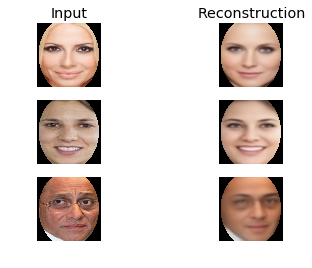

In [304]:
# import torch.nn.Module.

model = torch.load('train_VAE_model_epoch_9')
plt.rcParams.update({'font.size': 12})

img , target = val_data[10002]
# img , target = data[-1]
rec, mu1, logvar1 = model.forward(img.cuda())
z1 = model.get_latent_var(img.cuda())


pm = mu1.detach().cpu().squeeze().numpy()
pv = logvar1.mul(0.5).exp_().detach().cpu().squeeze().numpy()
# pv = np.diag(pv)


plt.subplot(3,2,1)
plt.imshow(img.numpy().transpose(1,2,0))
plt.axis('off')
plt.title('Input')
# plt.show()


plt.subplot(3,2,2)
plt.imshow(rec.squeeze().detach().cpu().numpy().transpose(1,2,0))
plt.axis('off')
plt.title('Reconstruction')
# plt.show()

img , target = val_data[700]
# img , target = data[-2]
rec, mu2, logvar2 = model.forward(img.cuda())
z2 = model.get_latent_var(img.cuda())



qm2 = mu2.detach().cpu().squeeze().numpy()
qv2 = logvar2.mul(0.5).exp_().detach().cpu().squeeze().numpy()
# qv2 = np.diag(qv2)


plt.subplot(3,2,3)
plt.imshow(img.numpy().transpose(1,2,0))
plt.axis('off')
# plt.show()


plt.subplot(3,2,4)
plt.imshow(rec.squeeze().detach().cpu().numpy().transpose(1,2,0))
plt.axis('off')
# plt.show()



img, target = val_data[300]
# img , target = data[305]
rec, mu3, logvar3 = model.forward(img.cuda())
z3 = model.get_latent_var(img.cuda())


qm3 = mu3.detach().cpu().squeeze().numpy()
qv3 = logvar3.mul(0.5).exp_().detach().cpu().squeeze().numpy()
# qv3 = np.diag(qv3)



plt.subplot(3,2,5)
plt.imshow(img.numpy().transpose(1,2,0))
plt.axis('off')
# plt.show()


plt.subplot(3,2,6)
plt.imshow(rec.squeeze().detach().cpu().numpy().transpose(1,2,0))
plt.axis('off')
plt.savefig('vae.png', dpi = 300, bbox_inches = 'tight')
# plt.show()


print((mu1-mu2).norm(), (mu1-mu3).norm(), (logvar1-logvar2).norm(), (logvar1-logvar3).norm())
print('z: ', (z1-z2).norm(), (z1-z3).norm())

print(gau_kl(pm,pv,qm2,qv2))

print(gau_kl(pm,pv,qm3,qv3))#.astype(np.float64)))

# print(mu.size())

In [6]:
# print(pm.shape, pv.shape, qm2.shape,qv2.shape, qv2)

print(gau_kl(pm,pv,qm2,qv2))

print(gau_kl(pm,pv,qm3,qv3))#.astype(np.float64)))

 

# print(qm3)



170.71587110583926
243.58104618549686


In [193]:
from data_utils import get_indices_from_name, get_top_subjects

vae_model = torch.load('train_VAE_model_epoch_6')

num_subjects = 100



# indices = [i for i in val_data.indices.cpu().numpy()]
indices = val_data.indices
indices_subjects = [data.image_paths[i].split('/')[2] for i in indices]

top_vals = []

for iter_ in range(num_subjects):
    testing_subjects = np.unique(indices_subjects)[:num_subjects]
    np.random.shuffle(testing_subjects)
    prior = testing_subjects[0]
    print(prior)
    testing_subjects = testing_subjects[1:]

    prior_indices = get_indices_from_name(prior,indices,indices_subjects, 15)
    test_indices = []
    for sub in testing_subjects:
        temp = get_indices_from_name(sub,indices,indices_subjects)
        test_indices.append(temp)    

    test_indices = np.concatenate(np.array(test_indices),axis = 0)
    test_indices = np.concatenate((prior_indices[10:], test_indices), axis= 0)
    prior_indices = prior_indices[:10]

#     print([data.image_paths[i] for i in prior_indices], prior_indices)


    prior_data = torch.utils.data.Subset(data, prior_indices)
    test_data = torch.utils.data.Subset(data, test_indices)

    img = []
    for i, _ in prior_data:
        img.append(i)

    prior_img = torch.stack(img,0)

    _, mu, logvar = vae_model.forward(prior_img.cuda())
    pm = mu.detach().cpu().squeeze().numpy()
    pv = logvar.mul(0.5).exp_().detach().cpu().squeeze().numpy()

    test_loader = torch.utils.data.DataLoader(test_data,
                                               batch_size=4,
                                               shuffle=False,
                                               num_workers=2)

    qm = []; qv = []
    for i, (img, _) in enumerate(test_data):
        _, mu, logvar = vae_model.forward(img.cuda())
        qm.append(mu.detach().cpu().squeeze().numpy())
        qv.append(logvar.mul(0.5).exp_().detach().cpu().squeeze().numpy())


    dist = []
    print(len(qm), len(qv))
    for i, (m, v) in enumerate(zip(qm, qv)):
        dist.append(np.mean(gau_kl(m,v,pm,pv)))

    top_vals.append(get_top_subjects(dist, testing_subjects))
        
    print(top_vals)

n000312
500 500
[66]
n000268
500 500
[66, 98]
n000267
500 500
[66, 98, 1]
n000083
500 500
[66, 98, 1, 1]
n000729
500 500
[66, 98, 1, 1, 1]
n000682
500 500
[66, 98, 1, 1, 1, 32]
n000758
500 500
[66, 98, 1, 1, 1, 32, 1]
n000377
500 500
[66, 98, 1, 1, 1, 32, 1, 20]
n000152
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1]
n000542
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1]
n000721
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1]
n000678
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5]
n000158
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68]
n000782
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1]
n000753
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1, 10]
n000095
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1, 10, 13]
n000052
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1, 10, 13, 3]
n000383
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1, 10, 13, 3, 2]
n000773
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1, 10, 13, 3, 2, 1]
n000532
500 500
[66, 98, 1, 

500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1, 10, 13, 3, 2, 1, 42, 2, 18, 1, 4, 2, 3, 21, 5, 29, 1, 58, 1, 2, 2, 61, 5, 17, 2, 96, 1, 5, 1, 4, 7, 3, 7, 16, 16, 1, 17, 31, 36, 19, 43, 1, 1, 2, 15, 1, 1, 7, 4, 15, 2, 2, 14]
n000028
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1, 10, 13, 3, 2, 1, 42, 2, 18, 1, 4, 2, 3, 21, 5, 29, 1, 58, 1, 2, 2, 61, 5, 17, 2, 96, 1, 5, 1, 4, 7, 3, 7, 16, 16, 1, 17, 31, 36, 19, 43, 1, 1, 2, 15, 1, 1, 7, 4, 15, 2, 2, 14, 17]
n000773
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1, 10, 13, 3, 2, 1, 42, 2, 18, 1, 4, 2, 3, 21, 5, 29, 1, 58, 1, 2, 2, 61, 5, 17, 2, 96, 1, 5, 1, 4, 7, 3, 7, 16, 16, 1, 17, 31, 36, 19, 43, 1, 1, 2, 15, 1, 1, 7, 4, 15, 2, 2, 14, 17, 19]
n000762
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1, 10, 13, 3, 2, 1, 42, 2, 18, 1, 4, 2, 3, 21, 5, 29, 1, 58, 1, 2, 2, 61, 5, 17, 2, 96, 1, 5, 1, 4, 7, 3, 7, 16, 16, 1, 17, 31, 36, 19, 43, 1, 1, 2, 15, 1, 1, 7, 4, 15, 2, 2, 14, 17, 19, 86]
n000442
500 500
[66, 98,

500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1, 10, 13, 3, 2, 1, 42, 2, 18, 1, 4, 2, 3, 21, 5, 29, 1, 58, 1, 2, 2, 61, 5, 17, 2, 96, 1, 5, 1, 4, 7, 3, 7, 16, 16, 1, 17, 31, 36, 19, 43, 1, 1, 2, 15, 1, 1, 7, 4, 15, 2, 2, 14, 17, 19, 86, 18, 6, 5, 2, 36, 26, 1, 1, 26, 1, 28, 2, 1, 1, 1, 1, 5, 4, 2, 3, 4, 80, 1, 7, 8, 2]
n000472
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1, 10, 13, 3, 2, 1, 42, 2, 18, 1, 4, 2, 3, 21, 5, 29, 1, 58, 1, 2, 2, 61, 5, 17, 2, 96, 1, 5, 1, 4, 7, 3, 7, 16, 16, 1, 17, 31, 36, 19, 43, 1, 1, 2, 15, 1, 1, 7, 4, 15, 2, 2, 14, 17, 19, 86, 18, 6, 5, 2, 36, 26, 1, 1, 26, 1, 28, 2, 1, 1, 1, 1, 5, 4, 2, 3, 4, 80, 1, 7, 8, 2, 2]
n000058
500 500
[66, 98, 1, 1, 1, 32, 1, 20, 1, 1, 1, 5, 68, 1, 10, 13, 3, 2, 1, 42, 2, 18, 1, 4, 2, 3, 21, 5, 29, 1, 58, 1, 2, 2, 61, 5, 17, 2, 96, 1, 5, 1, 4, 7, 3, 7, 16, 16, 1, 17, 31, 36, 19, 43, 1, 1, 2, 15, 1, 1, 7, 4, 15, 2, 2, 14, 17, 19, 86, 18, 6, 5, 2, 36, 26, 1, 1, 26, 1, 28, 2, 1, 1, 1, 1, 5, 4, 2, 3, 4, 80, 1, 7, 8, 

In [208]:
from data_utils import get_indices_from_name, get_top_subjects

vae_model = torch.load('train_VAE_model_epoch_6')

num_subjects = 20



# indices = [i for i in val_data.indices.cpu().numpy()]
indices = val_data.indices
indices_subjects = [data.image_paths[i].split('/')[2] for i in indices]

top_vals_2 = []
top_subjects = []
top_imgs = []

for iter_ in range(num_subjects*10):
    testing_subjects = np.unique(indices_subjects)[:num_subjects]
    np.random.shuffle(testing_subjects)
    prior = testing_subjects[0]
    print(prior)
    top_subjects.append(prior)
    testing_subjects = testing_subjects[1:]

    prior_indices = get_indices_from_name(prior,indices,indices_subjects, 15)
    test_indices = []
    for sub in testing_subjects:
        temp = get_indices_from_name(sub,indices,indices_subjects)
        test_indices.append(temp)    

    test_indices = np.concatenate(np.array(test_indices),axis = 0)
    test_indices = np.concatenate((prior_indices[10:], test_indices), axis= 0)
    prior_indices = prior_indices[:10]

#     print([data.image_paths[i] for i in prior_indices], prior_indices)


    prior_data = torch.utils.data.Subset(data, prior_indices)
    test_data = torch.utils.data.Subset(data, test_indices)

    img = []
    for i, _ in prior_data:
        img.append(i)

    prior_img = torch.stack(img,0)

    _, mu, logvar = vae_model.forward(prior_img.cuda())
    pm = mu.detach().cpu().squeeze().numpy()
    pv = logvar.mul(0.5).exp_().detach().cpu().squeeze().numpy()

    test_loader = torch.utils.data.DataLoader(test_data,
                                               batch_size=4,
                                               shuffle=False,
                                               num_workers=2)

    qm = []; qv = []
    for i, (img, _) in enumerate(test_data):
        _, mu, logvar = vae_model.forward(img.cuda())
        qm.append(mu.detach().cpu().squeeze().numpy())
        qv.append(logvar.mul(0.5).exp_().detach().cpu().squeeze().numpy())


    dist = []
    print(len(qm), len(qv))
    for i, (m, v) in enumerate(zip(qm, qv)):
        dist.append(np.mean(gau_kl(m,v,pm,pv)))
    top_val, top_img = get_top_subjects(dist, testing_subjects)
    top_vals_2.append(top_val)
    top_imgs.append(top_img)
        
    print(top_vals_2)

n000061
100 100
[5]
n000122
100 100
[5, 5]
n000158
100 100
[5, 5, 3]
n000077
100 100
[5, 5, 3, 1]
n000077
100 100
[5, 5, 3, 1, 1]
n000152
100 100
[5, 5, 3, 1, 1, 1]
n000037
100 100
[5, 5, 3, 1, 1, 1, 1]
n000028
100 100
[5, 5, 3, 1, 1, 1, 1, 1]
n000077
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1]
n000083
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7]
n000003
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3]
n000058
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8]
n000095
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2]
n000003
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7]
n000018
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2]
n000028
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1]
n000077
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1]
n000158
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1]
n000095
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2]
n000018
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6]
n000090
100 100
[5, 5, 3, 1, 1

100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17]
n000052
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1]
n000049
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13]
n000054
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15]
n000083
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6,

100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20]
n000077
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20, 2]
n000060
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20, 2, 1]
n000061
100 100
[5, 5, 3

100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20, 2, 1, 1, 1, 1, 11, 1, 1, 1, 2, 2, 1, 3, 1, 6, 1, 6, 2, 15, 1, 1, 5, 1]
n000158
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20, 2, 1, 1, 1, 1, 11, 1, 1, 1, 2, 2, 1, 3, 1, 6, 1, 6, 2, 15, 1, 1, 5, 1, 12]
n000095
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1

100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20, 2, 1, 1, 1, 1, 11, 1, 1, 1, 2, 2, 1, 3, 1, 6, 1, 6, 2, 15, 1, 1, 5, 1, 12, 3, 2, 7, 4, 17, 1, 1, 5, 4, 17, 3, 1, 7, 9, 2, 1, 2, 2, 1]
n000060
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20, 2, 1, 1, 1, 1, 11, 1, 1, 1, 2, 2, 1, 3, 1, 6, 1, 6, 2, 15, 1, 1, 5, 1, 12, 3, 2, 7, 4, 17, 1, 1, 5, 4, 17, 3, 1, 7, 9, 2, 1, 2, 2, 1, 1]
n000172
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1

100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20, 2, 1, 1, 1, 1, 11, 1, 1, 1, 2, 2, 1, 3, 1, 6, 1, 6, 2, 15, 1, 1, 5, 1, 12, 3, 2, 7, 4, 17, 1, 1, 5, 4, 17, 3, 1, 7, 9, 2, 1, 2, 2, 1, 1, 1, 1, 1, 5, 9, 5, 1, 5, 3, 1, 1, 6, 5, 1, 3, 3]
n000018
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20, 2, 1, 1, 1, 1, 11, 1, 1, 1, 2, 2, 1, 3, 1, 6, 1, 6, 2, 15, 1, 1, 5, 1, 12, 3, 2, 7, 4, 17, 1, 1, 5, 4, 17, 3, 1, 7, 9, 2, 1, 2, 2, 1, 1, 1, 1, 1, 5, 9, 5, 1, 5, 3, 1, 1, 6, 

100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20, 2, 1, 1, 1, 1, 11, 1, 1, 1, 2, 2, 1, 3, 1, 6, 1, 6, 2, 15, 1, 1, 5, 1, 12, 3, 2, 7, 4, 17, 1, 1, 5, 4, 17, 3, 1, 7, 9, 2, 1, 2, 2, 1, 1, 1, 1, 1, 5, 9, 5, 1, 5, 3, 1, 1, 6, 5, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 4, 10, 4, 1, 1, 2, 8, 19, 2]
n000054
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20, 2, 1, 1, 1, 1, 11, 1, 1, 1, 2, 2, 1, 3, 1, 6, 1, 6, 2, 15, 1, 1, 5, 1, 12, 3, 2, 7, 4, 17, 1, 1, 5, 4, 17, 3, 1, 7, 9, 2, 1

100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20, 2, 1, 1, 1, 1, 11, 1, 1, 1, 2, 2, 1, 3, 1, 6, 1, 6, 2, 15, 1, 1, 5, 1, 12, 3, 2, 7, 4, 17, 1, 1, 5, 4, 17, 3, 1, 7, 9, 2, 1, 2, 2, 1, 1, 1, 1, 1, 5, 9, 5, 1, 5, 3, 1, 1, 6, 5, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 4, 10, 4, 1, 1, 2, 8, 19, 2, 1, 3, 5, 7, 6, 1, 2, 1, 1, 4, 5, 1, 1, 1, 1]
n000054
100 100
[5, 5, 3, 1, 1, 1, 1, 1, 1, 7, 3, 8, 2, 7, 2, 1, 1, 1, 2, 6, 6, 3, 5, 1, 1, 3, 1, 1, 7, 1, 2, 1, 5, 5, 12, 9, 2, 1, 1, 3, 4, 1, 3, 2, 6, 2, 2, 7, 10, 1, 1, 6, 1, 8, 1, 5, 1, 1, 1, 8, 1, 2, 1, 1, 1, 3, 1, 1, 17, 1, 13, 15, 3, 4, 1, 1, 1, 1, 1, 6, 2, 1, 1, 6, 4, 8, 1, 2, 6, 1, 13, 4, 1, 1, 1, 6, 1, 10, 1, 20, 2, 1, 1, 1, 1, 11, 1, 1, 1, 2, 2, 1, 3, 1, 6, 1, 6, 2, 15, 1, 1, 5, 1, 12, 3, 

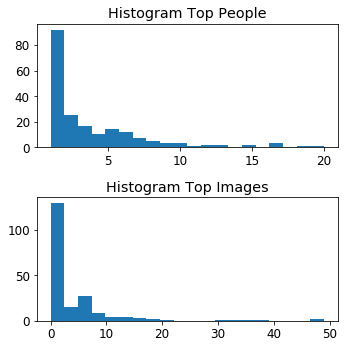

In [314]:
fig, ax = plt.subplots(2,1, figsize = (5,5))
ax[0].hist(top_vals_2, 20)
ax[0].set_title('Histogram Top People')

ax[1].hist(top_imgs, 20)
ax[1].set_title('Histogram Top Images')
plt.tight_layout()
fig.savefig('hist1.png', dpi = 300, bbox_inches = 'tight')

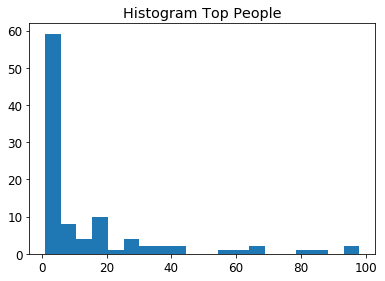

In [315]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.hist(top_vals, 20)
ax.set_title('Histogram Top People')
fig.savefig('hist2.png', dpi = 300, bbox_inches = 'tight')

In [206]:
top_imgs

0

In [187]:
idx = np.argsort(dist)

print(idx)



[ 0 34 72 60 18 15 16 96 99 89 46 51 23 33 24 14 57  4 19 27 25 78 29  3
 61 87 62 45 80 63 20 92 71 30 32 84 98 40 31 48 76  8 38 44 41 86 17 21
 35 43  9 81 83 66 28 39 26 70  1 22  2 42 79 36 74 64 88 13  6 75 55 52
 95 82 91 49 65  5 53 59 93 77 94 97 69 50 68 85 90 58 56  7 54 37 47 12
 73 11 10 67]
1


0


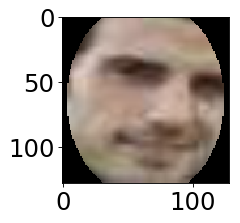

1


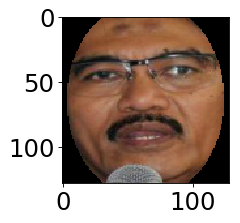

2


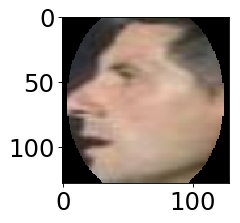

3


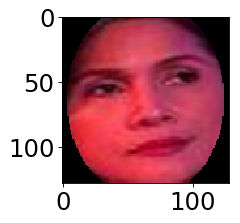

4


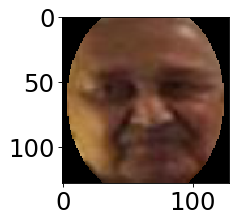

In [218]:
img , target = val_data[10002]

x_size = len(test_indices[0:5])
for i in range(x_size):
    print(i)
    img , _ = data[test_indices[idx[i]]]

    plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(x_size,1,i+1)
    plt.imshow(img.numpy().transpose(1,2,0))
    plt.show()




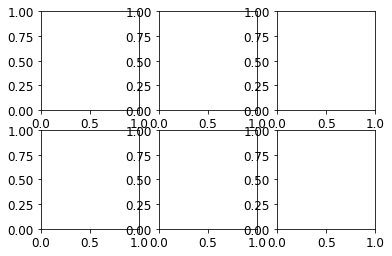

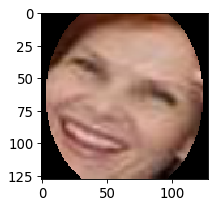

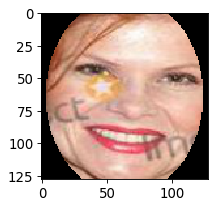

In [317]:
v
fig, ax = plt.subplots(2, 3)
x_size = 5
for i in range(x_size):        
    img , _ = data[prior_indices[i]]
    plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(x_size,1,i+1)
    plt.imshow(img.numpy().transpose(1,2,0))
    plt.axis

In [220]:
print(get_indices_from_name(prior,indices,indices_subjects, 10))
data
train_data

[387585 387571 387601 387595 387573 387579 387598 387605 387573 387573]


In [221]:
b  = torch.utils.data.Subset(data, range(10) )

In [21]:
val_data.indices

array([382779, 382780, 382781, ..., 430623, 430624, 430625])

[0.         1.         2.         3.         4.         4.10526316
 4.21052632 4.31578947 4.42105263 4.52631579 4.63157895 4.73684211
 4.84210526 4.94736842 5.05263158 5.15789474 5.26315789 5.36842105
 5.47368421 5.57894737 5.68421053 5.78947368 5.89473684 6.
 6.10526316] (25,)
[2650.9934082  2665.31484314 2652.33532034 2619.15873036 2572.88896374
 2520.62991105 2469.48546284 2426.55950966 2398.95594206 2393.7786506
 2417.57789293 2464.17036992 2514.63922565 2549.51397131 2549.32411807
 2498.48717043 2415.26057449 2335.32574633 2294.50810177 2328.63305664
 2366.05859375 2354.43530273 2317.57788086 2354.16381836 2292.30737305
 2282.19970703 2325.98828125 2489.61645508 2737.01464844 2589.00463867]


Text(0.5,1,'Validation Loss')

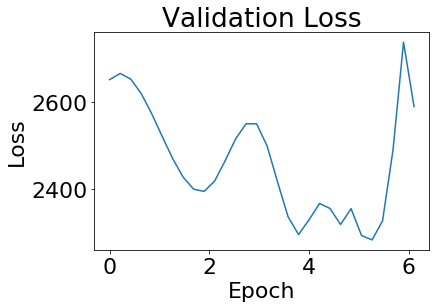

In [265]:
from scipy.interpolate import interp1d

import pickle

with open('save_VAE_acc_loss-Copy1.pkl', 'rb')as handle:
    solver_dict = pickle.load(handle)

# print(solver_dict['val_loss_history'], len(solver_dict['val_loss_history']))
time = np.arange(5)
t_, st = np.linspace(4,6, 20, retstep=True)
t_ += st
time = np.append(time,t_)

temp = solver_dict['val_loss_history'].copy()

print(time, np.array(temp).shape)

f1 = interp1d(time,temp, kind='cubic')



t_new = np.linspace(0,6+st,30)
# temp = np.interp(np.linspace(0,6,60), time, temp)

print(f1(t_new))

# plt.plot(time, solver_dict['val_loss_history'])
plt.plot(t_new, f1(t_new))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')


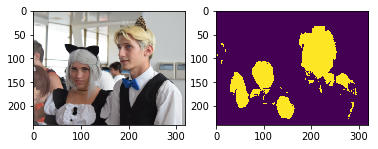

In [24]:
from PIL import Image
import cv2
from functions import opening_transform, pass_img, get_blobs, get_faces


model = torch.load('train_model_epoch_0')
img = Image.open('test_imgs/test2.png').convert('RGB')
to_tensor = transforms.ToTensor()
norm = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.5, 0.5, 0.5])
res = transforms.Resize([240, 320])
img = res(img)        
img = to_tensor(img)
#img = norm(img)
plt.subplot(1,2,1)
plt.imshow(img.numpy().transpose(1,2,0))

img = Variable(img.unsqueeze(0))
img.cuda()
out = model.forward(img.type(torch.cuda.FloatTensor))
_, preds = torch.max(out, 1)
plt.subplot(1,2,2)
plt.imshow(preds.cpu().numpy().squeeze(0))

In [250]:
# model = torch.load('train_segnet_model_subepoch_0')
model = torch.load('train_model_epoch_2')

(175.87254333496094, 101.39958953857422) 63.27683639526367


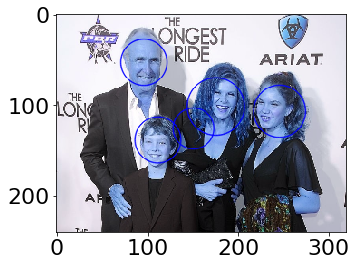

In [251]:
img = 'lollita.jpg'
pred, _ = pass_img(model, img)

imgplt = Image.open(img)
imggray = Image.open(img).convert('L')
res = transforms.Resize([240, 320])
imggray = res(imggray)

filtered_pred_pil = opening_transform(pred, 15)

keypoints, im_with_keypoints = get_blobs(img)

# keypoints[3].pt = (185,90)
# keypoints[3].size = 50
print(keypoints[3].pt, keypoints[3].size)
plt.imshow(im_with_keypoints)
faces = get_faces(img, keypoints)
# faces = get_faces(img, keypoints, filtered_pred_pil)

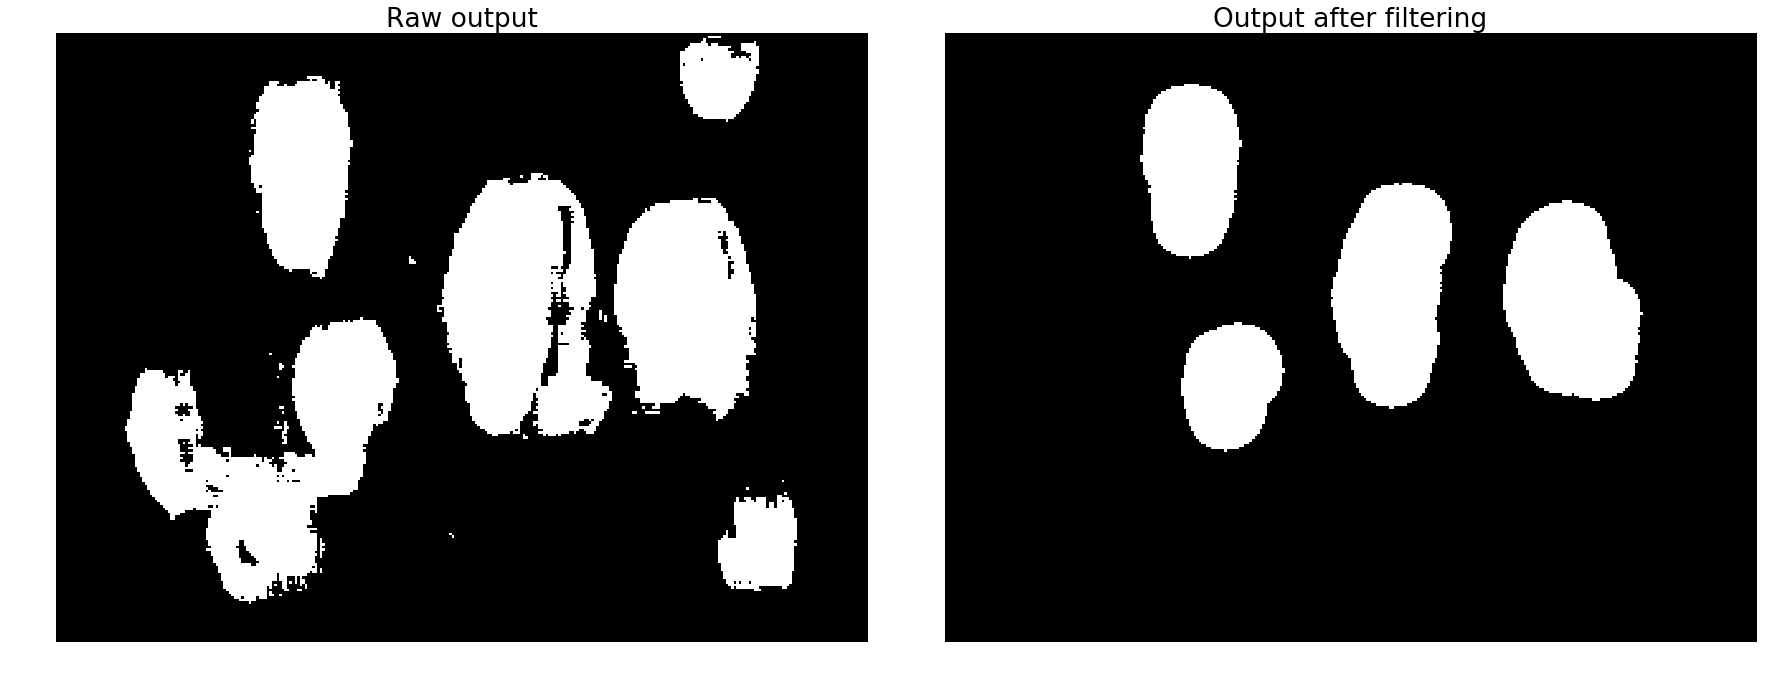

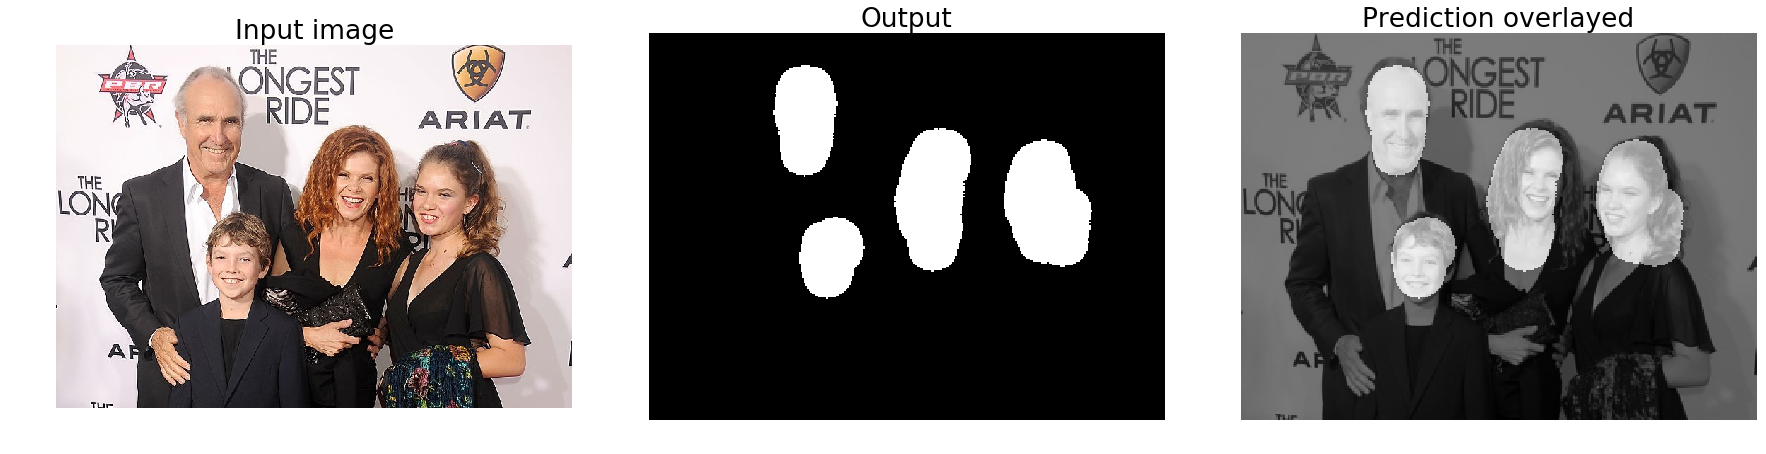

In [252]:
fig, ax = plt.subplots(1, 2, figsize=(25, 25))
plt.rcParams.update({'font.size': 22})
ax[0].imshow(pred.cpu().numpy().squeeze(0), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Raw output')
ax[1].imshow(filtered_pred_pil)
ax[1].axis('off')
ax[1].set_title('Output after filtering')
plt.tight_layout()

fig, ax = plt.subplots(1,3, figsize=(25, 25))
ax[0].imshow(imgplt)
ax[0].axis('off')
ax[0].set_title('Input image')
ax[1].imshow(filtered_pred_pil)
ax[1].axis('off')
ax[1].set_title('Output')
ax[2].imshow(Image.blend(imggray, filtered_pred_pil, 0.5))
ax[2].axis('off')
ax[2].set_title('Prediction overlayed')
plt.tight_layout()

In [253]:
# img = Image.open('test2.png').convert('RGB')

vae_model = torch.load('train_VAE_model_epoch_6') 

indices = train_data.indices
indices_subjects = [data.image_paths[i].split('/')[2] for i in indices]

prior = 'n005233'

prior_indices = get_indices_from_name(prior,indices,indices_subjects, 5)
print(prior_indices)

res = transforms.Resize([128, 128])

prior_data = torch.utils.data.Subset(data, prior_indices)
img = []
for i, _ in prior_data:
    img.append(i)

prior_img = torch.stack(img,0)

_, mu, logvar = vae_model.forward(prior_img.cuda())
pm = mu.detach().cpu().squeeze().numpy()
pv = logvar.mul(0.5).exp_().detach().cpu().squeeze().numpy()




distances = []
for i, face in enumerate(faces):
    print(i, face.size)
#     plt.subplot(5,2,i+1)
#     plt.imshow(face)
    img = face.copy()
    to_tensor = transforms.ToTensor()
    
    img = res(img)        
    img = to_tensor(img)
    img = Variable(img.unsqueeze(0))
    img.cuda()
    _, mu, logvar = vae_model.forward(img.cuda())
    
    fm = mu.detach().cpu().squeeze().numpy()
    fv = logvar.mul(0.5).exp_().detach().cpu().squeeze().numpy()
    distances.append(np.mean(gau_kl(fm,fv,pm,pv)))
    
    


[6289 6178 6264 6305 6353]
0 (45, 55)
1 (57, 69)
2 (51, 61)
3 (64, 76)
4 (50, 60)


In [254]:

corr_id = [3,1,2,0,4]
corr_distances = distances.copy()
for i, j in enumerate(np.argsort(distances)):
    corr_distances[corr_id[i]]  = distances[j]
    
print(distances, np.argsort(distances))
print(corr_distances, np.argsort(corr_distances))
distances = corr_distances

[548.8133766855469, 384.19279186596935, 307.7205757934827, 429.9308221147754, 377.0306557347615] [2 4 1 3 0]
[429.9308221147754, 377.0306557347615, 384.19279186596935, 307.7205757934827, 548.8133766855469] [3 1 2 0 4]


In [316]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.imshow(faces[3])
ax.axis('off')

(-0.5, 63.5, 75.5, -0.5)

0
1
2
3
4
5


IndexError: index 5 is out of bounds for axis 0 with size 5

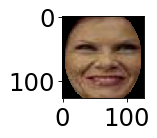

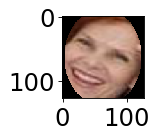

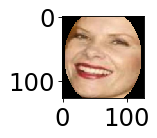

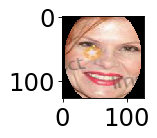

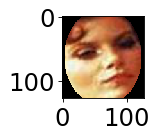

In [256]:
# img , target = val_data[10002]



x_size = 10
for i in range(x_size):
    print(i)
    img , _ = data[prior_indices[i]]

    plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(10,1,i+1)
    plt.imshow(img.numpy().transpose(1,2,0))
plt.show()

In [257]:
# corr_distances = distances



corr_distances = 1/np.array(distances)

corr_distances = corr_distances/ np.max(corr_distances)
corr_distances = (corr_distances)**2
print(corr_distances, (corr_distances)**4)

[0.51229004 0.66613115 0.64152657 1.         0.31438636] [0.06887532 0.19689695 0.16937862 1.         0.00976911]


In [258]:
from data_utils import gkern

out = np.zeros_like(filtered_pred_pil)
out = out.astype(np.uint32)
print(out.shape)

# out = Image.fromarray(out)



for i, face in enumerate(faces):
    mask = gkern(face.size[1], face.size[0], 3.0, 4.5)
    
    print(np.min(mask), np.max(mask), corr_distances[i])
    
    mask = 255*corr_distances[i]*mask/np.max(mask)
    
    
    print(np.min(mask), np.max(mask))
    
    mask_img = Image.fromarray(np.uint32(mask))

    #         print("Image size:" , mask.shape)

    
    
    pos_x = int(keypoints[i].pt[0] - mask.shape[1]/2)
    pos_y = int(keypoints[i].pt[1] - mask.shape[0]/2)

    print(pos_x +mask.shape[0], pos_y+mask.shape[1], mask.shape)
#     out[pos_y:pos_y+mask.shape[1], pos_x:pos_x +mask.shape[0]] += mask.astype(np.uint8)
    out[pos_y:pos_y+mask.shape[0], pos_x:pos_x +mask.shape[1]] += mask.astype(np.uint32)
#     if i >2:
#         break


out = np.uint8(255*out/np.amax(out))


(240, 320)
1.2344300960180948e-06 0.0018715370866499391 0.5122900377322829
0.08616366326340466 130.63395962173215
183 142 (55, 45)
7.691211734455848e-07 0.0011687346829615801 0.6661311548149987
0.11178377235390745 169.8634444778247
286 129 (69, 57)
9.76496992512149e-07 0.0014829618220849085 0.6415265695107604
0.10771985690104066 163.58927522524388
132 73 (61, 51)
6.198286813700264e-07 0.0009405707417473859 1.0
0.16804298362047793 255.0
219 127 (76, 64)
1.0134507277006345e-06 0.0015345318849707113 0.31438636063117464
0.05294568833384607 80.16852196094953
147 158 (60, 50)


255


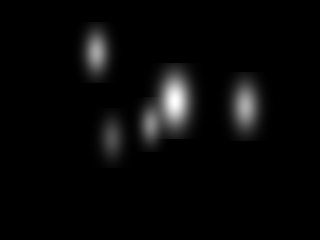

In [259]:
print(np.max(out))
Image.fromarray(out)

Text(0.5,1,'Saliency map')

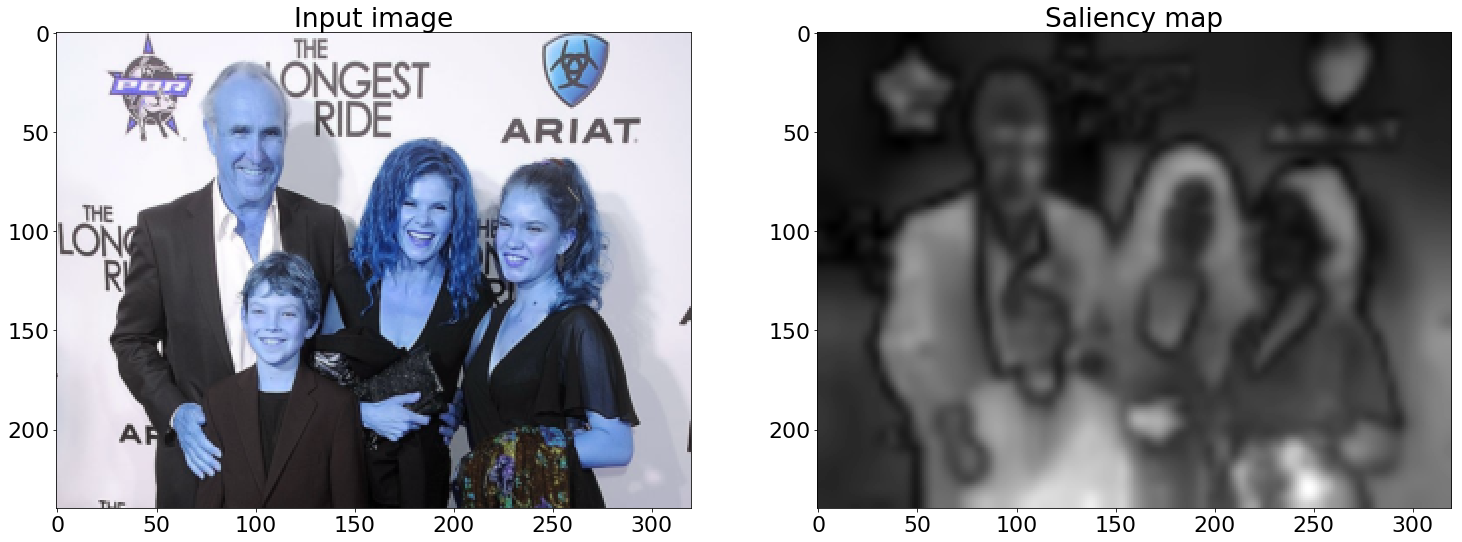

In [276]:
from pySaliencyMap import *

img = Image.open('lollita.jpg')
res = transforms.Resize([240, 320])
img = np.array(res(img))
imgsize = img.shape
img_width  = imgsize[1]
img_height = imgsize[0]
sm = pySaliencyMap(img_width, img_height)
# computation
saliency_map = sm.SMGetSM(img)
fig, ax = plt.subplots(1, 2, figsize = (25, 25))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Input image')
ax[1].imshow(saliency_map, 'gray')
ax[1].set_title('Saliency map')

In [285]:
saliency_map.shape, out.shape
np.max(saliency_map)

0.9863061

In [290]:
fin_out = (255*0.4*saliency_map + 0.6*out)

TypeError: src is not a numpy array, neither a scalar

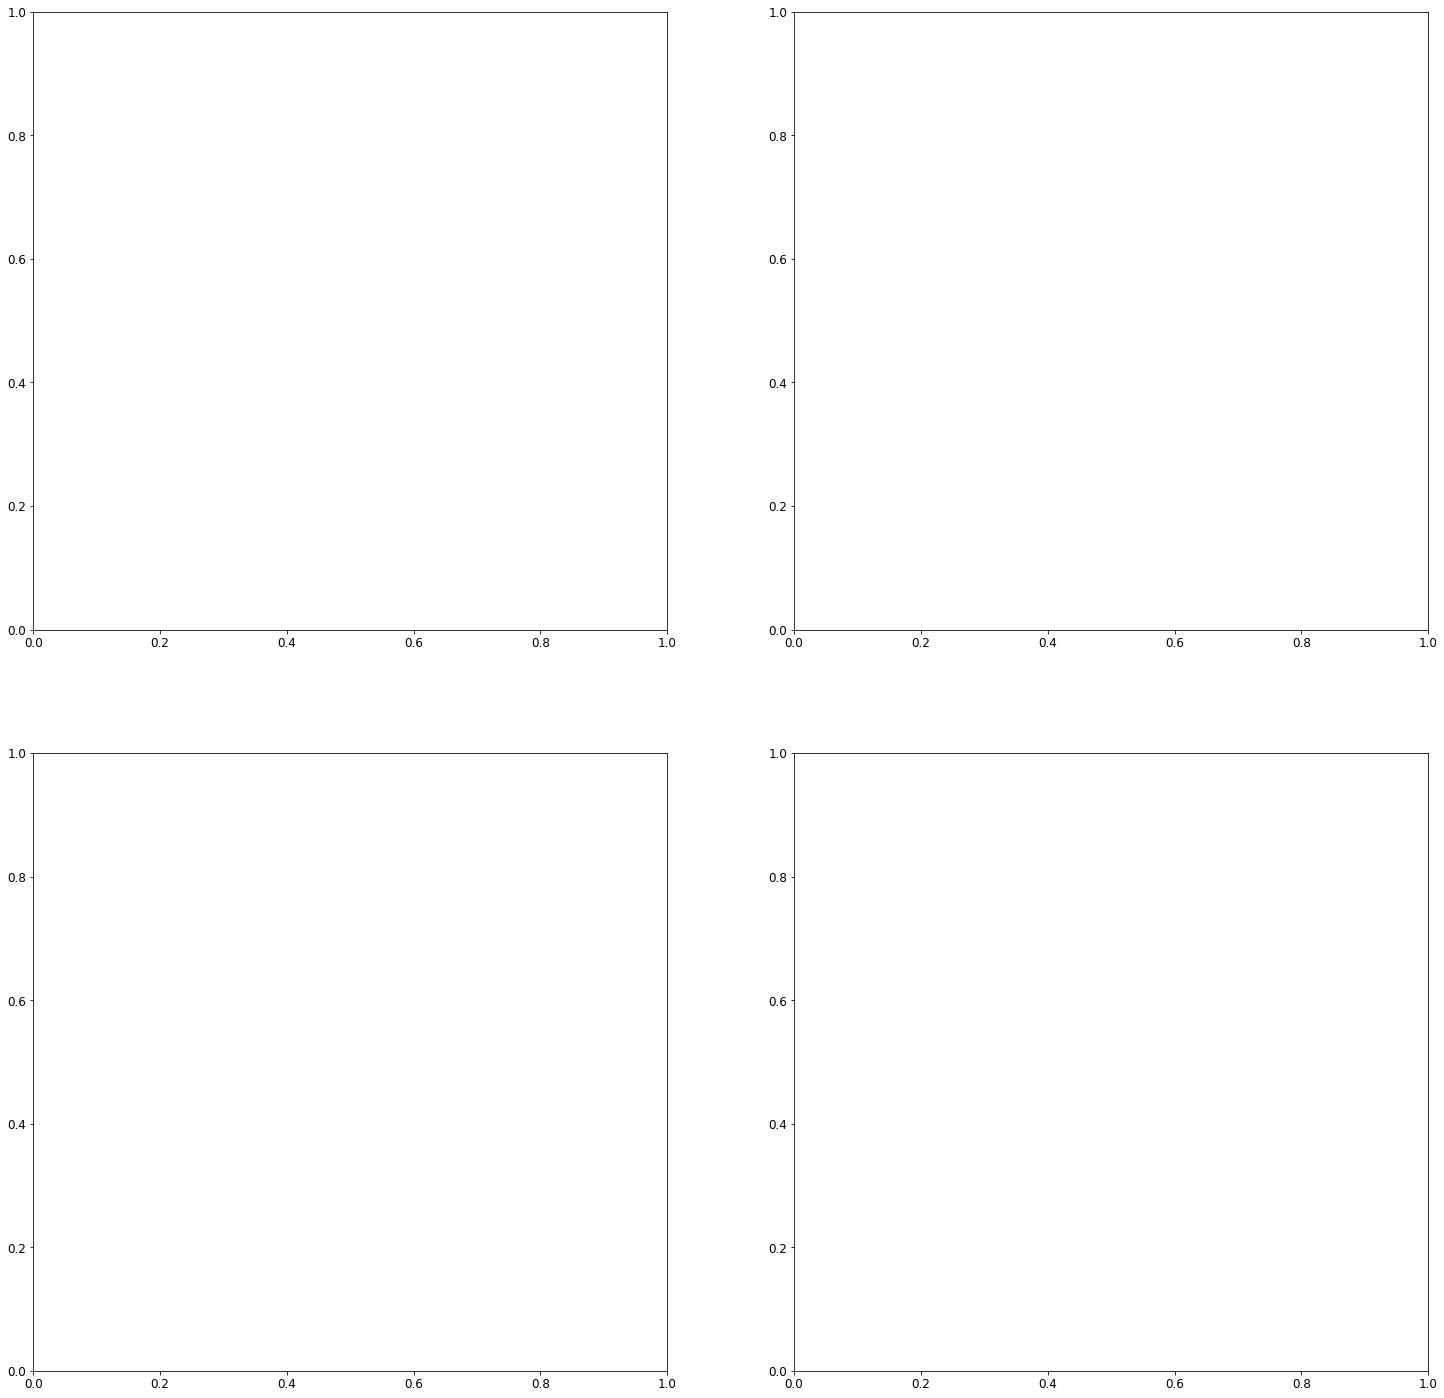

In [312]:
fig, ax = plt.subplots(2, 2, figsize = (25, 25))
ax[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0,0].set_title('Input image')
ax[0,1].imshow(saliency_map, 'gray')
ax[0,1].set_title('IttiKoch Saliency map')
ax[1,0].imshow(out, 'gray')
ax[1,0].set_title('Face Saliency map')
ax[1,1].imshow(fin_out, 'gray')
ax[1,1].set_title('Combined Saliency map')
